In [2]:
import os
import re

# Türkçe karakterleri İngilizce karakterlere çevirme
def replace_tr_chars(name):
    tr_chars = "çğıöşüÇĞİÖŞÜ"
    en_chars = "cgiosuCGIOSU"
    tr_to_en = str.maketrans(tr_chars, en_chars)
    return name.translate(tr_to_en)

# Boşlukları ve diğer özel karakterleri kaldırma
def clean_name(name):
    name = replace_tr_chars(name)
    name = re.sub(r'\s+', '_', name)  # Boşlukları alt çizgi ile değiştir
    name = re.sub(r'[^a-zA-Z0-9_]', '', name)  # Harf ve rakam dışındaki karakterleri kaldır
    return name

# Yeni dosya adının var olup olmadığını kontrol etme ve gerektiğinde numara ekleme
def get_unique_filename(directory, name):
    base_name, ext = os.path.splitext(name)
    new_name = name
    counter = 1
    while os.path.exists(os.path.join(directory, new_name)):
        new_name = f"{base_name}_{counter}{ext}"
        counter += 1
    return new_name

# Klasörleri ve dosyaları yeniden adlandırma
def rename_items(base_dir):
    for root, dirs, files in os.walk(base_dir, topdown=False):
        for name in files:
            new_name = clean_name(name)
            unique_name = get_unique_filename(root, new_name)
            os.rename(os.path.join(root, name), os.path.join(root, unique_name))
        for name in dirs:
            new_name = clean_name(name)
            unique_name = get_unique_filename(root, new_name)
            os.rename(os.path.join(root, name), os.path.join(root, unique_name))

# Ana klasör yolları
folders = [
    "D:\\08.07.2024 kol veriler\\hepsi\\sag",
    "D:\\08.07.2024 kol veriler\\hepsi\\sol",
    "D:\\08.07.2024 kol veriler\\hepsi\\yurume"
]

# Her bir klasör için yeniden adlandırma işlemini gerçekleştir
for folder in folders:
    rename_items(folder)


In [9]:
#veirlerin 20 lik kısmını test olarak ayır. Veriler eşit sayıda değil hala 

import os
import shutil
import random

# Kaynak ve hedef klasör yolları
source_dir = "C:\\Users\\Hp\\Desktop\\08.07.2024 kol veriler\\hepsi_grafik"
test_dir = "C:\\Users\\Hp\\Desktop\\08.07.2024 kol veriler\\hepsi_grafik_test"

# Hedef test klasörünü oluştur
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Her sınıf için %20'lik test verisini ayır
for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)
    if os.path.isdir(class_path):
        # Sınıf içindeki tüm dosyaları listele
        all_files = os.listdir(class_path)
        random.shuffle(all_files)
        
        # %20'sini test verisi olarak seç
        num_test_files = max(1, int(len(all_files) * 0.2))
        test_files = all_files[:num_test_files]
        
        # Test klasörünü oluştur
        class_test_dir = os.path.join(test_dir, class_name)
        if not os.path.exists(class_test_dir):
            os.makedirs(class_test_dir)
        
        # Seçilen dosyaları test klasörüne kopyala
        for file_name in test_files:
            shutil.move(os.path.join(class_path, file_name), os.path.join(class_test_dir, file_name))


Unique predicted classes: [0 2 3 4 7]
Unique true classes: [0 2 3 4 7]
                precision    recall  f1-score   support

       iki kol       1.00      1.00      1.00     13278
kutu koyma sag       0.00      0.00      0.00         0
kutu koyma sol       0.97      1.00      0.99       111
           sag       1.00      1.00      1.00      5225
           sol       1.00      1.00      1.00     12288
   su icme sag       0.00      0.00      0.00         0
   su icme sol       0.00      0.00      0.00         0
        yurume       1.00      1.00      1.00      9281

     micro avg       1.00      1.00      1.00     40183
     macro avg       0.62      0.62      0.62     40183
  weighted avg       1.00      1.00      1.00     40183



C:\Users\Hp\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\envs\tf_gpu\li

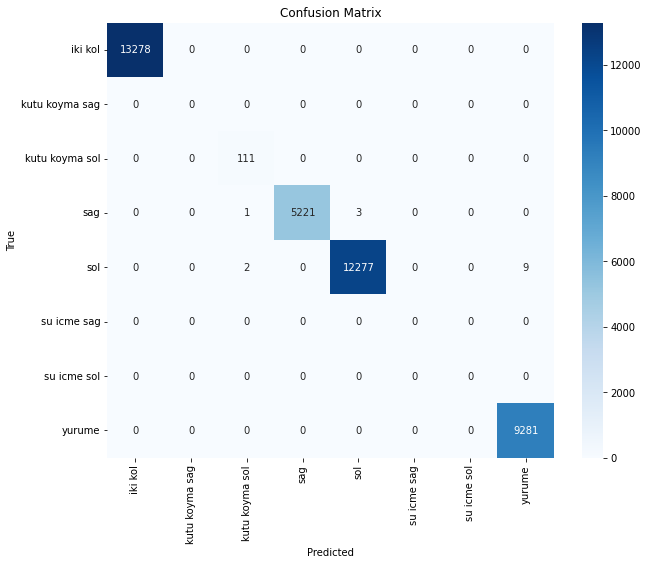

In [12]:
# Tahmin edilen sınıf etiketlerinin benzersiz değerlerini kontrol et
unique_pred_classes = np.unique(y_pred_classes)
unique_true_classes = np.unique(y_true)

print(f"Unique predicted classes: {unique_pred_classes}")
print(f"Unique true classes: {unique_true_classes}")

# Sınıflandırma raporunu oluştururken tüm sınıfları belirterek hatayı çözme
print(classification_report(y_true, y_pred_classes, labels=np.arange(len(class_labels)), target_names=class_labels))

# Karışıklık matrisini oluştur ve görselleştir
conf_matrix = confusion_matrix(y_true, y_pred_classes, labels=np.arange(len(class_labels)))

# Karışıklık matrisi görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [13]:
# Eğitim veri setindeki her sınıf için görüntü sayısını kontrol et
for class_name in class_labels:
    class_dir = os.path.join(train_dir, class_name)
    num_images = len(os.listdir(class_dir))
    print(f'{class_name} sınıfında eğitim veri setinde {num_images} görüntü var.')

# Test veri setindeki her sınıf için görüntü sayısını kontrol et
for class_name in class_labels:
    class_dir = os.path.join(test_dir, class_name)
    num_images = len(os.listdir(class_dir))
    print(f'{class_name} sınıfında test veri setinde {num_images} görüntü var.')


iki kol sınıfında eğitim veri setinde 182 görüntü var.
kutu koyma sag sınıfında eğitim veri setinde 96 görüntü var.
kutu koyma sol sınıfında eğitim veri setinde 77 görüntü var.
sag sınıfında eğitim veri setinde 74 görüntü var.
sol sınıfında eğitim veri setinde 172 görüntü var.
su icme sag sınıfında eğitim veri setinde 121 görüntü var.
su icme sol sınıfında eğitim veri setinde 128 görüntü var.
yurume sınıfında eğitim veri setinde 52 görüntü var.
iki kol sınıfında test veri setinde 119 görüntü var.
kutu koyma sag sınıfında test veri setinde 52 görüntü var.
kutu koyma sol sınıfında test veri setinde 42 görüntü var.
sag sınıfında test veri setinde 41 görüntü var.
sol sınıfında test veri setinde 96 görüntü var.
su icme sag sınıfında test veri setinde 67 görüntü var.
su icme sol sınıfında test veri setinde 71 görüntü var.
yurume sınıfında test veri setinde 29 görüntü var.


Training Set Class Distribution:
Counter({'Abdullah_Gokturk_yurume_1_kineckli_': 320, 'Abdullah_Gokturk_yurume_3_': 320, 'Abdullah_Gokturk_yurume_3_kineckli_': 320, 'Abdullah_Gokturk_yurume_5': 320, 'Abdullah_Gokturk__yurume_2': 320, 'Abdullah_Reveha_Sahin_yurume_1': 320, 'Abdullah_Reveha_Sahin_yurume_2': 320, 'Abdullah_Reveha_Sahin_yurume_3': 320, 'Abdullah_Reveha_Sahin_yurume_4': 320, 'Abdullah_Reveha_Sahin_yurume_5': 320, 'Ahmet_Hamza_Siyak_yurume_1': 320, 'Ahmet_Ozdemir_yurume_1': 320, 'Ahmet_Ozdemir_yurume_11_kinectli__': 320, 'Ahmet_Ozdemir_yurume_1_kinectli_': 320, 'Ahmet_Ozdemir_yurume_2': 320, 'Ahmet_Ozdemir_yurume_3': 320, 'Ahmet_Ozdemir_yurume_3_kinectli_': 320, 'Ahmet_Ozdemir_yurume_4_kinectli_': 320, 'Ahmet_Ozdemir_yurume_5_kinectli_': 320, 'Ahmet_Ozdemir_yurume_6_kinectli_': 320, 'Ahmet_Ozdemir_yurume_7_kinectli_': 320, 'Ahmet_Ozdemir_yurume_8_kinectli_': 320, 'Ahmet_Ozdemir_yurume_9_kinectli_': 320, 'Ali_Asim_Coskun_yurume_1': 320, 'Ali_Asim_Coskun_yurume_1_kinectli_': 3

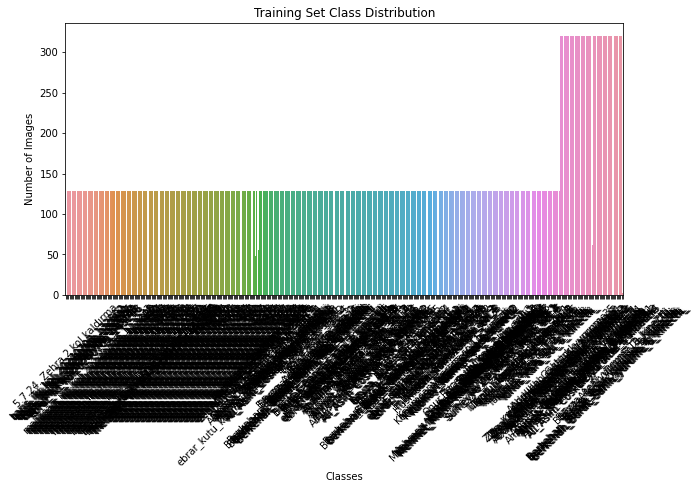

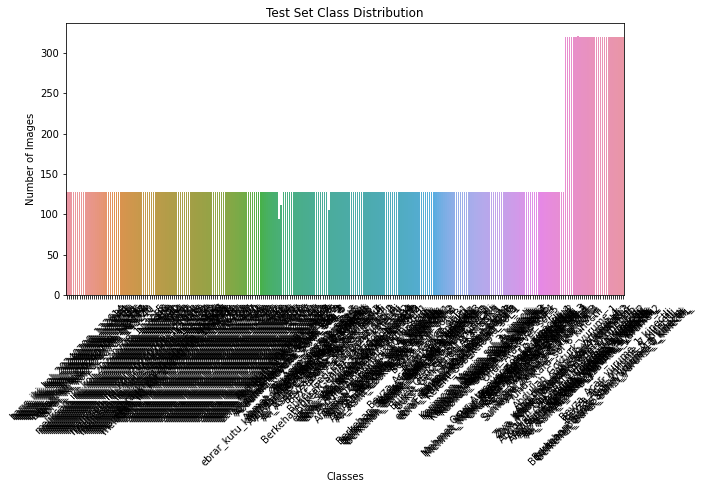

In [17]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Eğitim ve test dizinlerindeki sınıf dağılımını kontrol eden işlev
def check_class_distribution(directory):
    class_distribution = Counter()
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png', 'bmp')):
                class_name = os.path.basename(root)
                class_distribution[class_name] += 1
    return class_distribution

# Eğitim ve test dizinlerindeki sınıf dağılımını kontrol et
train_class_distribution = check_class_distribution(train_dir)
test_class_distribution = check_class_distribution(test_dir)

print("Training Set Class Distribution:")
print(train_class_distribution)

print("\nTest Set Class Distribution:")
print(test_class_distribution)

# Sınıf dağılımını görselleştirme
def plot_class_distribution(distribution, title):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(distribution.keys()), y=list(distribution.values()))
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(train_class_distribution, 'Training Set Class Distribution')
plot_class_distribution(test_class_distribution, 'Test Set Class Distribution')


In [19]:
import os
from collections import Counter

# Eğitim ve test dizinlerindeki sınıf dağılımını kontrol eden işlev
def check_class_distribution(directory):
    class_distribution = Counter()
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png', 'bmp')):
                class_name = os.path.basename(root)
                class_distribution[class_name] += 1
    return class_distribution

# Eğitim ve test dizinlerindeki sınıf dağılımını kontrol et
train_dir = "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik"
test_dir = "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik_test"

train_class_distribution = check_class_distribution(train_dir)
test_class_distribution = check_class_distribution(test_dir)

print("Training Set Class Distribution:")
print(train_class_distribution)

print("\nTest Set Class Distribution:")
print(test_class_distribution)


Training Set Class Distribution:
Counter({'Abdullah_Gokturk_yurume_1_kineckli_': 320, 'Abdullah_Gokturk_yurume_3_': 320, 'Abdullah_Gokturk_yurume_3_kineckli_': 320, 'Abdullah_Gokturk_yurume_5': 320, 'Abdullah_Gokturk__yurume_2': 320, 'Abdullah_Reveha_Sahin_yurume_1': 320, 'Abdullah_Reveha_Sahin_yurume_2': 320, 'Abdullah_Reveha_Sahin_yurume_3': 320, 'Abdullah_Reveha_Sahin_yurume_4': 320, 'Abdullah_Reveha_Sahin_yurume_5': 320, 'Ahmet_Hamza_Siyak_yurume_1': 320, 'Ahmet_Ozdemir_yurume_1': 320, 'Ahmet_Ozdemir_yurume_11_kinectli__': 320, 'Ahmet_Ozdemir_yurume_1_kinectli_': 320, 'Ahmet_Ozdemir_yurume_2': 320, 'Ahmet_Ozdemir_yurume_3': 320, 'Ahmet_Ozdemir_yurume_3_kinectli_': 320, 'Ahmet_Ozdemir_yurume_4_kinectli_': 320, 'Ahmet_Ozdemir_yurume_5_kinectli_': 320, 'Ahmet_Ozdemir_yurume_6_kinectli_': 320, 'Ahmet_Ozdemir_yurume_7_kinectli_': 320, 'Ahmet_Ozdemir_yurume_8_kinectli_': 320, 'Ahmet_Ozdemir_yurume_9_kinectli_': 320, 'Ali_Asim_Coskun_yurume_1': 320, 'Ali_Asim_Coskun_yurume_1_kinectli_': 3

In [ ]:
#En baştan başlayalım ,  Grafikleri tekrar oluştur hatalı... 

In [18]:
import os

# Klasör yolu
bin_dosyaları_klasörü_yolu = r"D:\08.07.2024 kol veriler\hepsi\yurume"

# Dosyaları kontrol etme ve uzantı değiştirme
for file_name in os.listdir(bin_dosyaları_klasörü_yolu):
    if os.path.isfile(os.path.join(bin_dosyaları_klasörü_yolu, file_name)):
        # Eğer dosya uzantısı yoksa, uzantıyı ekle
        if not file_name.endswith('.bin'):
            new_name = f"{file_name}.bin"
            os.rename(os.path.join(bin_dosyaları_klasörü_yolu, file_name), os.path.join(bin_dosyaları_klasörü_yolu, new_name))
            print(f"{file_name} -> {new_name} olarak değiştirildi.")


Abdullah_GOKTURK_y1bin -> Abdullah_GOKTURK_y1bin.bin olarak değiştirildi.
Abdullah_GOKTURK_y2bin -> Abdullah_GOKTURK_y2bin.bin olarak değiştirildi.
Abdullah_GOKTURK_y3_bin -> Abdullah_GOKTURK_y3_bin.bin olarak değiştirildi.
Abdullah_GOKTURK_y4_bin -> Abdullah_GOKTURK_y4_bin.bin olarak değiştirildi.
Abdullah_Gokturk_yurume_1bin -> Abdullah_Gokturk_yurume_1bin.bin olarak değiştirildi.
Abdullah_Gokturk_yurume_1_kineckli_bin -> Abdullah_Gokturk_yurume_1_kineckli_bin.bin olarak değiştirildi.
Abdullah_Gokturk_yurume_2bin -> Abdullah_Gokturk_yurume_2bin.bin olarak değiştirildi.
Abdullah_Gokturk_yurume_2_kineckli_bin -> Abdullah_Gokturk_yurume_2_kineckli_bin.bin olarak değiştirildi.
Abdullah_Gokturk_yurume_3_bin -> Abdullah_Gokturk_yurume_3_bin.bin olarak değiştirildi.
Abdullah_Gokturk_yurume_3_kineckli_bin -> Abdullah_Gokturk_yurume_3_kineckli_bin.bin olarak değiştirildi.
Abdullah_Gokturk_yurume_4_bin -> Abdullah_Gokturk_yurume_4_bin.bin olarak değiştirildi.
Abdullah_Gokturk_yurume_5bin -> Ab

Berkehan_Burak_Sahin_yurume_10_kinectli_bin -> Berkehan_Burak_Sahin_yurume_10_kinectli_bin.bin olarak değiştirildi.
Berkehan_Burak_Sahin_yurume_1_kinectli_bin -> Berkehan_Burak_Sahin_yurume_1_kinectli_bin.bin olarak değiştirildi.
Berkehan_Burak_Sahin_yurume_2_kinectli_bin -> Berkehan_Burak_Sahin_yurume_2_kinectli_bin.bin olarak değiştirildi.
Berkehan_Burak_Sahin_yurume_3_kinectli_bin -> Berkehan_Burak_Sahin_yurume_3_kinectli_bin.bin olarak değiştirildi.
Berkehan_Burak_Sahin_yurume_4_kinectli_bin -> Berkehan_Burak_Sahin_yurume_4_kinectli_bin.bin olarak değiştirildi.
Berkehan_Burak_Sahin_yurume_5_kinectli_bin -> Berkehan_Burak_Sahin_yurume_5_kinectli_bin.bin olarak değiştirildi.
Berkehan_Burak_Sahin_yurume_6_kinectli_bin -> Berkehan_Burak_Sahin_yurume_6_kinectli_bin.bin olarak değiştirildi.
Berkehan_Burak_Sahin_yurume_7_kinectli_bin -> Berkehan_Burak_Sahin_yurume_7_kinectli_bin.bin olarak değiştirildi.
Berkehan_Burak_Sahin_yurume_8_kinectli_bin -> Berkehan_Burak_Sahin_yurume_8_kinectli_b

Cagla_yurume_3bin -> Cagla_yurume_3bin.bin olarak değiştirildi.
cagla_yurume_4bin -> cagla_yurume_4bin.bin olarak değiştirildi.
Cagla_yurume_5bin -> Cagla_yurume_5bin.bin olarak değiştirildi.
Elif_Deniz_yurume_1_bin -> Elif_Deniz_yurume_1_bin.bin olarak değiştirildi.
Elif_Deniz_yurume_2_bin -> Elif_Deniz_yurume_2_bin.bin olarak değiştirildi.
Elif_Deniz_yurume_3_bin -> Elif_Deniz_yurume_3_bin.bin olarak değiştirildi.
elif_yurume1bin -> elif_yurume1bin.bin olarak değiştirildi.
emirkan_utku_demir_1_bin -> emirkan_utku_demir_1_bin.bin olarak değiştirildi.
emirkan_utku_demir_2_yurumebin -> emirkan_utku_demir_2_yurumebin.bin olarak değiştirildi.
emirkan_utku_demir_3_yurumebin -> emirkan_utku_demir_3_yurumebin.bin olarak değiştirildi.
Emirkan_Utku_Demir_yurume_1_bin -> Emirkan_Utku_Demir_yurume_1_bin.bin olarak değiştirildi.
Emirkan_Utku_Demir_yurume_2_bin -> Emirkan_Utku_Demir_yurume_2_bin.bin olarak değiştirildi.
Emirkan_Utku_Demir_yurume_3_bin -> Emirkan_Utku_Demir_yurume_3_bin.bin olarak 

Kubilay_Yazman_yurume_1_kinectli_bin -> Kubilay_Yazman_yurume_1_kinectli_bin.bin olarak değiştirildi.
Kubilay_Yazman_yurume_2_kinectli_bin -> Kubilay_Yazman_yurume_2_kinectli_bin.bin olarak değiştirildi.
Kubilay_Yazman_yurume_3_kinectli_bin -> Kubilay_Yazman_yurume_3_kinectli_bin.bin olarak değiştirildi.
Kubilay_Yazman_yurume_4_kinectli_bin -> Kubilay_Yazman_yurume_4_kinectli_bin.bin olarak değiştirildi.
Kubilay_Yazman_yurume_5_kinectli_bin -> Kubilay_Yazman_yurume_5_kinectli_bin.bin olarak değiştirildi.
Kubilay_Yazman_yurume_6_kinectli_bin -> Kubilay_Yazman_yurume_6_kinectli_bin.bin olarak değiştirildi.
Kubilay_Yazman_yurume_7_kinectli_bin -> Kubilay_Yazman_yurume_7_kinectli_bin.bin olarak değiştirildi.
Kubilay_Yazman_yurume_8_kinectli_bin -> Kubilay_Yazman_yurume_8_kinectli_bin.bin olarak değiştirildi.
Kubilay_Yazman_yurume_9_kinectli_bin -> Kubilay_Yazman_yurume_9_kinectli_bin.bin olarak değiştirildi.
Kubilay_yazman_yurume_kinecli_10bin -> Kubilay_yazman_yurume_kinecli_10bin.bin ola

Resit_Aydin_yurume_8_kinectli_bin -> Resit_Aydin_yurume_8_kinectli_bin.bin olarak değiştirildi.
Resit_Aydin_yurume_Kinectli_2bin -> Resit_Aydin_yurume_Kinectli_2bin.bin olarak değiştirildi.
Resit_Aydin_yurume_Kinectli_3bin -> Resit_Aydin_yurume_Kinectli_3bin.bin olarak değiştirildi.
Resit_Aydin_yurume_Kinectli_4bin -> Resit_Aydin_yurume_Kinectli_4bin.bin olarak değiştirildi.
Resit_Aydin_yurume_Kinectli_5bin -> Resit_Aydin_yurume_Kinectli_5bin.bin olarak değiştirildi.
Resit_Aydin_yurume_Kinectli_6bin -> Resit_Aydin_yurume_Kinectli_6bin.bin olarak değiştirildi.
Resit_Aydin_yurume_Kinectli_7bin -> Resit_Aydin_yurume_Kinectli_7bin.bin olarak değiştirildi.
Resit_Aydin_yurume_Kinectli_8bin -> Resit_Aydin_yurume_Kinectli_8bin.bin olarak değiştirildi.
Resit_Aydin_yurume_Kinectli_bin -> Resit_Aydin_yurume_Kinectli_bin.bin olarak değiştirildi.
Salih_Karagollu_y1_bin -> Salih_Karagollu_y1_bin.bin olarak değiştirildi.
Salih_Karagollu_y2bin -> Salih_Karagollu_y2bin.bin olarak değiştirildi.
Salih_Ka

Yunus_Kara_yurume_6_kinectli_bin -> Yunus_Kara_yurume_6_kinectli_bin.bin olarak değiştirildi.
Yunus_Kara_yurume_7_kinectli_bin -> Yunus_Kara_yurume_7_kinectli_bin.bin olarak değiştirildi.
Yunus_Kara_yurume_8_kinectli_bin -> Yunus_Kara_yurume_8_kinectli_bin.bin olarak değiştirildi.
Yunus_Kara_yurume_9_kinectli_bin -> Yunus_Kara_yurume_9_kinectli_bin.bin olarak değiştirildi.
Yunus_KAra_yurume_Kinectli_10bin -> Yunus_KAra_yurume_Kinectli_10bin.bin olarak değiştirildi.
Yunus_KAra_yurume_Kinectli_2bin -> Yunus_KAra_yurume_Kinectli_2bin.bin olarak değiştirildi.
Yunus_KAra_yurume_Kinectli_3bin -> Yunus_KAra_yurume_Kinectli_3bin.bin olarak değiştirildi.
Yunus_KAra_yurume_Kinectli_4bin -> Yunus_KAra_yurume_Kinectli_4bin.bin olarak değiştirildi.
Yunus_KAra_yurume_Kinectli_5bin -> Yunus_KAra_yurume_Kinectli_5bin.bin olarak değiştirildi.
Yunus_KAra_yurume_Kinectli_6bin -> Yunus_KAra_yurume_Kinectli_6bin.bin olarak değiştirildi.
Yunus_KAra_yurume_Kinectli_7bin -> Yunus_KAra_yurume_Kinectli_7bin.bin

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mmwave.dataloader import DCA1000
import mmwave.dsp as dsp

# .bin dosyaları klasörü yolu
bin_dosyaları_klasörü_yolu = r"C:\Users\Hp\Desktop\5.10.2024\new\kutu koyma sol"

# Görsellerin kaydedileceği klasör yolu
gorseller_klasoru_yolu = r"C:\Users\Hp\Desktop\5.10.2024\new_grafik\kutu koyma sol"

def process_bin_to_images(file_path, output_folder):
    num_tx_antennas = 2
    numChirpsPerFrame = 128
    numFrames = 128
    numRxAntennas = 4
    numADCSamples = 256

    # Verileri yükle
    adc_data = np.fromfile(file_path, dtype=np.uint16)
    adc_data = adc_data.reshape(numFrames, -1)
    adc_data = np.apply_along_axis(DCA1000.organize, 1, adc_data, num_chirps=numChirpsPerFrame, num_rx=numRxAntennas, num_samples=numADCSamples)

    print(f"Data Loaded from {file_path} with shape {adc_data.shape}")

    # Klasörü oluştur
    os.makedirs(output_folder, exist_ok=True)

    # Her bir frame'i işleyip görsel oluştur
    for i in range(numFrames):
        frame = adc_data[i]
        range_fft_data = np.fft.fft(frame, axis=-1)
        assert range_fft_data.shape == (numChirpsPerFrame, numRxAntennas, numADCSamples), "[ERROR] Radar cube is not the correct shape!"
        fft2d_in = dsp.separate_tx(range_fft_data, num_tx_antennas, vx_axis=1, axis=0)
        fft2d_in = np.transpose(fft2d_in, axes=(2, 1, 0))
        fft2d_out = np.fft.fft(fft2d_in)
        aoa_input = fft2d_out

        fft2d_log_abs = 40 * np.log10(np.abs(fft2d_out) + 1e-10)
        det_matrix = np.sum(fft2d_log_abs, axis=1)
        det_matrix_vis = np.fft.fftshift(det_matrix, axes=1)

        # Range-Doppler plotu oluştur ve kaydet
        plt.figure(figsize=(12, 6))
        plt.imshow(det_matrix_vis / det_matrix_vis.max(), aspect='auto', cmap='jet')
        plt.title(f"Range-Doppler plot {i} - {os.path.basename(file_path)}")
        plt.colorbar(label='Amplitude (dBFS)')
        plt.xlabel('Range-fft')
        plt.ylabel('Doppler-fft')

        # Görseli kaydet
        plt.savefig(os.path.join(output_folder, f'RangeDoppler_{i}.png'))
        plt.close()

# .bin dosyaları için işlem yap
bin_files_found = False
for file_name in os.listdir(bin_dosyaları_klasörü_yolu):
    if file_name.endswith('.bin'):
        bin_files_found = True
        file_path = os.path.join(bin_dosyaları_klasörü_yolu, file_name)
        
        # Her dosya için uygun bir klasör oluştur
        klasor_yolu_isimli = os.path.join(gorseller_klasoru_yolu, os.path.splitext(file_name)[0])
        process_bin_to_images(file_path, klasor_yolu_isimli)

if not bin_files_found:
    print("Klasörde '.bin' uzantılı dosya bulunamadı.")

print("Görseller başarıyla oluşturuldu ve klasörlere kaydedildi.")


Data Loaded from C:\Users\Hp\Desktop\5.10.2024\new\kutu koyma sol\ebrar_kutu_koyma_sol_kol20241005_181550.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\5.10.2024\new\kutu koyma sol\ebrar_kutu_koyma_sol_kol20241005_181602.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\5.10.2024\new\kutu koyma sol\ebrar_kutu_koyma_sol_kol20241005_181742.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\5.10.2024\new\kutu koyma sol\ebrar_kutu_koyma_sol_kol20241005_181752.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\5.10.2024\new\kutu koyma sol\ebrar_kutu_koyma_sol_kol20241005_181802.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\5.10.2024\new\kutu koyma sol\ebrar_kutu_koyma_sol_kol20241005_181814.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\5.10.2024\new\kutu koyma sol\ebrar_kutu_koyma_sol_kol20241005_181825.bin with shape (128, 128, 4, 256)
Data Loaded from C:\

ValueError: cannot reshape array of size 0 into shape (128,4,256)

In [ ]:
# Klasörde aynı isimden grafikler varsa atlayarak yap... yukarıda ki bazen yarıda kesiliyor. 

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mmwave.dataloader import DCA1000
import mmwave.dsp as dsp

# .bin dosyaları klasörü yolu
bin_dosyaları_klasörü_yolu = r"D:\5.10.2024\sol kol su"
# Görsellerin kaydedileceği klasör yolu
gorseller_klasoru_yolu =  r"C:\Users\Hp\Desktop\New folder (2)\sol kol su"

def process_bin_to_images(file_path, output_folder, numFrames=128):
    num_tx_antennas = 2
    numChirpsPerFrame = 128
    numRxAntennas = 4
    numADCSamples = 256

    # Verileri yükle
    adc_data = np.fromfile(file_path, dtype=np.uint16)
    adc_data = adc_data.reshape(numFrames, -1)
    adc_data = np.apply_along_axis(DCA1000.organize, 1, adc_data, num_chirps=numChirpsPerFrame, num_rx=numRxAntennas, num_samples=numADCSamples)

    print(f"Data Loaded from {file_path} with shape {adc_data.shape}")

    # Klasörü oluştur
    os.makedirs(output_folder, exist_ok=True)

    # Her bir frame'i işleyip görsel oluştur
    for i in range(numFrames):
        # Görsel zaten mevcutsa işleme devam etme
        image_path = os.path.join(output_folder, f'RangeDoppler_{i}.png')
        if os.path.exists(image_path):
            print(f"Görsel zaten mevcut: {image_path}, atlanıyor.")
            continue

        frame = adc_data[i]
        range_fft_data = np.fft.fft(frame, axis=-1)
        assert range_fft_data.shape == (numChirpsPerFrame, numRxAntennas, numADCSamples), "[ERROR] Radar cube is not the correct shape!"
        fft2d_in = dsp.separate_tx(range_fft_data, num_tx_antennas, vx_axis=1, axis=0)
        fft2d_in = np.transpose(fft2d_in, axes=(2, 1, 0))
        fft2d_out = np.fft.fft(fft2d_in)
        aoa_input = fft2d_out

        fft2d_log_abs = 40 * np.log10(np.abs(fft2d_out) + 1e-10)
        det_matrix = np.sum(fft2d_log_abs, axis=1)
        det_matrix_vis = np.fft.fftshift(det_matrix, axes=1)

        # Range-Doppler plotu oluştur ve kaydet
        plt.figure(figsize=(12, 6))
        plt.imshow(det_matrix_vis / det_matrix_vis.max(), aspect='auto', cmap='jet')
        plt.title(f"Range-Doppler plot {i} - {os.path.basename(file_path)}")
        plt.colorbar(label='Amplitude (dBFS)')
        plt.xlabel('Range-fft')
        plt.ylabel('Doppler-fft')

        # Görseli kaydet
        plt.savefig(image_path)
        plt.close()

# .bin dosyaları için işlem yap
bin_files_found = False
for file_name in os.listdir(bin_dosyaları_klasörü_yolu):
    if file_name.endswith('.bin'):
        bin_files_found = True
        file_path = os.path.join(bin_dosyaları_klasörü_yolu, file_name)
        
        # Her dosya için uygun bir klasör oluştur
        klasor_yolu_isimli = os.path.join(gorseller_klasoru_yolu, os.path.splitext(file_name)[0])

        # Görsellerin varlığını kontrol et
        mevcut_gorseller = len([f for f in os.listdir(klasor_yolu_isimli) if f.endswith('.png')]) if os.path.exists(klasor_yolu_isimli) else 0
        
        # Eğer daha önce tüm numFrames kadar görsel kaydedilmişse atla
        if mevcut_gorseller >= 320:
            print(f"{file_name} için tüm görseller zaten mevcut, dosya atlanıyor.")
            continue
        
        process_bin_to_images(file_path, klasor_yolu_isimli)

if not bin_files_found:
    print("Klasörde '.bin' uzantılı dosya bulunamadı.")

print("Görseller başarıyla oluşturuldu ve klasörlere kaydedildi.")


Data Loaded from C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi\kutu koyma sol\ebrar_kutu_koyma_sol_kol20240709_124204.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi\kutu koyma sol\ebrar_kutu_koyma_sol_kol20240709_124304.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi\kutu koyma sol\ebrar_kutu_koyma_sol_kol20240709_124318.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi\kutu koyma sol\ebrar_kutu_koyma_sol_kol20240709_124328.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi\kutu koyma sol\ebrar_kutu_koyma_sol_kol20240709_124340.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi\kutu koyma sol\ebrar_kutu_koyma_sol_kol20240709_124352.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi\kutu

Data Loaded from C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi\kutu koyma sol\ebrar_kutu_koyma_sol_kol20240709_140101.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi\kutu koyma sol\ebrar_kutu_koyma_sol_kol20240709_140115.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi\kutu koyma sol\ebrar_kutu_koyma_sol_kol20240709_140129.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi\kutu koyma sol\ebrar_kutu_koyma_sol_kol20240709_140143.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi\kutu koyma sol\ebrar_kutu_koyma_sol_kol20240709_140157.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi\kutu koyma sol\ebrar_kutu_koyma_sol_kol20240709_140209.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi\kutu

Data Loaded from C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi\kutu koyma sol\zehra_kutu_koyma_sol_kol20240709_113724.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi\kutu koyma sol\zehra_kutu_koyma_sol_kol20240709_113734.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi\kutu koyma sol\zehra_kutu_koyma_sol_kol20240709_113747.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi\kutu koyma sol\zehra_kutu_koyma_sol_kol20240709_113759.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi\kutu koyma sol\zehra_kutu_koyma_sol_kol20240709_113811.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi\kutu koyma sol\zehra_kutu_koyma_sol_kol20240709_113821.bin with shape (128, 128, 4, 256)
Data Loaded from C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi\kutu

In [42]:
#Türkçe karakterleri yok et
import os
import re

# Türkçe karakterleri İngilizce karakterlere çevirme
def replace_tr_chars(name):
    tr_chars = "çğıöşüÇĞİÖŞÜ"
    en_chars = "cgiosuCGIOSU"
    tr_to_en = str.maketrans(tr_chars, en_chars)
    return name.translate(tr_to_en)

# Boşlukları ve diğer özel karakterleri kaldırma
def clean_name(name):
    name = replace_tr_chars(name)
    name = re.sub(r'\s+', '_', name)  # Boşlukları alt çizgi ile değiştir
    name = re.sub(r'[^a-zA-Z0-9_]', '', name)  # Harf ve rakam dışındaki karakterleri kaldır
    return name

# Klasörleri ve dosyaları yeniden adlandırma
def rename_items(base_dir):
    for root, dirs, files in os.walk(base_dir, topdown=False):
        for name in files:
            new_name = clean_name(name)
            os.rename(os.path.join(root, name), os.path.join(root, new_name))
        for name in dirs:
            new_name = clean_name(name)
            os.rename(os.path.join(root, name), os.path.join(root, new_name))

# Ana klasör yolları
folders = [
    r"C:\Users\Hp\Desktop\veriler\sol kol",
    r"C:\Users\Hp\Desktop\veriler\sag kol"
]

# Her bir klasör için yeniden adlandırma işlemini gerçekleştir
for folder in folders:
    rename_items(folder)

print("Klasör ve dosya adları başarıyla yeniden adlandırıldı.")


Klasör ve dosya adları başarıyla yeniden adlandırıldı.


In [ ]:
#Resnet50 yi yürüme hariç deniyorum.

In [3]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    gpu_count = len(gpus)
    print("Number of GPUs available: ", gpu_count)
else:
    print("No GPUs available")


Number of GPUs available:  1


In [9]:
import os
import shutil
import random

def set_permissions(file_path):
    try:
        os.chmod(file_path, stat.S_IRUSR | stat.S_IWUSR | stat.S_IRGRP | stat.S_IROTH)
    except Exception as e:
        print(f"Could not change permissions for file: {file_path}. Error: {e}")

def prepare_data(src_folder, dest_folder, split_ratio=0.2):
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)
    
    classes = [d for d in os.listdir(src_folder) if os.path.isdir(os.path.join(src_folder, d))]
    
    for cls in classes:
        cls_folder = os.path.join(src_folder, cls)
        subfolders = [os.path.join(cls_folder, sf) for sf in os.listdir(cls_folder) if os.path.isdir(os.path.join(cls_folder, sf))]
        
        # Alt klasörleri karıştır ve bölme oranına göre eğitim ve test setine ayır
        random.shuffle(subfolders)
        split_index = int(len(subfolders) * split_ratio)
        test_subfolders = subfolders[:split_index]
        train_subfolders = subfolders[split_index:]
        
        for subfolder_list, set_name in [(train_subfolders, 'train'), (test_subfolders, 'test')]:
            set_folder = os.path.join(dest_folder, set_name, cls)
            os.makedirs(set_folder, exist_ok=True)
            
            for subfolder in subfolder_list:
                dest_subfolder = os.path.join(set_folder, os.path.basename(subfolder))
                os.makedirs(dest_subfolder, exist_ok=True)
                
                images = sorted(os.listdir(subfolder))
                for img in images:
                    src_path = os.path.join(subfolder, img)
                    dest_path = os.path.join(dest_subfolder, img)
                    try:
                        set_permissions(src_path)
                        shutil.copy(src_path, dest_path)
                    except PermissionError as e:
                        print(f"Permission denied for file: {src_path}. Skipping this file.")
                    except Exception as e:
                        print(f"An error occurred while copying file: {src_path}. Error: {e}")

# Veriyi hazırla
src_folder = r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik"
dest_folder = r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik_split_dataset"
prepare_data(src_folder, dest_folder)

print("Veri hazırlama işlemi tamamlandı.")


Veri hazırlama işlemi tamamlandı.


In [ ]:
#7/8/2024

In [12]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
#2 li sınıflandırma (su içme ve iki kol ayrımı)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 126, 62, 62, 32)   2624      
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 62, 62, 32)   128       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 63, 31, 31, 32)    0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 31, 31, 32)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 61, 29, 29, 16)    13840     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 29, 29, 16)    64        
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 30, 14, 14, 16)    0

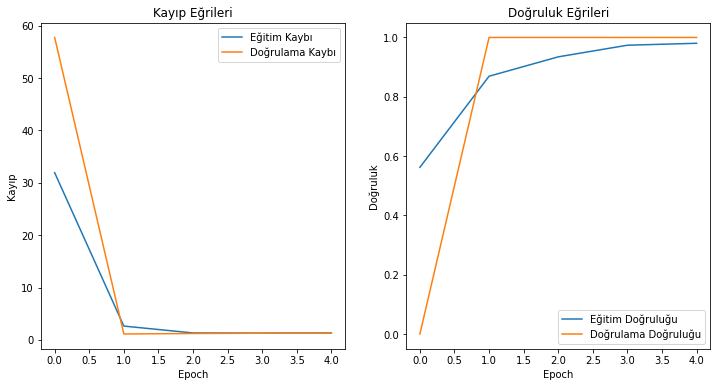

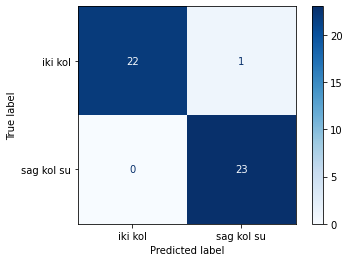

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Veriyi yükleme fonksiyonu
def load_data_from_folder(folder_path, label):
    data = []
    labels = []
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            frames = []
            for file_name in sorted(os.listdir(subfolder_path)):
                file_path = os.path.join(subfolder_path, file_name)
                img = load_img(file_path, target_size=(64, 64))
                img_array = img_to_array(img)
                frames.append(img_array)
            if len(frames) == 128:  # 128 frame içerdiğinden emin ol
                data.append(np.array(frames))
                labels.append(label)
    return np.array(data), np.array(labels)

# Eğitim ve test verilerini yükle
def load_dataset(train_path, test_path):
    # Eğitim verileri
    train_iki_kol_data, train_iki_kol_labels = load_data_from_folder(
        os.path.join(train_path, "iki kol"), 0)
    train_sag_kol_su_data, train_sag_kol_su_labels = load_data_from_folder(
        os.path.join(train_path, "su icme sag"), 1)
    
    # Test verileri
    test_iki_kol_data, test_iki_kol_labels = load_data_from_folder(
        os.path.join(test_path, "iki kol"), 0)
    test_sag_kol_su_data, test_sag_kol_su_labels = load_data_from_folder(
        os.path.join(test_path, "su icme sag"), 1)
    
    # Tüm veriyi birleştir
    train_data = np.concatenate([train_iki_kol_data, train_sag_kol_su_data], axis=0)
    train_labels = np.concatenate([train_iki_kol_labels, train_sag_kol_su_labels], axis=0)
    test_data = np.concatenate([test_iki_kol_data, test_sag_kol_su_data], axis=0)
    test_labels = np.concatenate([test_iki_kol_labels, test_sag_kol_su_labels], axis=0)
    
    return train_data, train_labels, test_data, test_labels

# Pathler
train_path = "C:/Users/Hp/Desktop/08.07.2024 kol veriler/deneme_esit_veri_split_dataset/train"
test_path = "C:/Users/Hp/Desktop/08.07.2024 kol veriler/deneme_esit_veri_split_dataset/test"

# Verileri yükle
train_data, train_labels, test_data, test_labels = load_dataset(train_path, test_path)

# Model tanımlama
model = Sequential([
    Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(128, 64, 64, 3)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.3),

    Conv3D(16, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(2, activation='softmax', kernel_regularizer=l2(0.01))
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model özeti
model.summary()

# Modeli eğitme
history = model.fit(
    train_data, 
    tf.keras.utils.to_categorical(train_labels, num_classes=2), 
    epochs=5, 
    validation_split=0.2
)

# Modeli değerlendirme
test_loss, test_acc = model.evaluate(test_data, tf.keras.utils.to_categorical(test_labels, num_classes=2))
print(f"Test accuracy: {test_acc}")

# Kayıp ve doğruluk eğrilerini çizme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()

# Karışıklık matrisi hesaplama ve çizme
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_labels

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["iki kol", "sag kol su"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
#3 lü sınıflandırma ("iki kol", "sag kol su" ve "kutu koyma sag")

In [ ]:
#3 lü sınıf 40 tane train 20 tane test için -- iyi sonuç

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_14 (Conv3D)           (None, 126, 62, 62, 64)   5248      
_________________________________________________________________
batch_normalization_14 (Batc (None, 126, 62, 62, 64)   256       
_________________________________________________________________
max_pooling3d_14 (MaxPooling (None, 63, 31, 31, 64)    0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 63, 31, 31, 64)    0         
_________________________________________________________________
conv3d_15 (Conv3D)           (None, 61, 29, 29, 32)    55328     
_________________________________________________________________
batch_normalization_15 (Batc (None, 61, 29, 29, 32)    128       
_________________________________________________________________
max_pooling3d_15 (MaxPooling (None, 30, 14, 14, 32)   

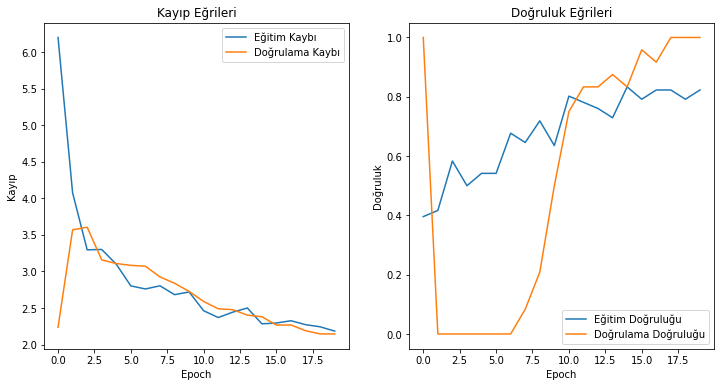

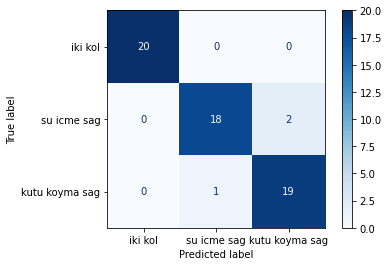

In [40]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Veriyi yükleme fonksiyonu
def load_data_from_folder(folder_path, label):
    data = []
    labels = []
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            frames = []
            for file_name in sorted(os.listdir(subfolder_path)):
                file_path = os.path.join(subfolder_path, file_name)
                img = load_img(file_path, target_size=(64, 64))
                img_array = img_to_array(img)
                frames.append(img_array)
            if len(frames) == 128:  # 128 frame içerdiğinden emin ol
                data.append(np.array(frames))
                labels.append(label)
            else:
                print(f"Folder {subfolder} does not contain 128 frames.")
    return np.array(data), np.array(labels)

# Eğitim ve test verilerini yükle
def load_dataset(train_path, test_path):
    # Eğitim verileri
    train_iki_kol_data, train_iki_kol_labels = load_data_from_folder(
        os.path.join(train_path, "iki kol"), 0)
    train_sag_kol_su_data, train_sag_kol_su_labels = load_data_from_folder(
        os.path.join(train_path, "su icme sag"), 1)
    train_kutu_koyma_sag_data, train_kutu_koyma_sag_labels = load_data_from_folder(
        os.path.join(train_path, "kutu koyma sag"), 2)

    # Test verileri
    test_iki_kol_data, test_iki_kol_labels = load_data_from_folder(
        os.path.join(test_path, "iki kol"), 0)
    test_sag_kol_su_data, test_sag_kol_su_labels = load_data_from_folder(
        os.path.join(test_path, "su icme sag"), 1)
    test_kutu_koyma_sag_data, test_kutu_koyma_sag_labels = load_data_from_folder(
        os.path.join(test_path, "kutu koyma sag"), 2)

    # Tüm veriyi birleştir
    train_data = np.concatenate([train_iki_kol_data, train_sag_kol_su_data, train_kutu_koyma_sag_data], axis=0)
    train_labels = np.concatenate([train_iki_kol_labels, train_sag_kol_su_labels, train_kutu_koyma_sag_labels], axis=0)
    test_data = np.concatenate([test_iki_kol_data, test_sag_kol_su_data, test_kutu_koyma_sag_data], axis=0)
    test_labels = np.concatenate([test_iki_kol_labels, test_sag_kol_su_labels, test_kutu_koyma_sag_labels], axis=0)
    
    return train_data, train_labels, test_data, test_labels

# Pathler
train_path = "C:/Users/Hp/Desktop/08.07.2024 kol veriler/deneme_esit_veri_split_dataset/train"
test_path = "C:/Users/Hp/Desktop/08.07.2024 kol veriler/deneme_esit_veri_split_dataset/test"

# Verileri yükle
train_data, train_labels, test_data, test_labels = load_dataset(train_path, test_path)

# Etiketleri one-hot encoding formatına dönüştür
train_labels_encoded = tf.keras.utils.to_categorical(train_labels, num_classes=3)
test_labels_encoded = tf.keras.utils.to_categorical(test_labels, num_classes=3)

from tensorflow.keras.optimizers import Adam

# Yeni model tanımlama
model = Sequential([
    Conv3D(64, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(128, 64, 64, 3)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.4),

    Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.4),

    Conv3D(16, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(3, activation='softmax', kernel_regularizer=l2(0.01))
])

# Öğrenme hızını daha hassas ayarlayarak optimize etme
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Modeli derleme
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model özeti
model.summary()

# Modeli eğitme
history = model.fit(
    train_data, 
    train_labels_encoded, 
    epochs=20,  # Epoch sayısını artırdık
    validation_split=0.2,
    batch_size=4,  # Batch size'ı biraz artırdık
    shuffle=True
)

# Modeli değerlendirme
test_loss, test_acc = model.evaluate(test_data, test_labels_encoded)
print(f"Test accuracy: {test_acc}")

# Kayıp ve doğruluk eğrilerini çizme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()

# Karışıklık matrisi hesaplama ve çizme
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_labels

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["iki kol", "su icme sag", "kutu koyma sag"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_17 (Conv3D)           (None, 126, 62, 62, 64)   5248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 126, 62, 62, 64)   256       
_________________________________________________________________
max_pooling3d_17 (MaxPooling (None, 63, 31, 31, 64)    0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 63, 31, 31, 64)    0         
_________________________________________________________________
conv3d_18 (Conv3D)           (None, 61, 29, 29, 32)    55328     
_________________________________________________________________
batch_normalization_18 (Batc (None, 61, 29, 29, 32)    128       
_________________________________________________________________
max_pooling3d_18 (MaxPooling (None, 30, 14, 14, 32)   

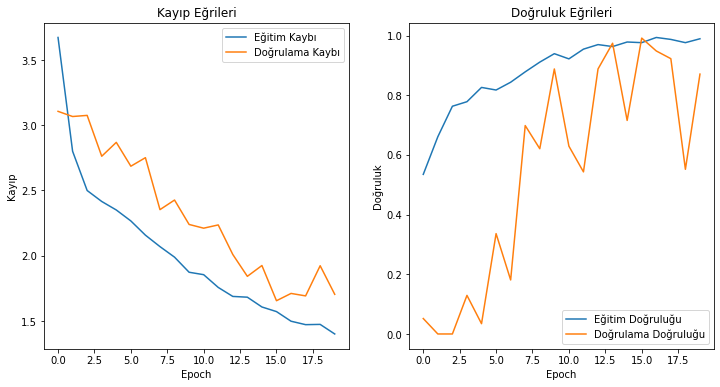

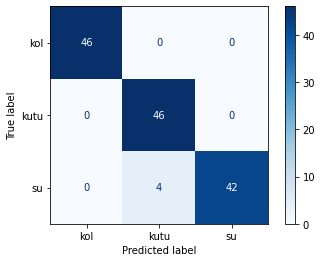

In [41]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Veriyi yükleme fonksiyonu
def load_data_from_folder(folder_path, label):
    data = []
    labels = []
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            frames = []
            for file_name in sorted(os.listdir(subfolder_path)):
                file_path = os.path.join(subfolder_path, file_name)
                img = load_img(file_path, target_size=(64, 64))
                img_array = img_to_array(img)
                frames.append(img_array)
            if len(frames) == 128:  # 128 frame içerdiğinden emin ol
                data.append(np.array(frames))
                labels.append(label)
            else:
                print(f"Folder {subfolder} does not contain 128 frames.")
    return np.array(data), np.array(labels)

# Eğitim ve test verilerini yükle
def load_dataset(train_path, test_path):
    # Eğitim verileri
    train_iki_kol_data, train_iki_kol_labels = load_data_from_folder(
        os.path.join(train_path, "kol"), 0)
    train_sag_kol_su_data, train_sag_kol_su_labels = load_data_from_folder(
        os.path.join(train_path, "kutu"), 1)
    train_kutu_koyma_sag_data, train_kutu_koyma_sag_labels = load_data_from_folder(
        os.path.join(train_path, "su"), 2)

    # Test verileri
    test_iki_kol_data, test_iki_kol_labels = load_data_from_folder(
        os.path.join(test_path, "kol"), 0)
    test_sag_kol_su_data, test_sag_kol_su_labels = load_data_from_folder(
        os.path.join(test_path, "kutu"), 1)
    test_kutu_koyma_sag_data, test_kutu_koyma_sag_labels = load_data_from_folder(
        os.path.join(test_path, "su"), 2)

    # Tüm veriyi birleştir
    train_data = np.concatenate([train_iki_kol_data, train_sag_kol_su_data, train_kutu_koyma_sag_data], axis=0)
    train_labels = np.concatenate([train_iki_kol_labels, train_sag_kol_su_labels, train_kutu_koyma_sag_labels], axis=0)
    test_data = np.concatenate([test_iki_kol_data, test_sag_kol_su_data, test_kutu_koyma_sag_data], axis=0)
    test_labels = np.concatenate([test_iki_kol_labels, test_sag_kol_su_labels, test_kutu_koyma_sag_labels], axis=0)
    
    return train_data, train_labels, test_data, test_labels

# Pathler
train_path = "C:/Users/Hp/Desktop/08.07.2024 kol veriler/3 class/train"
test_path = "C:/Users/Hp/Desktop/08.07.2024 kol veriler/3 class/test"

# Verileri yükle
train_data, train_labels, test_data, test_labels = load_dataset(train_path, test_path)

# Etiketleri one-hot encoding formatına dönüştür
train_labels_encoded = tf.keras.utils.to_categorical(train_labels, num_classes=3)
test_labels_encoded = tf.keras.utils.to_categorical(test_labels, num_classes=3)

from tensorflow.keras.optimizers import Adam

# Yeni model tanımlama
model = Sequential([
    Conv3D(64, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(128, 64, 64, 3)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.4),

    Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.4),

    Conv3D(16, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(3, activation='softmax', kernel_regularizer=l2(0.01))
])

# Öğrenme hızını daha hassas ayarlayarak optimize etme
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Modeli derleme
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model özeti
model.summary()

# Modeli eğitme
history = model.fit(
    train_data, 
    train_labels_encoded, 
    epochs=20,  # Epoch sayısını artırdık
    validation_split=0.2,
    batch_size=4,  # Batch size'ı biraz artırdık
    shuffle=True
)

# Modeli değerlendirme
test_loss, test_acc = model.evaluate(test_data, test_labels_encoded)
print(f"Test accuracy: {test_acc}")

# Kayıp ve doğruluk eğrilerini çizme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()

# Karışıklık matrisi hesaplama ve çizme
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_labels

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["kol", "kutu", "su"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_20 (Conv3D)           (None, 126, 62, 62, 64)   5248      
_________________________________________________________________
batch_normalization_20 (Batc (None, 126, 62, 62, 64)   256       
_________________________________________________________________
max_pooling3d_20 (MaxPooling (None, 63, 31, 31, 64)    0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 63, 31, 31, 64)    0         
_________________________________________________________________
conv3d_21 (Conv3D)           (None, 61, 29, 29, 32)    55328     
_________________________________________________________________
batch_normalization_21 (Batc (None, 61, 29, 29, 32)    128       
_________________________________________________________________
max_pooling3d_21 (MaxPooling (None, 30, 14, 14, 32)   

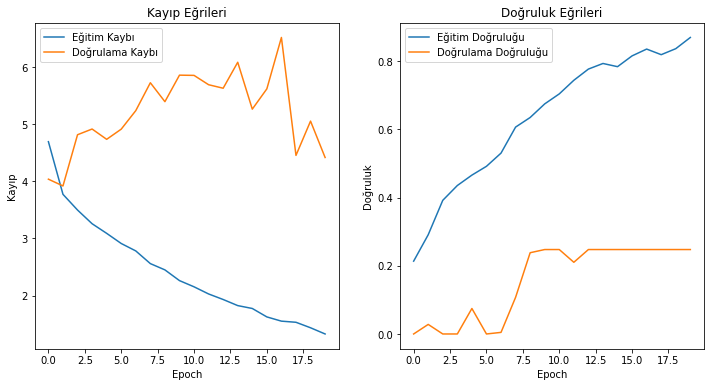

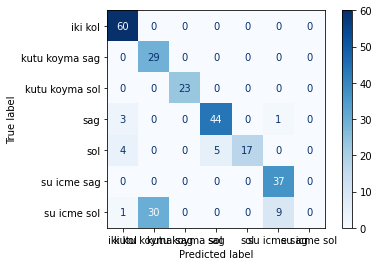

In [43]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Veriyi yükleme fonksiyonu
def load_data_from_folder(folder_path, label):
    data = []
    labels = []
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            frames = []
            for file_name in sorted(os.listdir(subfolder_path)):
                file_path = os.path.join(subfolder_path, file_name)
                img = load_img(file_path, target_size=(64, 64))
                img_array = img_to_array(img)
                frames.append(img_array)
            if len(frames) == 128:  # 128 frame içerdiğinden emin ol
                data.append(np.array(frames))
                labels.append(label)
            else:
                print(f"Folder {subfolder} does not contain 128 frames.")
    return np.array(data), np.array(labels)

# Eğitim ve test verilerini yükle
def load_dataset(train_path, test_path, class_names):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []
    
    for idx, class_name in enumerate(class_names):
        # Eğitim verileri
        train_class_data, train_class_labels = load_data_from_folder(
            os.path.join(train_path, class_name), idx)
        train_data.append(train_class_data)
        train_labels.append(train_class_labels)

        # Test verileri
        test_class_data, test_class_labels = load_data_from_folder(
            os.path.join(test_path, class_name), idx)
        test_data.append(test_class_data)
        test_labels.append(test_class_labels)

    # Tüm veriyi birleştir
    train_data = np.concatenate(train_data, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)
    
    return train_data, train_labels, test_data, test_labels

# Pathler
train_path = "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik_split_dataset/train"
test_path = "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik_split_dataset/test"

# Sınıf isimleri
class_names = ["iki kol", "kutu koyma sag", "kutu koyma sol", "sag", "sol", "su icme sag", "su icme sol"]

# Verileri yükle
train_data, train_labels, test_data, test_labels = load_dataset(train_path, test_path, class_names)

# Etiketleri one-hot encoding formatına dönüştür
train_labels_encoded = tf.keras.utils.to_categorical(train_labels, num_classes=7)
test_labels_encoded = tf.keras.utils.to_categorical(test_labels, num_classes=7)

from tensorflow.keras.optimizers import Adam

# Yeni model tanımlama
model = Sequential([
    Conv3D(64, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(128, 64, 64, 3)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.4),

    Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.4),

    Conv3D(16, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(7, activation='softmax', kernel_regularizer=l2(0.01))
])

# Öğrenme hızını daha hassas ayarlayarak optimize etme
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Modeli derleme
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model özeti
model.summary()

# Modeli eğitme
history = model.fit(
    train_data, 
    train_labels_encoded, 
    epochs=20,  # Epoch sayısını artırdık
    validation_split=0.2,
    batch_size=4,  # Batch size'ı biraz artırdık
    shuffle=True
)

# Modeli değerlendirme
test_loss, test_acc = model.evaluate(test_data, test_labels_encoded)
print(f"Test accuracy: {test_acc}")

# Kayıp ve doğruluk eğrilerini çizme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()

# Karışıklık matrisi hesaplama ve çizme
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_labels

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
#Ezberlemeyi azaltabilmek için

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_56 (Conv3D)           (None, 126, 62, 62, 64)   5248      
_________________________________________________________________
batch_normalization_56 (Batc (None, 126, 62, 62, 64)   256       
_________________________________________________________________
max_pooling3d_56 (MaxPooling (None, 63, 31, 31, 64)    0         
_________________________________________________________________
dropout_73 (Dropout)         (None, 63, 31, 31, 64)    0         
_________________________________________________________________
conv3d_57 (Conv3D)           (None, 61, 29, 29, 32)    55328     
_________________________________________________________________
batch_normalization_57 (Batc (None, 61, 29, 29, 32)    128       
_________________________________________________________________
max_pooling3d_57 (MaxPooling (None, 30, 14, 14, 32)  

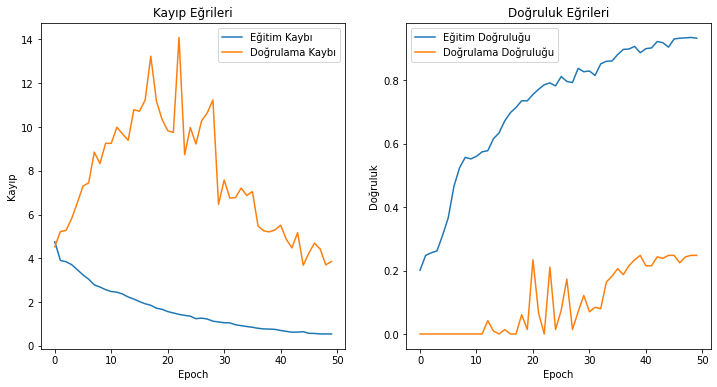

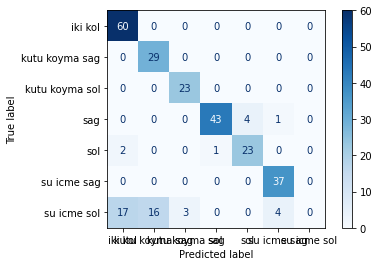

In [57]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2, l1
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Veriyi yükleme fonksiyonu
def load_data_from_folder(folder_path, label):
    data = []
    labels = []
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            frames = []
            for file_name in sorted(os.listdir(subfolder_path)):
                file_path = os.path.join(subfolder_path, file_name)
                img = load_img(file_path, target_size=(64, 64))
                img_array = img_to_array(img)
                frames.append(img_array)
            if len(frames) == 128:  # 128 frame içerdiğinden emin ol
                data.append(np.array(frames))
                labels.append(label)
            else:
                print(f"Folder {subfolder} does not contain 128 frames.")
    return np.array(data), np.array(labels)

# Eğitim ve test verilerini yükle
def load_dataset(train_path, test_path, class_names):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []
    
    for idx, class_name in enumerate(class_names):
        # Eğitim verileri
        train_class_data, train_class_labels = load_data_from_folder(
            os.path.join(train_path, class_name), idx)
        train_data.append(train_class_data)
        train_labels.append(train_class_labels)

        # Test verileri
        test_class_data, test_class_labels = load_data_from_folder(
            os.path.join(test_path, class_name), idx)
        test_data.append(test_class_data)
        test_labels.append(test_class_labels)

    # Tüm veriyi birleştir
    train_data = np.concatenate(train_data, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)
    
    return train_data, train_labels, test_data, test_labels

# Pathler
train_path = "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik_split_dataset/train"
test_path = "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik_split_dataset/test"

# Sınıf isimleri
class_names = ["iki kol", "kutu koyma sag", "kutu koyma sol", "sag", "sol", "su icme sag", "su icme sol"]

# Verileri yükle
train_data, train_labels, test_data, test_labels = load_dataset(train_path, test_path, class_names)

# Etiketleri one-hot encoding formatına dönüştür
train_labels_encoded = tf.keras.utils.to_categorical(train_labels, num_classes=7)
test_labels_encoded = tf.keras.utils.to_categorical(test_labels, num_classes=7)

# Veri artırma (Data Augmentation)
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Yeni model tanımlama
model = Sequential([
    Conv3D(64, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(128, 64, 64, 3)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.5),

    Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.5),

    Conv3D(16, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.6),
    Dense(7, activation='softmax', kernel_regularizer=l2(0.01))
])

# Öğrenme hızını daha hassas ayarlayarak optimize etme
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Modeli derleme
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model özeti
model.summary()

# Erken durdurma (Early Stopping)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Modeli eğitme
history = model.fit(
    train_data,  # Girdi verinizi doğrudan kullanıyoruz
    train_labels_encoded,  # Etiketleri doğrudan kullanıyoruz
    batch_size=4,  # Uygun batch_size seçimi
    epochs=50,  # Epoch sayısını artırdık
    validation_split=0.2,  # Verinin %20'sini validasyon için ayırıyoruz
    shuffle=True  # Veriyi karıştırarak eğitim yapıyoruz
)


# Modeli değerlendirme
test_loss, test_acc = model.evaluate(test_data, test_labels_encoded)
print(f"Test accuracy: {test_acc}")

# Kayıp ve doğruluk eğrilerini çizme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()

# Karışıklık matrisi hesaplama ve çizme
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels_encoded, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_18 (Conv3D)           (None, 126, 62, 62, 64)   5248      
_________________________________________________________________
batch_normalization_18 (Batc (None, 126, 62, 62, 64)   256       
_________________________________________________________________
max_pooling3d_18 (MaxPooling (None, 63, 31, 31, 64)    0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 63, 31, 31, 64)    0         
_________________________________________________________________
conv3d_19 (Conv3D)           (None, 61, 29, 29, 32)    55328     
_________________________________________________________________
batch_normalization_19 (Batc (None, 61, 29, 29, 32)    128       
_________________________________________________________________
max_pooling3d_19 (MaxPooling (None, 30, 14, 14, 32)   

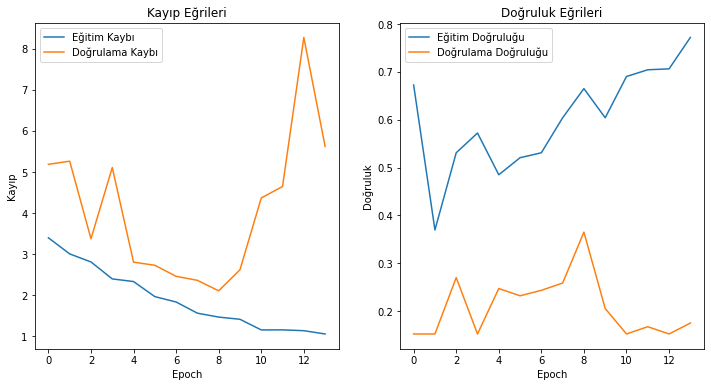

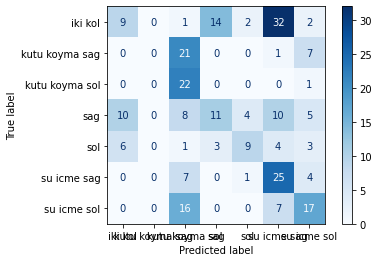

In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Data Generator
def data_generator(folder_path, class_names, batch_size):
    while True:
        for class_idx, class_name in enumerate(class_names):
            class_folder_path = os.path.join(folder_path, class_name)
            for subfolder in os.listdir(class_folder_path):
                subfolder_path = os.path.join(class_folder_path, subfolder)
                if os.path.isdir(subfolder_path):
                    frames = []
                    for file_name in sorted(os.listdir(subfolder_path)):
                        file_path = os.path.join(subfolder_path, file_name)
                        img = load_img(file_path, target_size=(64, 64))
                        img_array = img_to_array(img)
                        frames.append(img_array)
                    if len(frames) == 128:
                        frames = np.array(frames)
                        label = tf.keras.utils.to_categorical(class_idx, num_classes=len(class_names))
                        yield np.expand_dims(frames, axis=0), np.expand_dims(label, axis=0)
                        
batch_size = 1

# Model definition
model = Sequential([
    Conv3D(64, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(128, 64, 64, 3)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.5),

    Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.5),

    Conv3D(16, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.6),
    Dense(7, activation='softmax', kernel_regularizer=l2(0.01))
])

# Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compile model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Paths
train_path = "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik_split_dataset/train"
test_path = "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik_split_dataset/test"

# Class names
class_names = ["iki kol", "kutu koyma sag", "kutu koyma sol", "sag", "sol", "su icme sag", "su icme sol"]

# Training generator
train_generator = data_generator(train_path, class_names, batch_size)
test_generator = data_generator(test_path, class_names, batch_size)

# Calculate steps per epoch and validation steps
train_steps_per_epoch = sum([len(os.listdir(os.path.join(train_path, class_name))) for class_name in class_names])
test_steps = sum([len(os.listdir(os.path.join(test_path, class_name))) for class_name in class_names])

# Model training
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=50,
    validation_data=test_generator,
    validation_steps=test_steps,
    callbacks=[early_stopping]
)

# Evaluate model
test_loss, test_acc = model.evaluate(test_generator, steps=test_steps)
print(f"Test accuracy: {test_acc}")

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()

# Confusion matrix
y_pred = model.predict(test_generator, steps=test_steps)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.concatenate([np.argmax(next(test_generator)[1], axis=1) for _ in range(test_steps)])

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
#iki kol bir gerisini tek olarak alınca neler olacak?

In [ ]:
# 3 sınıf denemesi.. Birleştirerek yaptık. (sağ ve sol Kutu --> KUTU olarak etiketlendi)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


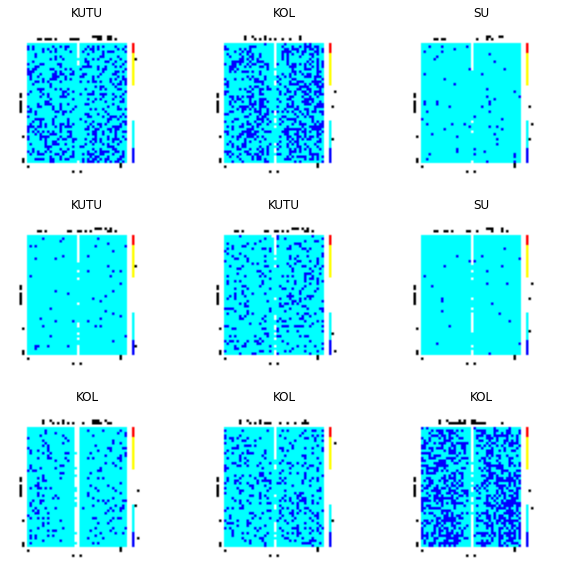

Epoch 1/30
41/41 [==============================] - 5s 94ms/step - loss: 6.9319 - accuracy: 0.5000 - val_loss: 13.1671 - val_accuracy: 0.0000e+00
Epoch 2/30
41/41 [==============================] - 3s 79ms/step - loss: 5.1560 - accuracy: 0.6914 - val_loss: 5.2122 - val_accuracy: 0.0000e+00
Epoch 3/30
41/41 [==============================] - 3s 85ms/step - loss: 4.8560 - accuracy: 0.6481 - val_loss: 4.6042 - val_accuracy: 0.7805
Epoch 4/30
41/41 [==============================] - 4s 86ms/step - loss: 4.4675 - accuracy: 0.7284 - val_loss: 4.5803 - val_accuracy: 0.0000e+00
Epoch 5/30
41/41 [==============================] - 4s 86ms/step - loss: 4.3115 - accuracy: 0.6975 - val_loss: 4.2127 - val_accuracy: 0.7805
Epoch 6/30
41/41 [==============================] - 4s 87ms/step - loss: 4.1327 - accuracy: 0.7840 - val_loss: 4.2098 - val_accuracy: 0.6341
Epoch 7/30
41/41 [==============================] - 3s 86ms/step - loss: 4.2386 - accuracy: 0.7469 - val_loss: 4.8002 - val_accuracy: 0.0488


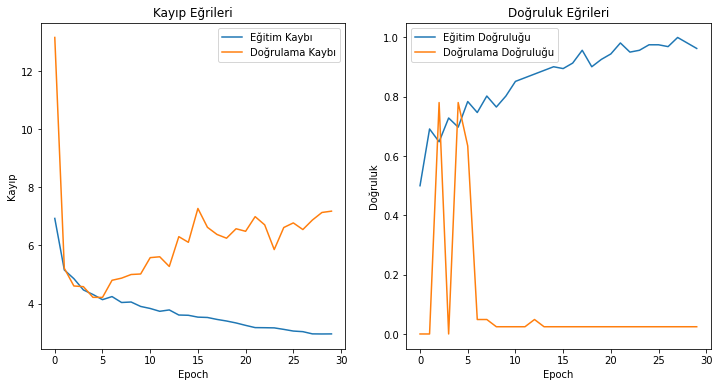

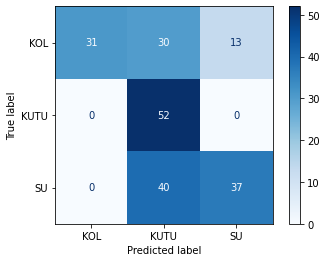

In [46]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Veriyi yükleme fonksiyonu
def load_data_from_folders(folder_paths, label):
    data = []
    labels = []
    for folder_path in folder_paths:
        for subfolder in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder)
            if os.path.isdir(subfolder_path):
                frames = []
                for file_name in sorted(os.listdir(subfolder_path)):
                    file_path = os.path.join(subfolder_path, file_name)
                    img = load_img(file_path, target_size=(64, 64))
                    img_array = img_to_array(img)
                    frames.append(img_array)
                if len(frames) == 128:  # 128 frame içerdiğinden emin ol
                    data.append(np.array(frames))
                    labels.append(label)
                else:
                    print(f"Folder {subfolder} does not contain 128 frames.")
    return np.array(data), np.array(labels)

# Eğitim ve test verilerini yükle
def load_dataset(class_paths):
    data = []
    labels = []
    
    for idx, (class_name, paths) in enumerate(class_paths.items()):
        class_data, class_labels = load_data_from_folders(paths, idx)
        data.append(class_data)
        labels.append(class_labels)
    
    data = np.concatenate(data, axis=0)
    labels = np.concatenate(labels, axis=0)
    
    return data, labels

# Pathler ve sınıflar
class_paths = {
    "KOL": [
        "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik_split_dataset/test/sag",
        "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik_split_dataset/test/sol"
    ],
    "KUTU": [
        "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik_split_dataset/test/kutu koyma sag",
        "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik_split_dataset/test/kutu koyma sol"
    ],
    "SU": [
        "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik_split_dataset/test/su icme sag",
        "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik_split_dataset/test/su icme sol"
    ]
}
import matplotlib.pyplot as plt

def visualize_data(data, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        index = np.random.randint(0, data.shape[0])
        plt.subplot(3, 3, i + 1)
        plt.imshow(data[index][0])  # İlk frame'i göster
        plt.title(class_names[labels[index]])
        plt.axis('off')
    plt.show()

# Sınıf isimleri
class_names = ["KOL", "KUTU", "SU"]

visualize_data(data, labels, class_names)

# Verileri yükle
data, labels = load_dataset(class_paths)

# Etiketleri one-hot encoding formatına dönüştür
labels_encoded = tf.keras.utils.to_categorical(labels, num_classes=3)

model = Sequential([
    Conv3D(128, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(128, 64, 64, 3)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.5),

    Conv3D(64, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.5),

    Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(3, activation='softmax', kernel_regularizer=l2(0.01))
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli tekrar eğitip performansı kontrol edelim
history = model.fit(
    data, 
    labels_encoded, 
    epochs=30,
    validation_split=0.2,
    batch_size=4,
    shuffle=True
)


# Eğitim ve doğrulama sonuçlarını çizdirme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()

y_pred = model.predict(data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = labels

# Karışıklık matrisi hesaplama ve çizdirme
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["KOL", "KUTU", "SU"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
#Overfitting i engellemek için deneme yapıyorum.
#dropout oranlarını %50’den %60 ve %70’e çıkardım.Data Augmentation işlemleri genişletildi (daha büyük bir dönüş ve kaydırma aralığı eklendi).
# Öğrenme oranını daha küçük 0.00005’e düşürdüm.
#Erken durdurma callback’i ile modelin doğrulama kaybı iyileşmediğinde eğitimi durduracak şekilde ayarlandı.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


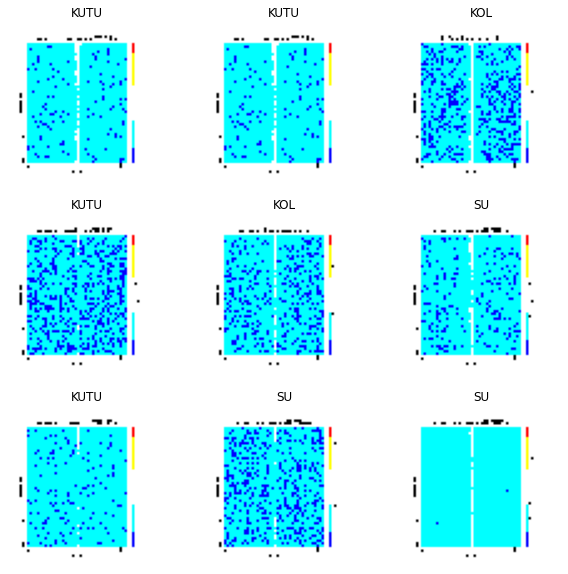

Epoch 1/50
41/41 [==============================] - 3s 61ms/step - loss: 3.2082 - accuracy: 0.3457 - val_loss: 2.9275 - val_accuracy: 0.0000e+00
Epoch 2/50
41/41 [==============================] - 2s 52ms/step - loss: 2.4058 - accuracy: 0.4012 - val_loss: 3.0403 - val_accuracy: 0.0000e+00
Epoch 3/50
41/41 [==============================] - 2s 51ms/step - loss: 2.1174 - accuracy: 0.4815 - val_loss: 2.0767 - val_accuracy: 0.0000e+00
Epoch 4/50
41/41 [==============================] - 2s 45ms/step - loss: 1.8438 - accuracy: 0.4753 - val_loss: 1.5610 - val_accuracy: 0.1707
Epoch 5/50
41/41 [==============================] - 2s 46ms/step - loss: 1.8481 - accuracy: 0.5000 - val_loss: 1.5398 - val_accuracy: 0.2195
Epoch 6/50
41/41 [==============================] - 2s 45ms/step - loss: 1.5294 - accuracy: 0.4877 - val_loss: 1.1688 - val_accuracy: 0.5366
Epoch 7/50
41/41 [==============================] - 2s 45ms/step - loss: 1.5735 - accuracy: 0.5617 - val_loss: 1.3644 - val_accuracy: 0.2927
E

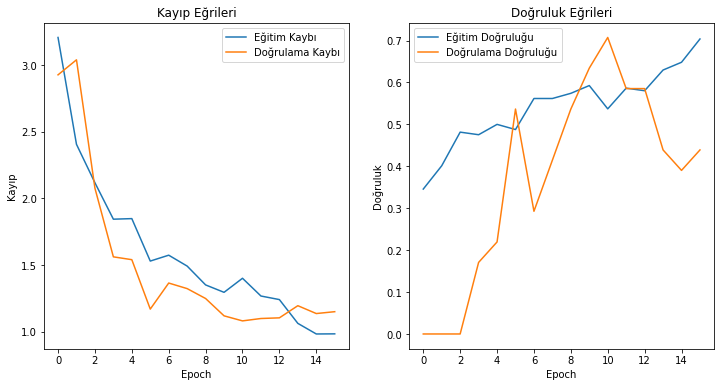

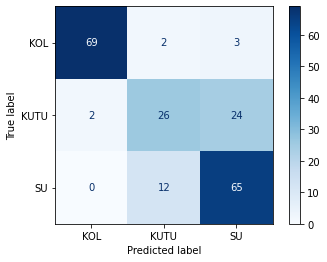

In [58]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Veriyi yükleme fonksiyonu
def load_data_from_folders(folder_paths, label):
    data = []
    labels = []
    for folder_path in folder_paths:
        for subfolder in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder)
            if os.path.isdir(subfolder_path):
                frames = []
                for file_name in sorted(os.listdir(subfolder_path)):
                    file_path = os.path.join(subfolder_path, file_name)
                    img = load_img(file_path, target_size=(64, 64))
                    img_array = img_to_array(img)
                    frames.append(img_array)
                if len(frames) == 128:  # 128 frame içerdiğinden emin ol
                    data.append(np.array(frames))
                    labels.append(label)
                else:
                    print(f"Folder {subfolder} does not contain 128 frames.")
    return np.array(data), np.array(labels)

# Eğitim ve test verilerini yükle
def load_dataset(class_paths):
    data = []
    labels = []
    
    for idx, (class_name, paths) in enumerate(class_paths.items()):
        class_data, class_labels = load_data_from_folders(paths, idx)
        data.append(class_data)
        labels.append(class_labels)
    
    data = np.concatenate(data, axis=0)
    labels = np.concatenate(labels, axis=0)
    
    return data, labels

# Pathler ve sınıflar
class_paths = {
    "KOL": [
        "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik_split_dataset/test/sag",
        "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik_split_dataset/test/sol"
    ],
    "KUTU": [
        "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik_split_dataset/test/kutu koyma sag",
        "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik_split_dataset/test/kutu koyma sol"
    ],
    "SU": [
        "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik_split_dataset/test/su icme sag",
        "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik_split_dataset/test/su icme sol"
    ]
}

# Verileri yükle
data, labels = load_dataset(class_paths)

# Sınıf isimleri
class_names = ["KOL", "KUTU", "SU"]

# Veriyi görselleştirme (İsteğe bağlı)
def visualize_data(data, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        index = np.random.randint(0, data.shape[0])
        plt.subplot(3, 3, i + 1)
        plt.imshow(data[index][0])  # İlk frame'i göster
        plt.title(class_names[labels[index]])
        plt.axis('off')
    plt.show()

visualize_data(data, labels, class_names)

# Etiketleri one-hot encoding formatına dönüştür
labels_encoded = tf.keras.utils.to_categorical(labels, num_classes=3)

# Modeli tanımlama
model = Sequential([
    Conv3D(64, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(128, 64, 64, 3)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.3),

    Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.3),

    Conv3D(16, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(3, activation='softmax', kernel_regularizer=l2(0.001))
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Erken durdurma
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Modeli tekrar eğitip performansı kontrol edelim
history = model.fit(
    data, 
    labels_encoded, 
    epochs=50,
    validation_split=0.2,
    batch_size=4,
    shuffle=True,
    callbacks=[early_stopping]
)

# Eğitim ve doğrulama sonuçlarını çizdirme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()

# Modelin tahminleri ve karışıklık matrisi
y_pred = model.predict(data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = labels

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
#6 sınıf yap su içme solu kaldır

  opt = tf.keras.mixed_precision.LossScaleOptimizer(opt)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 126, 62, 62, 64)   5248      
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 62, 62, 64)   256       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 63, 31, 31, 64)    0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 31, 31, 64)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 61, 29, 29, 32)    55328     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 29, 29, 32)    128       
________________________________________________________________

181/181 [==============================] - 6s 33ms/step - loss: 0.9353 - accuracy: 0.9088 - val_loss: 9.2050 - val_accuracy: 0.0829
Epoch 39/50
181/181 [==============================] - 6s 33ms/step - loss: 0.9135 - accuracy: 0.9102 - val_loss: 6.8492 - val_accuracy: 0.1436
Epoch 40/50
181/181 [==============================] - 6s 33ms/step - loss: 0.8288 - accuracy: 0.9282 - val_loss: 7.0221 - val_accuracy: 0.0829
Epoch 41/50
181/181 [==============================] - 6s 33ms/step - loss: 0.8374 - accuracy: 0.9130 - val_loss: 6.4345 - val_accuracy: 0.0773
Epoch 42/50
181/181 [==============================] - 6s 33ms/step - loss: 0.8705 - accuracy: 0.9006 - val_loss: 5.6148 - val_accuracy: 0.1160
Epoch 43/50
181/181 [==============================] - 6s 33ms/step - loss: 0.7892 - accuracy: 0.9199 - val_loss: 6.6241 - val_accuracy: 0.1326
Epoch 44/50
181/181 [==============================] - 6s 33ms/step - loss: 0.7761 - accuracy: 0.9240 - val_loss: 7.3736 - val_accuracy: 0.1381
Epoc

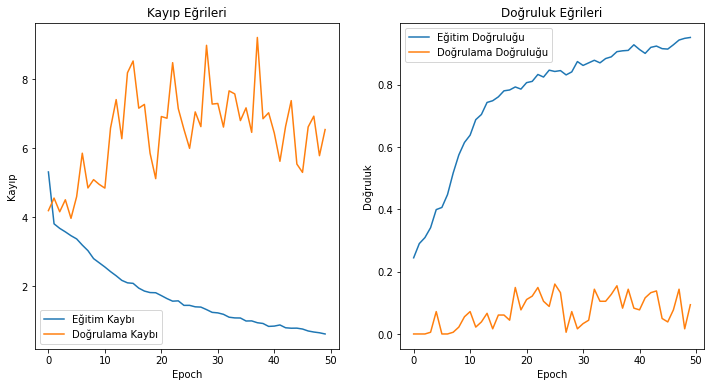

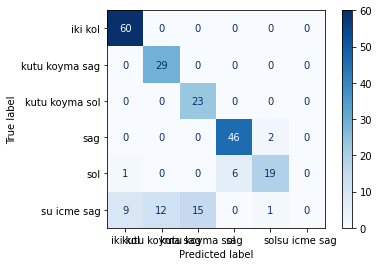

In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Veriyi yükleme fonksiyonu
def load_data_from_folder(folder_path, label):
    data = []
    labels = []
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            frames = []
            for file_name in sorted(os.listdir(subfolder_path)):
                file_path = os.path.join(subfolder_path, file_name)
                img = load_img(file_path, target_size=(64, 64))
                img_array = img_to_array(img)
                frames.append(img_array)
            if len(frames) == 128:  # 128 frame içerdiğinden emin ol
                data.append(np.array(frames))
                labels.append(label)
            else:
                print(f"Folder {subfolder} does not contain 128 frames.")
    return np.array(data), np.array(labels)

# Eğitim ve test verilerini yükle
def load_dataset(train_path, test_path, class_names):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []
    
    for idx, class_name in enumerate(class_names):
        # Eğitim verileri
        train_class_data, train_class_labels = load_data_from_folder(
            os.path.join(train_path, class_name), idx)
        train_data.append(train_class_data)
        train_labels.append(train_class_labels)

        # Test verileri
        test_class_data, test_class_labels = load_data_from_folder(
            os.path.join(test_path, class_name), idx)
        test_data.append(test_class_data)
        test_labels.append(test_class_labels)

    # Tüm veriyi birleştir
    train_data = np.concatenate(train_data, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)
    
    return train_data, train_labels, test_data, test_labels

# Pathler
train_path = "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik_split_dataset/train"
test_path = "C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik_split_dataset/test"

# Sınıf isimleri ("su icme sol" kaldırıldı)
class_names = ["iki kol", "kutu koyma sag", "kutu koyma sol", "sag", "sol", "su icme sag"]

# Verileri yükle
train_data, train_labels, test_data, test_labels = load_dataset(train_path, test_path, class_names)

# Etiketleri one-hot encoding formatına dönüştür (6 sınıf olacak şekilde)
train_labels_encoded = tf.keras.utils.to_categorical(train_labels, num_classes=6)
test_labels_encoded = tf.keras.utils.to_categorical(test_labels, num_classes=6)

# Veri artırma (Data Augmentation)
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# Yeni model tanımlama (6 sınıf için güncellendi)
model = Sequential([
    Conv3D(64, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(128, 64, 64, 3)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.5),

    Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.5),

    Conv3D(16, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.6),
    Dense(6, activation='softmax', kernel_regularizer=l2(0.01))  # Çıkış katmanı 6 sınıfa göre güncellendi
])

# Öğrenme hızını optimize etme
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Modeli derleme
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model özeti
model.summary()

# Erken durdurma (Early Stopping)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Modeli eğitme
history = model.fit(
    train_data,  # Girdi verinizi doğrudan kullanıyoruz
    train_labels_encoded,  # Etiketleri doğrudan kullanıyoruz
    batch_size=4,  # Uygun batch_size seçimi
    epochs=50,  # Epoch sayısını artırdık
    validation_split=0.2,  # Verinin %20'sini validasyon için ayırıyoruz
    shuffle=True  # Veriyi karıştırarak eğitim yapıyoruz
)

# Modeli değerlendirme
test_loss, test_acc = model.evaluate(test_data, test_labels_encoded)
print(f"Test accuracy: {test_acc}")

# Kayıp ve doğruluk eğrilerini çizme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()

# Karışıklık matrisi hesaplama ve çizme
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels_encoded, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [19]:
#5 sınıf için alınan en iyi sonucun modelini kullan. Su yok 
#önce sınıfların eşit veri sayısı için test ve train klasörleri oluşturuyorum. 

In [18]:
import os
import shutil
import random

# Ana klasör yolları
paths = [
    r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\deneme_esit_veri\iki kol",
    r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\deneme_esit_veri\kutu koyma sag",
    r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\deneme_esit_veri\kutu koyma sol",
    r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\deneme_esit_veri\sag",
    r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\deneme_esit_veri\sol"
]

# Hedef klasörler
train_dir = r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train"
test_dir = r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test"

# Train-test ayırma oranı
split_ratio = 0.8

for path in paths:
    # Klasör adı
    class_name = os.path.basename(path)
    
    # Alt klasörleri al
    all_subdirs = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
    
    # Alt klasörleri karıştır
    random.shuffle(all_subdirs)
    
    # Train ve test için ayırma işlemi
    split_index = int(len(all_subdirs) * split_ratio)
    train_subdirs = all_subdirs[:split_index]
    test_subdirs = all_subdirs[split_index:]
    
    # Hedef klasör yolları
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    
    # Hedef klasörleri oluştur
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)
    
    # Train alt klasörlerini taşı
    for subdir in train_subdirs:
        shutil.copytree(os.path.join(path, subdir), os.path.join(train_class_dir, subdir))
    
    # Test alt klasörlerini taşı
    for subdir in test_subdirs:
        shutil.copytree(os.path.join(path, subdir), os.path.join(test_class_dir, subdir))

print("Klasörler başarıyla train ve test olarak ayrıldı.")


Klasörler başarıyla train ve test olarak ayrıldı.


In [ ]:
#5 sınıf için alınan en iyi sonucun modelini kullan (3lü sınıftaki model)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_33 (Conv3D)           (None, 126, 62, 62, 64)   5248      
_________________________________________________________________
batch_normalization_33 (Batc (None, 126, 62, 62, 64)   256       
_________________________________________________________________
max_pooling3d_33 (MaxPooling (None, 63, 31, 31, 64)    0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 63, 31, 31, 64)    0         
_________________________________________________________________
conv3d_34 (Conv3D)           (None, 61, 29, 29, 32)    55328     
_________________________________________________________________
batch_normalization_34 (Batc (None, 61, 29, 29, 32)    128       
_________________________________________________________________
max_pooling3d_34 (MaxPooling (None, 30, 14, 14, 32)   

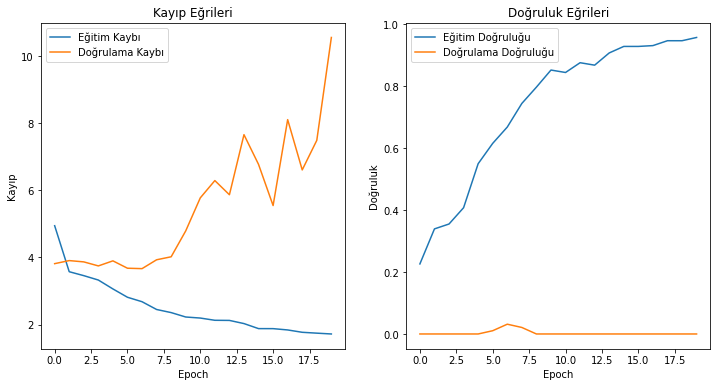

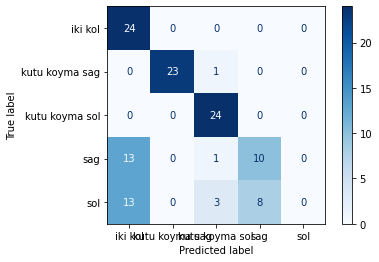

In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Veriyi yükleme fonksiyonu
def load_data_from_folder(folder_path, label):
    data = []
    labels = []
    for subfolder in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.isdir(subfolder_path):
            frames = []
            for file_name in sorted(os.listdir(subfolder_path)):
                file_path = os.path.join(subfolder_path, file_name)
                img = load_img(file_path, target_size=(64, 64))
                img_array = img_to_array(img)
                frames.append(img_array)
            if len(frames) == 128:  # 128 frame içerdiğinden emin ol
                data.append(np.array(frames))
                labels.append(label)
            else:
                print(f"Folder {subfolder} does not contain 128 frames.")
    return np.array(data), np.array(labels)

# Eğitim ve test verilerini yükle
def load_dataset(train_paths, test_paths):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []
    
    # Eğitim verileri yükleme
    for label, train_path in train_paths.items():
        train_class_data, train_class_labels = load_data_from_folder(train_path, label)
        train_data.append(train_class_data)
        train_labels.append(train_class_labels)
    
    # Test verileri yükleme
    for label, test_path in test_paths.items():
        test_class_data, test_class_labels = load_data_from_folder(test_path, label)
        test_data.append(test_class_data)
        test_labels.append(test_class_labels)
    
    # Listeleri birleştirme
    return (np.concatenate(train_data), np.concatenate(train_labels),
            np.concatenate(test_data), np.concatenate(test_labels))

# Pathler ve etiketler
train_paths = {
    0: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\iki kol",
    1: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\kutu koyma sag",
    2: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\kutu koyma sol",
    3: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\sag",
    4: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\sol"
}

test_paths = {
    0: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\iki kol",
    1: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\kutu koyma sag",
    2: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\kutu koyma sol",
    3: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\sag",
    4: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\sol"
}

# Verileri yükle
train_data, train_labels, test_data, test_labels = load_dataset(train_paths, test_paths)

# Etiketleri one-hot encoding formatına dönüştür
train_labels_encoded = tf.keras.utils.to_categorical(train_labels, num_classes=5)
test_labels_encoded = tf.keras.utils.to_categorical(test_labels, num_classes=5)

# Model tanımlama
model = Sequential([
    Conv3D(64, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(128, 64, 64, 3)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.4),

    Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.4),

    Conv3D(16, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(5, activation='softmax', kernel_regularizer=l2(0.01))
])

# Öğrenme hızını optimize etme
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Modeli derleme
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model özeti
model.summary()

# Modeli eğitme
history = model.fit(
    train_data, 
    train_labels_encoded, 
    epochs=20,  
    validation_split=0.2,
    batch_size=4, 
    shuffle=True
)

# Modeli değerlendirme
test_loss, test_acc = model.evaluate(test_data, test_labels_encoded)
print(f"Test accuracy: {test_acc}")

# Kayıp ve doğruluk eğrilerini çizme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()

# Karışıklık matrisi hesaplama ve çizme
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_labels

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["iki kol", "kutu koyma sag", "kutu koyma sol", "sag", "sol"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
#su içme solu tekrar koyuyorum

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_36 (Conv3D)           (None, 126, 62, 62, 64)   5248      
_________________________________________________________________
batch_normalization_36 (Batc (None, 126, 62, 62, 64)   256       
_________________________________________________________________
max_pooling3d_36 (MaxPooling (None, 63, 31, 31, 64)    0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 63, 31, 31, 64)    0         
_________________________________________________________________
conv3d_37 (Conv3D)           (None, 61, 29, 29, 32)    55328     
_________________________________________________________________
batch_normalization_37 (Batc (None, 61, 29, 29, 32)    128       
_________________________________________________________________
max_pooling3d_37 (MaxPooling (None, 30, 14, 14, 32)  

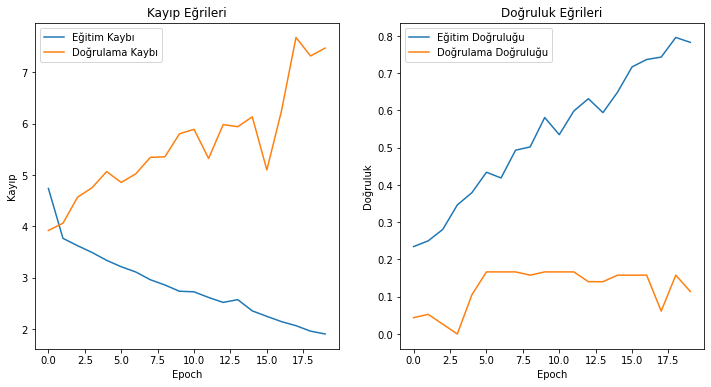

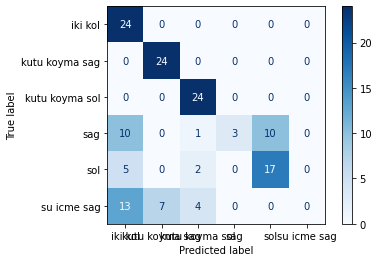

In [11]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Veriyi yükleme fonksiyonu
def load_data_from_paths(paths_dict):
    data = []
    labels = []
    for label, folder_path in paths_dict.items():
        for subfolder in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder)
            if os.path.isdir(subfolder_path):
                frames = []
                for file_name in sorted(os.listdir(subfolder_path)):
                    file_path = os.path.join(subfolder_path, file_name)
                    img = load_img(file_path, target_size=(64, 64))
                    img_array = img_to_array(img)
                    frames.append(img_array)
                if len(frames) == 128:  # 128 frame içerdiğinden emin ol
                    data.append(np.array(frames))
                    labels.append(label)
                else:
                    print(f"Folder {subfolder} does not contain 128 frames.")
    return np.array(data), np.array(labels)

# Pathler ve etiketler
train_paths = {
    0: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\iki kol",
    1: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\kutu koyma sag",
    2: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\kutu koyma sol",
    3: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\sag",
    4: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\sol",
    5: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\su icme sag"
}

test_paths = {
    0: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\iki kol",
    1: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\kutu koyma sag",
    2: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\kutu koyma sol",
    3: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\sag",
    4: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\sol",
    5: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\su icme sag"
}

# Verileri yükle
train_data, train_labels = load_data_from_paths(train_paths)
test_data, test_labels = load_data_from_paths(test_paths)

# Etiketleri one-hot encoding formatına dönüştür
train_labels_encoded = tf.keras.utils.to_categorical(train_labels, num_classes=6)
test_labels_encoded = tf.keras.utils.to_categorical(test_labels, num_classes=6)

from tensorflow.keras.optimizers import Adam

# Yeni model tanımlama
model = Sequential([
    Conv3D(64, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(128, 64, 64, 3)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.4),

    Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.4),

    Conv3D(16, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(6, activation='softmax', kernel_regularizer=l2(0.01))  # 6 sınıf olduğu için
])

# Öğrenme hızını daha hassas ayarlayarak optimize etme
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Modeli derleme
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model özeti
model.summary()

# Modeli eğitme
history = model.fit(
    train_data, 
    train_labels_encoded, 
    epochs=20,  # Epoch sayısını artırdık
    validation_split=0.2,
    batch_size=4,  # Batch size'ı biraz artırdık
    shuffle=True
)

# Modeli değerlendirme
test_loss, test_acc = model.evaluate(test_data, test_labels_encoded)
print(f"Test accuracy: {test_acc}")

# Kayıp ve doğruluk eğrilerini çizme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()

# Karışıklık matrisi hesaplama ve çizme
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_labels

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["iki kol", "kutu koyma sag", "kutu koyma sol", "sag", "sol", "su icme sag"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_39 (Conv3D)           (None, 126, 62, 62, 64)   5248      
_________________________________________________________________
batch_normalization_39 (Batc (None, 126, 62, 62, 64)   256       
_________________________________________________________________
max_pooling3d_39 (MaxPooling (None, 63, 31, 31, 64)    0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 63, 31, 31, 64)    0         
_________________________________________________________________
conv3d_40 (Conv3D)           (None, 61, 29, 29, 32)    55328     
_________________________________________________________________
batch_normalization_40 (Batc (None, 61, 29, 29, 32)    128       
_________________________________________________________________
max_pooling3d_40 (MaxPooling (None, 30, 14, 14, 32)  

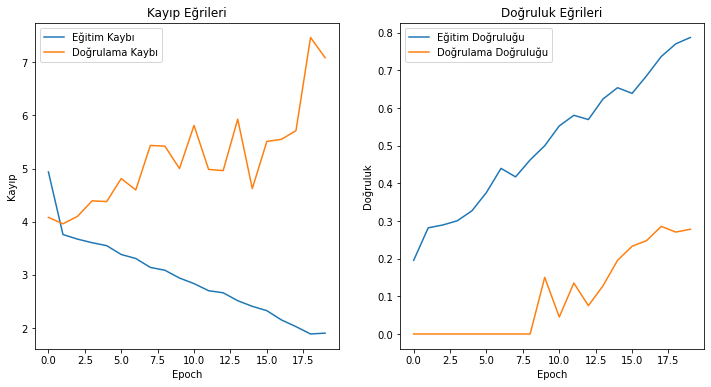

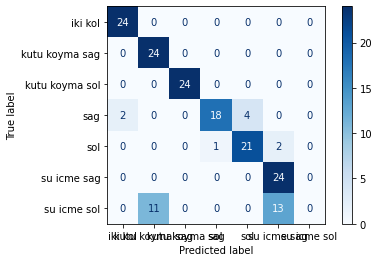

In [12]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Veriyi yükleme fonksiyonu
def load_data_from_paths(paths_dict):
    data = []
    labels = []
    for label, folder_path in paths_dict.items():
        for subfolder in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder)
            if os.path.isdir(subfolder_path):
                frames = []
                for file_name in sorted(os.listdir(subfolder_path)):
                    file_path = os.path.join(subfolder_path, file_name)
                    img = load_img(file_path, target_size=(64, 64))
                    img_array = img_to_array(img)
                    frames.append(img_array)
                if len(frames) == 128:  # 128 frame içerdiğinden emin ol
                    data.append(np.array(frames))
                    labels.append(label)
                else:
                    print(f"Folder {subfolder} does not contain 128 frames.")
    return np.array(data), np.array(labels)

# Pathler ve etiketler
train_paths = {
    0: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\iki kol",
    1: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\kutu koyma sag",
    2: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\kutu koyma sol",
    3: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\sag",
    4: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\sol",
    5: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\su icme sag", 
    6: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\su icme sol"
}

test_paths = {
    0: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\iki kol",
    1: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\kutu koyma sag",
    2: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\kutu koyma sol",
    3: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\sag",
    4: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\sol",
    5: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\su icme sag",
    6: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\su icme sol"
}

# Verileri yükle
train_data, train_labels = load_data_from_paths(train_paths)
test_data, test_labels = load_data_from_paths(test_paths)

# Etiketleri one-hot encoding formatına dönüştür
train_labels_encoded = tf.keras.utils.to_categorical(train_labels, num_classes=7)
test_labels_encoded = tf.keras.utils.to_categorical(test_labels, num_classes=7)

from tensorflow.keras.optimizers import Adam

# Yeni model tanımlama
model = Sequential([
    Conv3D(64, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(128, 64, 64, 3)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.4),

    Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.4),

    Conv3D(16, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(7, activation='softmax', kernel_regularizer=l2(0.01))  # 7 sınıf olduğu için
])

# Öğrenme hızını daha hassas ayarlayarak optimize etme
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Modeli derleme
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model özeti
model.summary()

# Modeli eğitme
history = model.fit(
    train_data, 
    train_labels_encoded, 
    epochs=20,  # Epoch sayısını artırdık
    validation_split=0.2,
    batch_size=4,  # Batch size'ı biraz artırdık
    shuffle=True
)

# Modeli değerlendirme
test_loss, test_acc = model.evaluate(test_data, test_labels_encoded)
print(f"Test accuracy: {test_acc}")

# Kayıp ve doğruluk eğrilerini çizme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()

# Karışıklık matrisi hesaplama ve çizme
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_labels

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["iki kol", "kutu koyma sag", "kutu koyma sol", "sag", "sol", "su icme sag", "su icme sol"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
#Overfitting i engellemek için
#dropout oranı yükselt, early stopping ve L2 kullandım.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 126, 62, 62, 64)   5248      
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 62, 62, 64)   256       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 63, 31, 31, 64)    0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 31, 31, 64)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 61, 29, 29, 32)    55328     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 29, 29, 32)    128       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 30, 14, 14, 32)    0

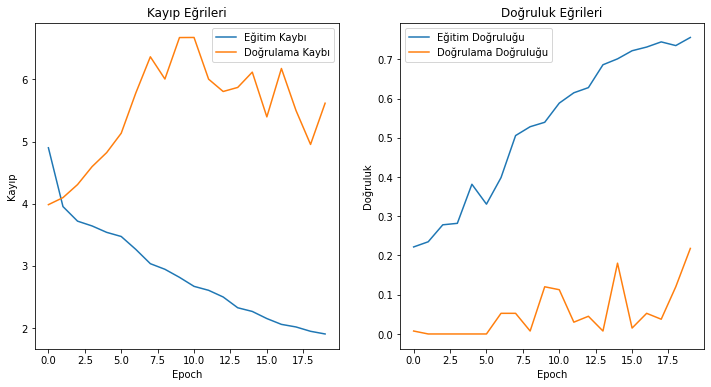

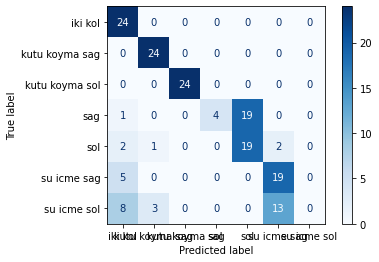

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Veriyi yükleme fonksiyonu
def load_data_from_paths(paths_dict):
    data = []
    labels = []
    for label, folder_path in paths_dict.items():
        for subfolder in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder)
            if os.path.isdir(subfolder_path):
                frames = []
                for file_name in sorted(os.listdir(subfolder_path)):
                    file_path = os.path.join(subfolder_path, file_name)
                    img = load_img(file_path, target_size=(64, 64))
                    img_array = img_to_array(img)
                    frames.append(img_array)
                if len(frames) == 128:  # 128 frame içerdiğinden emin ol
                    data.append(np.array(frames))
                    labels.append(label)
                else:
                    print(f"Folder {subfolder} does not contain 128 frames.")
    return np.array(data), np.array(labels)

# Pathler ve etiketler
train_paths = {
    0: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\iki kol",
    1: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\kutu koyma sag",
    2: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\kutu koyma sol",
    3: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\sag",
    4: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\sol",
    5: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\su icme sag", 
    6: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\train\su icme sol"
}

test_paths = {
    0: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\iki kol",
    1: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\kutu koyma sag",
    2: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\kutu koyma sol",
    3: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\sag",
    4: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\sol",
    5: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\su icme sag",
    6: r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\test\su icme sol"
}

# Verileri yükle
train_data, train_labels = load_data_from_paths(train_paths)
test_data, test_labels = load_data_from_paths(test_paths)

# Etiketleri one-hot encoding formatına dönüştür
train_labels_encoded = tf.keras.utils.to_categorical(train_labels, num_classes=7)
test_labels_encoded = tf.keras.utils.to_categorical(test_labels, num_classes=7)

from tensorflow.keras.optimizers import Adam

# Yeni model tanımlama
model = Sequential([
    Conv3D(64, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(128, 64, 64, 3)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.4),

    Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.4),

    Conv3D(16, (3, 3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(7, activation='softmax', kernel_regularizer=l2(0.01))  # 7 sınıf olduğu için
])

# Öğrenme hızını daha hassas ayarlayarak optimize etme
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Modeli derleme
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model özeti
model.summary()

# Modeli eğitme
history = model.fit(
    train_data, 
    train_labels_encoded, 
    epochs=20,  # Epoch sayısını artırdık
    validation_split=0.2,
    batch_size=4,  # Batch size'ı biraz artırdık
    shuffle=True
)

# Modeli değerlendirme
test_loss, test_acc = model.evaluate(test_data, test_labels_encoded)
print(f"Test accuracy: {test_acc}")

# Kayıp ve doğruluk eğrilerini çizme
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Eğrileri')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()

# Karışıklık matrisi hesaplama ve çizme
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_labels

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["iki kol", "kutu koyma sag", "kutu koyma sol", "sag", "sol", "su icme sag", "su icme sol"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [3]:
# Modeli kaydetme
model_save_path = "sequential_11.h5"  # Dosya adı ve yolu
model.save(model_save_path)
print(f"Model başarıyla kaydedildi: {model_save_path}")


Model başarıyla kaydedildi: sequential_11.h5


In [5]:
# Modeli yükleme
model_load_path = "sequential_11.h5"  # Daha önce kaydedilen modelin yolu
loaded_model = tf.keras.models.load_model(model_load_path)
print("Model başarıyla yüklendi.")


Model başarıyla yüklendi.


In [6]:
# Test verileriyle tahmin yapma
y_pred = loaded_model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# Tahmin edilen sınıfı ekrana yazdırma
for i, pred_class in enumerate(y_pred_classes):
    print(f"{i + 1}. Görüntü için Tahmin Edilen Sınıf: {pred_class}")


1. Görüntü için Tahmin Edilen Sınıf: 0
2. Görüntü için Tahmin Edilen Sınıf: 0
3. Görüntü için Tahmin Edilen Sınıf: 0
4. Görüntü için Tahmin Edilen Sınıf: 0
5. Görüntü için Tahmin Edilen Sınıf: 0
6. Görüntü için Tahmin Edilen Sınıf: 0
7. Görüntü için Tahmin Edilen Sınıf: 0
8. Görüntü için Tahmin Edilen Sınıf: 0
9. Görüntü için Tahmin Edilen Sınıf: 0
10. Görüntü için Tahmin Edilen Sınıf: 0
11. Görüntü için Tahmin Edilen Sınıf: 0
12. Görüntü için Tahmin Edilen Sınıf: 0
13. Görüntü için Tahmin Edilen Sınıf: 0
14. Görüntü için Tahmin Edilen Sınıf: 0
15. Görüntü için Tahmin Edilen Sınıf: 0
16. Görüntü için Tahmin Edilen Sınıf: 0
17. Görüntü için Tahmin Edilen Sınıf: 0
18. Görüntü için Tahmin Edilen Sınıf: 0
19. Görüntü için Tahmin Edilen Sınıf: 0
20. Görüntü için Tahmin Edilen Sınıf: 0
21. Görüntü için Tahmin Edilen Sınıf: 0
22. Görüntü için Tahmin Edilen Sınıf: 0
23. Görüntü için Tahmin Edilen Sınıf: 0
24. Görüntü için Tahmin Edilen Sınıf: 0
25. Görüntü için Tahmin Edilen Sınıf: 1
26. Görün

In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
from tensorflow.keras.models import load_model
import mmwave.dataloader as dataloader
import mmwave.dsp as dsp
import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Model dosyası yolu
model_save_path = "sequential_11.h5"

# Modeli yükle
model = load_model(model_save_path)
print("Model başarıyla yüklendi.")

# Frame oluşturma işlemi
def process_bin_to_images(file_path, output_folder, progress_callback):
    num_tx_antennas = 2
    numChirpsPerFrame = 128
    numFrames = 128
    numRxAntennas = 4
    numADCSamples = 256
    numChannels = 1  # Görsel kanal sayısı, tek kanal için 1

    # Verileri yükle
    print(f"{file_path} dosyasından veriler yükleniyor...")
    adc_data = np.fromfile(file_path, dtype=np.uint16)
    adc_data = adc_data.reshape(numFrames, -1)
    adc_data = np.apply_along_axis(dataloader.DCA1000.organize, 1, adc_data, num_chirps=numChirpsPerFrame, num_rx=numRxAntennas, num_samples=numADCSamples)

    print(f"Data Loaded from {file_path} with shape {adc_data.shape}")

    # Klasörü oluştur
    os.makedirs(output_folder, exist_ok=True)

    # Frame işleme
    print("Frame'ler işleniyor...")
    frames = []
    for i in range(numFrames):
        frame = adc_data[i]
        range_fft_data = np.fft.fft(frame, axis=-1)

        # TX antenlerini ayır
        fft2d_in = dsp.separate_tx(range_fft_data, num_tx_antennas, vx_axis=1, axis=0)
        fft2d_in = np.transpose(fft2d_in, axes=(2, 1, 0))

        # FFT hesapla
        fft2d_out = np.fft.fft(fft2d_in)

        # FFT'nin logaritmik mutlak değeri
        fft2d_log_abs = 40 * np.log10(np.abs(fft2d_out) + 1e-10)

        # Görselleştirme için radar det matrix'i oluştur
        det_matrix = np.sum(fft2d_log_abs, axis=1)
        det_matrix_vis = np.fft.fftshift(det_matrix, axes=1)

        # Tek kanal ekle
        frame_img = det_matrix_vis[..., np.newaxis]  # Yeni eksen ekle
        frames.append(frame_img)

        # Görseli kaydet
        plt.figure(figsize=(10, 5))
        plt.imshow(frame_img.squeeze(), aspect='auto', cmap='jet')
        plt.title(f"Frame {i + 1}")
        plt.colorbar(label='Amplitude (dBFS)')
        plt.xlabel('Range-fft')
        plt.ylabel('Doppler-fft')
        plt.savefig(os.path.join(output_folder, f'Frame_{i + 1}.png'))
        plt.close()

        # İlerleme durumunu göster
        progress_callback(i + 1, numFrames)

    print("Frame'ler başarıyla oluşturuldu.")
    return np.array(frames)

# Tahmin fonksiyonu
def tahmin_et(output_folder):
    print("Tahmin süreci başlatılıyor...")

    # Görselleri yükle
    img_paths = glob.glob(os.path.join(output_folder, '*.png'))
    frames = []
    
    for img_path in sorted(img_paths):
        img = load_img(img_path, color_mode='grayscale', target_size=(128, 256))
        img_array = img_to_array(img) / 255.0
        frames.append(img_array)
    
    frames = np.array(frames)
    print(f"Loaded frames shape: {frames.shape}")

    # Genişliği 256'dan 64'e indir (downsample)
    print("Frames downsample işlemi yapılıyor...")
    frames_downsampled = frames[:, :, :64, :]

    # Grayscale'i 3 kanala genişlet
    frames_downsampled = np.repeat(frames_downsampled, 3, axis=-1)

    # Son boyutları kontrol et
    print(f"Frames shape after downsampling: {frames_downsampled.shape}")

    # Boyutları kontrol etmeden reshape etmeyin
    if frames_downsampled.shape[0] == 128 and frames_downsampled.shape[1] == 128 and frames_downsampled.shape[2] == 64 and frames_downsampled.shape[3] == 3:
        frames_reshaped = frames_downsampled.reshape((1, 128, 64, 64, 3))  # Batch boyutu 1
        print(f"Frames shape after reshaping: {frames_reshaped.shape}")

        # Modelin tahminini yap
        y_pred = model.predict(frames_reshaped)
        print("Model tahmin işlemi tamamlandı.")
        
        tahmin_edilen_sinif = np.argmax(y_pred, axis=1)
        
        siniflar = ["iki kol", "kutu koyma sag", "kutu koyma sol", "sag", "sol", "su icme sag", "su icme sol"]
        print(f"Tahmin edilen hareket: {siniflar[tahmin_edilen_sinif[0]]}")
    else:
        print("Frames boyutları uyumsuz, tahmin yapılamadı.")

# Dosya seçme işlemi
def dosya_sec():
    print("BIN dosyası seçiliyor...")
    file_path = filedialog.askopenfilename(filetypes=[("BIN files", "*.bin")])
    if not file_path:
        print("Dosya seçimi iptal edildi.")
        return

    output_folder = os.path.join("C:\\Users\\Hp\\Desktop\\Prevla\\Real_time", os.path.basename(file_path).replace('.bin', ''))
    os.makedirs(output_folder, exist_ok=True)
    print(f"Çıktı klasörü oluşturuldu: {output_folder}")

    frames = process_bin_to_images(file_path, output_folder, update_progress)
    tahmin_et(output_folder)

# İlerleme durumunu güncelle
def update_progress(current, total):
    progress_label.config(text=f"{current}/{total} frames oluşturuldu")
    print(f"{current}/{total} frames oluşturuldu")

# GUI yapılandırması
root = tk.Tk()
root.title("Frame ve Tahmin İşlemleri")
root.geometry("800x600")  
root.configure(bg='lightblue')  

select_button = tk.Button(root, text="BIN dosyası seç", command=dosya_sec, bg='orange', font=("Arial", 14))
select_button.pack(pady=20)

progress_label = tk.Label(root, text="Başlangıç...", bg='lightblue', font=("Arial", 12))
progress_label.pack(pady=20)

print("GUI başlatılıyor...")
root.mainloop()


Model başarıyla yüklendi.
GUI başlatılıyor...
BIN dosyası seçiliyor...
Çıktı klasörü oluşturuldu: C:\Users\Hp\Desktop\Prevla\Real_time\ebrar_kutu_koyma_sag_kol20240709_114610
C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi/kutu koyma sag/ebrar_kutu_koyma_sag_kol20240709_114610.bin dosyasından veriler yükleniyor...
Data Loaded from C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi/kutu koyma sag/ebrar_kutu_koyma_sag_kol20240709_114610.bin with shape (128, 128, 4, 256)
Frame'ler işleniyor...
1/128 frames oluşturuldu
2/128 frames oluşturuldu
3/128 frames oluşturuldu
4/128 frames oluşturuldu
5/128 frames oluşturuldu
6/128 frames oluşturuldu
7/128 frames oluşturuldu
8/128 frames oluşturuldu
9/128 frames oluşturuldu
10/128 frames oluşturuldu
11/128 frames oluşturuldu
12/128 frames oluşturuldu
13/128 frames oluşturuldu
14/128 frames oluşturuldu
15/128 frames oluşturuldu
16/128 frames oluşturuldu
17/128 frames oluşturuldu
18/128 frames oluşturuldu
19/128 frames oluşturuldu
20/128 frames oluştu

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Hp\anaconda3\envs\tf_gpu\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-32-a2bff7acd43e>", line 135, in dosya_sec
    tahmin_et(output_folder)
  File "<ipython-input-32-a2bff7acd43e>", line 108, in tahmin_et
    frames_reshaped = frames_downsampled.reshape((1, 128, 64, 64, 3))  # Batch boyutu 1
ValueError: cannot reshape array of size 3145728 into shape (1,128,64,64,3)


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tkinter as tk
from tkinter import filedialog

# Model dosyasını yükle
model_save_path = "sequential_11.h5"  # Model dosya adını buraya yaz
model = load_model(model_save_path)
print("Model başarıyla yüklendi.")

# Veriyi yükleme fonksiyonu
def load_frames_from_folder(folder_path):
    frames = []
    for file_name in sorted(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file_name)
        img = load_img(file_path, target_size=(64, 64))
        img_array = img_to_array(img) / 255.0  # Normalizasyon
        frames.append(img_array)
    
    if len(frames) == 128:  # 128 frame içerdiğinden emin ol
        return np.array(frames)
    else:
        print(f"Klasör {folder_path} 128 frame içermiyor.")
        return None

# Tahmin fonksiyonu
def tahmin_et(folder_path):
    frames = load_frames_from_folder(folder_path)
    
    if frames is not None:
        # Çerçeveleri 5 boyutlu bir diziye dönüştür
        frames_reshaped = frames.reshape((1, 128, 64, 64, 3))  # Batch boyutu 1
        
        # Modelin tahminini yap
        y_pred = model.predict(frames_reshaped)
        tahmin_edilen_sinif = np.argmax(y_pred, axis=1)
        
        siniflar = ["iki kol", "kutu koyma sag", "kutu koyma sol", "sag", "sol", "su icme sag", "su icme sol"]
        print(f"Tahmin edilen hareket: {siniflar[tahmin_edilen_sinif[0]]}")
    else:
        print("Tahmin işlemi yapılamadı.")

# Özel yol ile tahmin yapma
def tahmin_belirtilen_yol():
    folder_path = r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\su icme sag\ebrar_su_icme_sag_kol20240709_121601"
    tahmin_et(folder_path)

# Tahmin işlemini başlat
tahmin_belirtilen_yol()


Model başarıyla yüklendi.
Tahmin edilen hareket: sag


In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tkinter as tk
from tkinter import filedialog

# Model dosyasını yükle
model_save_path = "sequential_11.h5"
model = load_model(model_save_path)
print("Model başarıyla yüklendi.")

# Veriyi yükleme fonksiyonu
def load_frames_from_folder(folder_path):
    frames = []
    for file_name in sorted(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file_name)
        img = load_img(file_path, target_size=(64, 64))
        img_array = img_to_array(img) / 255.0  # Normalizasyon
        frames.append(img_array)
    
    if len(frames) == 128:  # 128 frame içerdiğinden emin ol
        return np.array(frames)
    else:
        print(f"Klasör {folder_path} 128 frame içermiyor.")
        return None

# Tahmin fonksiyonu
def tahmin_et(folder_path):
    frames = load_frames_from_folder(folder_path)
    
    if frames is not None:
        # Çerçeveleri 5 boyutlu bir diziye dönüştür
        frames_reshaped = frames.reshape((1, 128, 64, 64, 3))  # Batch boyutu 1
        
        # Modelin tahminini yap
        y_pred = model.predict(frames_reshaped)
        tahmin_edilen_sinif = np.argmax(y_pred, axis=1)
        
        siniflar = ["iki kol", "kutu koyma sag", "kutu koyma sol", "sag", "sol", "su icme sag", "su icme sol"]
        print(f"Tahmin edilen hareket: {siniflar[tahmin_edilen_sinif[0]]}")
    else:
        print("Tahmin işlemi yapılamadı.")

# Kullanıcının klasörü seçmesine izin verme
def dosya_sec():
    root = tk.Tk()
    root.withdraw()  # Ana pencereyi gizle
    folder_path = filedialog.askdirectory(title="Bir klasör seçin")
    if folder_path:
        tahmin_et(folder_path)

# Tahmin işlemini başlat
dosya_sec()


Model başarıyla yüklendi.
Tahmin edilen hareket: sag


In [ ]:
## Kamera verilerini işin içine sokuyorum.... YAni sadece fotoğraf

In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU başarıyla yapılandırıldı.")
    except RuntimeError as e:
        print(f"GPU yapılandırma hatası: {e}")
else:
    print("GPU bulunamadı.")


GPU başarıyla yapılandırıldı.


In [44]:
import os

radar_path = r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik"
camera_path = r"C:\Users\Hp\Desktop\captured_frames"

print(f"Radar yolu var mı? {os.path.exists(radar_path)}")
print(f"Kamera yolu var mı? {os.path.exists(camera_path)}")


Radar yolu var mı? True
Kamera yolu var mı? True


In [45]:
import os
import numpy as np
import tensorflow as tf

# ------------------------------
# 2. Gerekli Kütüphaneleri İçe Aktar
# ------------------------------
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (Input, Conv3D, Conv2D, MaxPooling3D, 
                                     MaxPooling2D, Flatten, Dense, Dropout, 
                                     BatchNormalization, concatenate)
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# ------------------------------
# 3. Frame Sayısını Düzenleme Fonksiyonu
# ------------------------------
def adjust_frames(frames, target_frames=128):
    """Frame sayısını 128'e indirir veya uzatır."""
    current_len = len(frames)

    if current_len > target_frames:
        indices = np.linspace(0, current_len - 1, target_frames).astype(int)
        return [frames[i] for i in indices]
    elif current_len < target_frames:
        frames += [frames[-1]] * (target_frames - current_len)
    return frames

# ------------------------------
# 4. Veriyi Yükleme Fonksiyonu
# ------------------------------
def load_data(folder_path, target_size=(64, 64), num_frames=128):
    """Veriyi belirtilen klasörden yükler ve 128 frame’e göre ayarlar."""
    data, labels = [], []
    class_labels = {label: idx for idx, label in enumerate(os.listdir(folder_path))}

    for label, idx in class_labels.items():
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            for subfolder in os.listdir(label_path):
                subfolder_path = os.path.join(label_path, subfolder)
                if os.path.isdir(subfolder_path):
                    frames = []
                    for file_name in sorted(os.listdir(subfolder_path)):
                        file_path = os.path.join(subfolder_path, file_name)
                        img = load_img(file_path, target_size=target_size)
                        img_array = img_to_array(img).astype('float32') / 255.0
                        frames.append(img_array)

                    frames = np.array(adjust_frames(frames, target_frames=num_frames))
                    data.append(frames)
                    labels.append(idx)

    return np.array(data, dtype='float32'), np.array(labels)

# ------------------------------
# 5. Model Mimarisi ve Eğitim İşlemi
# ------------------------------
def create_model():
    """Model mimarisini oluşturur."""
    radar_input = Input(shape=(128, 64, 64, 3))
    x = Conv3D(64, (3, 3, 3), activation='relu')(radar_input)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = Dropout(0.3)(x)

    x = Conv3D(32, (3, 3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = Dropout(0.3)(x)

    x = Flatten()(x)

    camera_input = Input(shape=(64, 64, 3))
    y = Conv2D(32, (3, 3), activation='relu')(camera_input)
    y = BatchNormalization()(y)
    y = MaxPooling2D(pool_size=(2, 2))(y)
    y = Dropout(0.3)(y)

    y = Flatten()(y)

    combined = concatenate([x, y])
    z = Dense(64, activation='relu')(combined)
    z = Dropout(0.5)(z)

    radar_output = Dense(7, activation='softmax')(z)
    camera_output = Dense(7, activation='softmax')(z)

    model = Model(inputs=[radar_input, camera_input], outputs=[radar_output, camera_output])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ------------------------------
# 6. Ana Kod Akışı
# ------------------------------
if __name__ == "__main__":
    # Veri yükleme
    radar_data, radar_labels = load_data(r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik")
    camera_data, camera_labels = load_data(r"C:\Users\Hp\Desktop\captured_frames")

    # Train-test ayrımı
    radar_train, radar_test, radar_train_labels, radar_test_labels = train_test_split(
        radar_data, radar_labels, test_size=0.2, stratify=radar_labels, random_state=42
    )
    camera_train, camera_test, camera_train_labels, camera_test_labels = train_test_split(
        camera_data, camera_labels, test_size=0.2, stratify=camera_labels, random_state=42
    )

    # Etiketleri one-hot encode et
    radar_train_labels_encoded = to_categorical(radar_train_labels, num_classes=8)
    radar_test_labels_encoded = to_categorical(radar_test_labels, num_classes=8)

    camera_train_labels_encoded = to_categorical(camera_train_labels, num_classes=7)
    camera_test_labels_encoded = to_categorical(camera_test_labels, num_classes=7)

    # Modeli oluştur ve eğit
    model = create_model()
    model.summary()

    batch_size = 4
    steps_per_epoch = len(radar_train) // batch_size

    history = model.fit(
        [radar_train, camera_train], 
        [radar_train_labels_encoded, camera_train_labels_encoded],
        epochs=20,
        batch_size=batch_size,
        validation_data=([radar_test, camera_test], 
                         [radar_test_labels_encoded, camera_test_labels_encoded])
    )

    # Test ve karışıklık matrisi
    test_loss, test_acc = model.evaluate([radar_test, camera_test], 
                                         [radar_test_labels_encoded, camera_test_labels_encoded])
    print(f"Test accuracy: {test_acc}")

    y_pred = model.predict([radar_test, camera_test])
    y_pred_classes = np.argmax(y_pred[0], axis=1)

    cm = confusion_matrix(np.argmax(radar_test_labels_encoded, axis=1), y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 128, 64, 64, 0                                            
__________________________________________________________________________________________________
conv3d_10 (Conv3D)              (None, 126, 62, 62,  5248        input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 126, 62, 62,  256         conv3d_10[0][0]                  
__________________________________________________________________________________________________
max_pooling3d_10 (MaxPooling3D) (None, 63, 31, 31, 6 0           batch_normalization_15[0][0]     
____________________________________________________________________________________________

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [40]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

if tf.test.is_built_with_cuda():
    print("TensorFlow is built with CUDA support.")
else:
    print("TensorFlow is NOT built with CUDA support.")


TensorFlow version: 2.6.2
Num GPUs Available:  1
TensorFlow is built with CUDA support.


In [42]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [54]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (Input, Conv3D, MaxPooling3D, 
                                     Flatten, Dense, Dropout, 
                                     BatchNormalization)
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# GPU Bellek büyümesini açalım
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

# Frame ayarlama fonksiyonu
def adjust_frames(frames, target_frames=128):
    current_len = len(frames)
    if current_len > target_frames:
        indices = np.linspace(0, current_len - 1, target_frames).astype(int)
        return [frames[i] for i in indices]
    elif current_len < target_frames:
        frames += [frames[-1]] * (target_frames - current_len)
    return frames

# Veri yükleme fonksiyonu
def load_data(folder_path, class_map, target_size=(64, 64), num_frames=128):
    data, labels = [], []
    
    # Klasörleri dolaş ve etiketler ile eşleştir
    for label, idx in class_map.items():
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            for subfolder in os.listdir(label_path):
                subfolder_path = os.path.join(label_path, subfolder)
                if os.path.isdir(subfolder_path):
                    frames = []
                    for file_name in sorted(os.listdir(subfolder_path)):
                        file_path = os.path.join(subfolder_path, file_name)
                        try:
                            img = load_img(file_path, target_size=target_size)
                            img_array = img_to_array(img).astype('float32') / 255.0
                            frames.append(img_array)
                        except Exception as e:
                            print(f"Error loading image {file_path}: {e}")
                    
                    if len(frames) > 0:
                        frames = np.array(adjust_frames(frames, target_frames=num_frames))
                        data.append(frames)
                        labels.append(idx)

    return np.array(data, dtype='float32'), np.array(labels)

# Radar verilerindeki etiketler ve yollar
radar_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5,
    "su icme sol": 6,
    "yurume": 7
}

# Kamera verilerindeki etiketler ve yollar
camera_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5,
    "su icme sol": 6
}

# Model oluşturma fonksiyonu
def create_model(num_classes=8):
    radar_input = Input(shape=(128, 64, 64, 3))
    x = Conv3D(64, (3, 3, 3), activation='relu')(radar_input)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = Dropout(0.3)(x)

    x = Conv3D(32, (3, 3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)

    model = Model(inputs=radar_input, outputs=Dense(num_classes, activation='softmax')(x))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Ana kod akışı
if __name__ == "__main__":
    # Radar verisini yükle
    radar_data, radar_labels = load_data(
        r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik", 
        radar_class_map
    )
    
    # Kamera verisini yükle
    camera_data, camera_labels = load_data(
        r"C:\Users\Hp\Desktop\captured_frames", 
        camera_class_map, num_frames=128  # Kamera için 128 frame belirleniyor
    )

    # Radar verisini eğitim ve test setine ayır
    radar_train, radar_test, radar_train_labels, radar_test_labels = train_test_split(
        radar_data, radar_labels, test_size=0.2, stratify=radar_labels, random_state=42
    )

    # Etiketleri one-hot encode et
    radar_train_labels_encoded = to_categorical(radar_train_labels, num_classes=8)
    radar_test_labels_encoded = to_categorical(radar_test_labels, num_classes=8)

    # Modeli oluştur ve eğit
    model = create_model(num_classes=8)
    model.summary()

    history = model.fit(
    radar_train, radar_train_labels_encoded,
    epochs=20, batch_size=2,  # Batch boyutunu 2'ye düşürüyoruz
    validation_data=(radar_test, radar_test_labels_encoded)
)


    # Test ve karışıklık matrisi
    test_loss, test_acc = model.evaluate(radar_test, radar_test_labels_encoded)
    print(f"Test accuracy: {test_acc}")

    # Tahminlerin yapılması
    y_pred = model.predict(radar_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Karışıklık matrisi
    cm = confusion_matrix(np.argmax(radar_test_labels_encoded, axis=1), y_pred_classes)
    
    # Karışıklık matrisinin çizimi
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()


Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 128, 64, 64, 3)]  0         
_________________________________________________________________
conv3d_16 (Conv3D)           (None, 126, 62, 62, 64)   5248      
_________________________________________________________________
batch_normalization_22 (Batc (None, 126, 62, 62, 64)   256       
_________________________________________________________________
max_pooling3d_16 (MaxPooling (None, 63, 31, 31, 64)    0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 63, 31, 31, 64)    0         
_________________________________________________________________
conv3d_17 (Conv3D)           (None, 61, 29, 29, 32)    55328     
_________________________________________________________________
batch_normalization_23 (Batc (None, 61, 29, 29, 32)    128 

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [47]:
print("Radar Train Labels:", np.unique(radar_train_labels))
print("Radar Test Labels:", np.unique(radar_test_labels))


Radar Train Labels: [0 1 2 3 4 5 6 7]
Radar Test Labels: [0 1 2 3 4 5 6 7]


In [55]:
with tf.device('/CPU:0'):
    test_loss, test_acc = model.evaluate(radar_test, radar_test_labels_encoded)


20/20 [==============================] - 91s 4s/step - loss: 0.2087 - accuracy: 0.9319


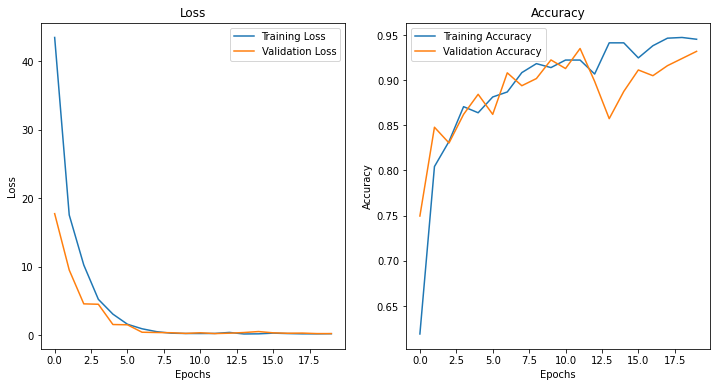

In [57]:
# Kayıp ve doğruluk eğrilerini çizdirme
plt.figure(figsize=(12, 6))

# Eğitim ve doğrulama kaybı (loss) için grafik
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Eğitim ve doğrulama doğruluğu (accuracy) için grafik
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [13]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (Input, Conv3D, MaxPooling3D, 
                                     Flatten, Dense, Dropout, 
                                     BatchNormalization)
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# GPU Bellek büyümesini açalım
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

# Frame ayarlama fonksiyonu
def adjust_frames(frames, target_frames=128):
    current_len = len(frames)
    if current_len > target_frames:
        indices = np.linspace(0, current_len - 1, target_frames).astype(int)
        return [frames[i] for i in indices]
    elif current_len < target_frames:
        frames += [frames[-1]] * (target_frames - current_len)
    return frames

# Veri yükleme fonksiyonu
def load_data(folder_path, class_map, target_size=(64, 64), num_frames=128):
    data, labels = [], []
    
    # Klasörleri dolaş ve etiketler ile eşleştir
    for label, idx in class_map.items():
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            for subfolder in os.listdir(label_path):
                subfolder_path = os.path.join(label_path, subfolder)
                if os.path.isdir(subfolder_path):
                    frames = []
                    for file_name in sorted(os.listdir(subfolder_path)):
                        file_path = os.path.join(subfolder_path, file_name)
                        try:
                            img = load_img(file_path, target_size=target_size)
                            img_array = img_to_array(img).astype('float32') / 255.0
                            frames.append(img_array)
                        except Exception as e:
                            print(f"Error loading image {file_path}: {e}")
                    
                    if len(frames) > 0:
                        frames = np.array(adjust_frames(frames, target_frames=num_frames))
                        data.append(frames)
                        labels.append(idx)

    return np.array(data, dtype='float32'), np.array(labels)

# Radar verilerindeki etiketler ve yollar
radar_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5,
    "su icme sol": 6,
    "yurume": 7
}

# Kamera verilerindeki etiketler ve yollar
camera_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5,
    "su icme sol": 6
}

# Model oluşturma fonksiyonu
def create_model(num_classes=8):
    radar_input = Input(shape=(128, 64, 64, 3))
    x = Conv3D(64, (3, 3, 3), activation='relu')(radar_input)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = Dropout(0.3)(x)

    x = Conv3D(32, (3, 3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)

    model = Model(inputs=radar_input, outputs=Dense(num_classes, activation='softmax')(x))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Ana kod akışı
if __name__ == "__main__":
    # Radar verisini yükle
    radar_data, radar_labels = load_data(
        r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik", 
        radar_class_map
    )
    
    # Kamera verisini yükle
    camera_data, camera_labels = load_data(
        r"C:\Users\Hp\Desktop\captured_frames", 
        camera_class_map, num_frames=128  # Kamera için 128 frame belirleniyor
    )

    # Radar verisini eğitim ve test setine ayır
    radar_train, radar_test, radar_train_labels, radar_test_labels = train_test_split(
        radar_data, radar_labels, test_size=0.2, stratify=radar_labels, random_state=42
    )

    # Etiketleri one-hot encode et
    radar_train_labels_encoded = to_categorical(radar_train_labels, num_classes=8)
    radar_test_labels_encoded = to_categorical(radar_test_labels, num_classes=8)

    # Modeli oluştur ve eğit
    model = create_model(num_classes=8)
    model.summary()

    history = model.fit(
        radar_train, radar_train_labels_encoded,
        epochs=20, batch_size=2,  # Batch boyutunu 2'ye düşürüyoruz
        validation_data=(radar_test, radar_test_labels_encoded)
    )

    # Test ve karışıklık matrisi
    with tf.device('/CPU:0'):
        test_loss, test_acc = model.evaluate(radar_test, radar_test_labels_encoded)
        print(f"Test accuracy: {test_acc}")

        # Tahminlerin yapılması
        y_pred = model.predict(radar_test, batch_size=2)
        y_pred_classes = np.argmax(y_pred, axis=1)

        # Karışıklık matrisi
        cm = confusion_matrix(np.argmax(radar_test_labels_encoded, axis=1), y_pred_classes)
        
        # Karışıklık matrisinin çizimi
        plt.figure(figsize=(10, 8))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(radar_class_map.keys()))
        disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
        plt.title("Confusion Matrix")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Kayıp ve doğruluk grafiklerini çiz
        plt.figure(figsize=(12, 4))
        
        # Kayıp grafiği
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Doğruluk grafiği
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()


IndentationError: expected an indented block (<ipython-input-13-56c417aaa2e6>, line 84)

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9665048186968197623
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22515023872
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15695540355068179303
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:47:00.0, compute capability: 8.9"
]


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 64, 64, 3)]  0         
_________________________________________________________________
conv3d (Conv3D)              (None, 126, 62, 62, 64)   5248      
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 62, 62, 64)   256       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 63, 31, 31, 64)    0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 31, 31, 64)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 61, 29, 29, 32)    55328     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 29, 29, 32)    128   

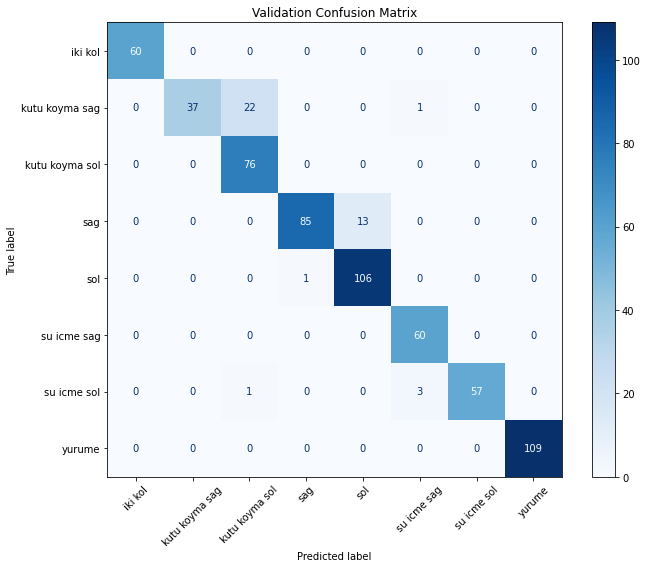

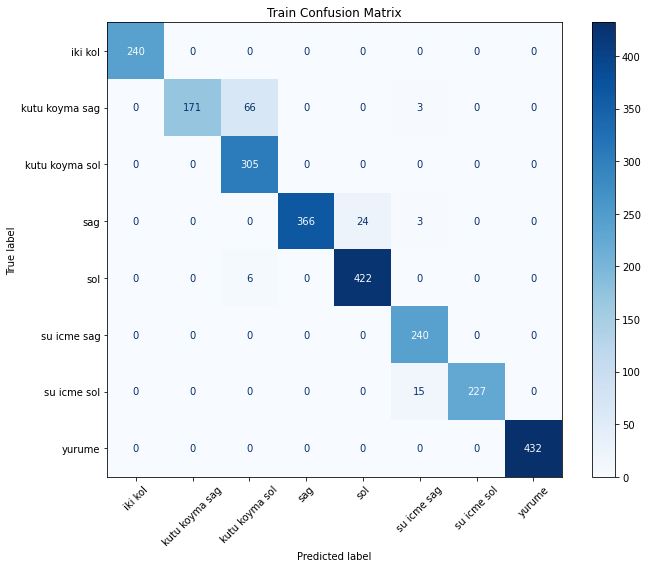

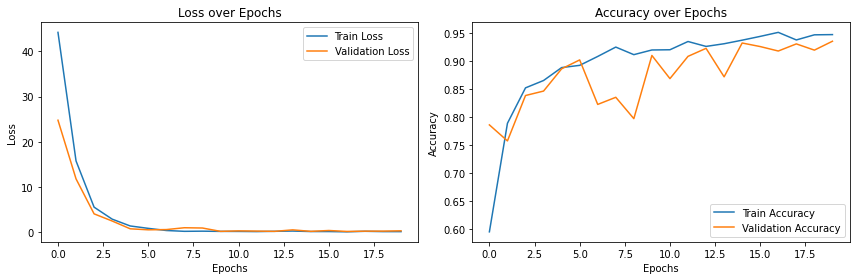

In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (Input, Conv3D, MaxPooling3D, 
                                     Flatten, Dense, Dropout, 
                                     BatchNormalization)
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# GPU Bellek büyümesini açalım
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

# Frame ayarlama fonksiyonu
def adjust_frames(frames, target_frames=128):
    current_len = len(frames)
    if current_len > target_frames:
        indices = np.linspace(0, current_len - 1, target_frames).astype(int)
        return [frames[i] for i in indices]
    elif current_len < target_frames:
        frames += [frames[-1]] * (target_frames - current_len)
    return frames

# Veri yükleme fonksiyonu
def load_data(folder_path, class_map, target_size=(64, 64), num_frames=128):
    data, labels = [], []
    
    # Klasörleri dolaş ve etiketler ile eşleştir
    for label, idx in class_map.items():
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            for subfolder in os.listdir(label_path):
                subfolder_path = os.path.join(label_path, subfolder)
                if os.path.isdir(subfolder_path):
                    frames = []
                    for file_name in sorted(os.listdir(subfolder_path)):
                        file_path = os.path.join(subfolder_path, file_name)
                        try:
                            img = load_img(file_path, target_size=target_size)
                            img_array = img_to_array(img).astype('float32') / 255.0
                            frames.append(img_array)
                        except Exception as e:
                            print(f"Error loading image {file_path}: {e}")
                    
                    if len(frames) > 0:
                        frames = np.array(adjust_frames(frames, target_frames=num_frames))
                        data.append(frames)
                        labels.append(idx)

    return np.array(data, dtype='float32'), np.array(labels)

# Radar verilerindeki etiketler ve yollar
radar_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5,
    "su icme sol": 6,
    "yurume": 7
}

# Kamera verilerindeki etiketler ve yollar
camera_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5,
    "su icme sol": 6
}

# Model oluşturma fonksiyonu
def create_model(num_classes=8):
    radar_input = Input(shape=(128, 64, 64, 3))
    x = Conv3D(64, (3, 3, 3), activation='relu')(radar_input)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = Dropout(0.3)(x)

    x = Conv3D(32, (3, 3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)

    model = Model(inputs=radar_input, outputs=Dense(num_classes, activation='softmax')(x))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Ana kod akışı
if __name__ == "__main__":
    # Radar verisini yükle
    radar_data, radar_labels = load_data(
        r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik", 
        radar_class_map
    )
    
    # Kamera verisini yükle
    camera_data, camera_labels = load_data(
        r"C:\Users\Hp\Desktop\captured_frames", 
        camera_class_map, num_frames=128  # Kamera için 128 frame belirleniyor
    )

    # Radar verisini eğitim ve test setine ayır
    radar_train, radar_test, radar_train_labels, radar_test_labels = train_test_split(
        radar_data, radar_labels, test_size=0.2, stratify=radar_labels, random_state=42
    )

    # Etiketleri one-hot encode et
    radar_train_labels_encoded = to_categorical(radar_train_labels, num_classes=8)
    radar_test_labels_encoded = to_categorical(radar_test_labels, num_classes=8)

    # Modeli oluştur ve eğit
    model = create_model(num_classes=8)
    model.summary()

    history = model.fit(
        radar_train, radar_train_labels_encoded,
        epochs=20, batch_size=2,  # Batch boyutunu 2'ye düşürüyoruz
        validation_data=(radar_test, radar_test_labels_encoded)
    )

    # Test ve karışıklık matrisi
    with tf.device('/CPU:0'):
        test_loss, test_acc = model.evaluate(radar_test, radar_test_labels_encoded)
        print(f"Test accuracy: {test_acc}")

        # Validation seti için tahminlerin yapılması
        y_pred = model.predict(radar_test, batch_size=2)
        y_pred_classes = np.argmax(y_pred, axis=1)

        # Validation confusion matrix
        cm_test = confusion_matrix(np.argmax(radar_test_labels_encoded, axis=1), y_pred_classes)
        
        # Validation confusion matrix'in çizimi
        plt.figure(figsize=(10, 8))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=list(radar_class_map.keys()))
        disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
        plt.title("Validation Confusion Matrix")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Train seti için tahminlerin yapılması
        y_train_pred = model.predict(radar_train, batch_size=2)
        y_train_pred_classes = np.argmax(y_train_pred, axis=1)

        # Train confusion matrix
        cm_train = confusion_matrix(np.argmax(radar_train_labels_encoded, axis=1), y_train_pred_classes)
        
        # Train confusion matrix'in çizimi
        plt.figure(figsize=(10, 8))
        disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=list(radar_class_map.keys()))
        disp_train.plot(cmap=plt.cm.Blues, ax=plt.gca())
        plt.title("Train Confusion Matrix")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Kayıp ve doğruluk grafiklerini çiz
        plt.figure(figsize=(12, 4))
        
        # Kayıp grafiği
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Doğruluk grafiği
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 64, 64, 3)]  0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 126, 62, 62, 64)   5248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 126, 62, 62, 64)   256       
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 63, 31, 31, 64)    0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 63, 31, 31, 64)    0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 61, 29, 29, 32)    55328     
_________________________________________________________________
batch_normalization_3 (Batch (None, 61, 29, 29, 32)    128 

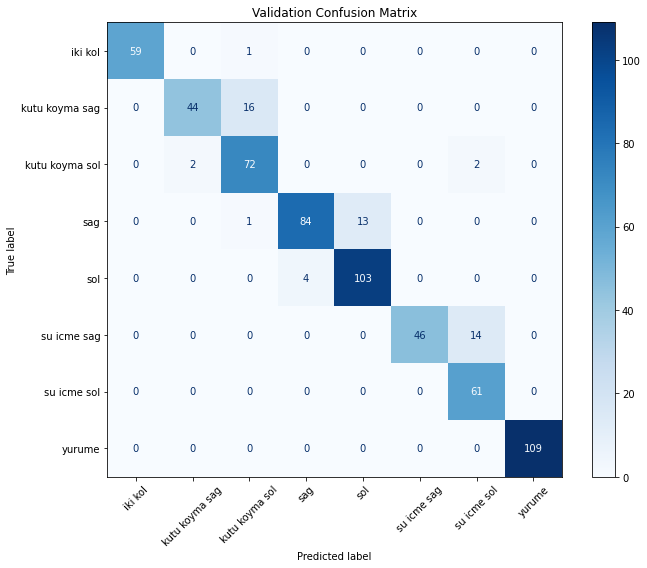

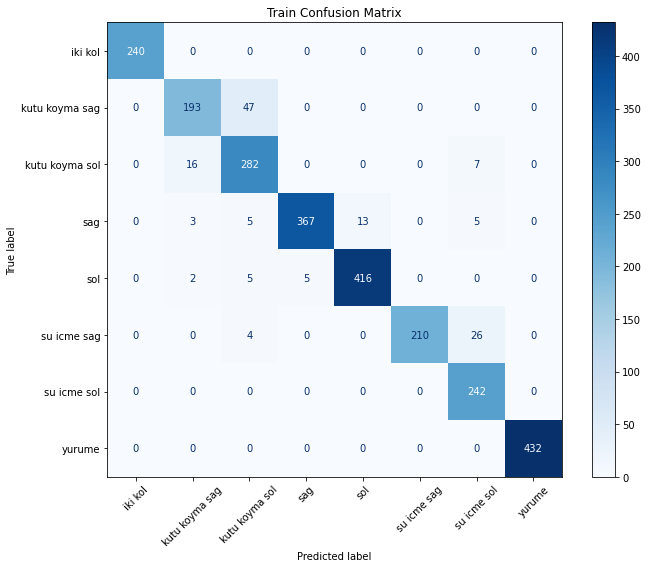

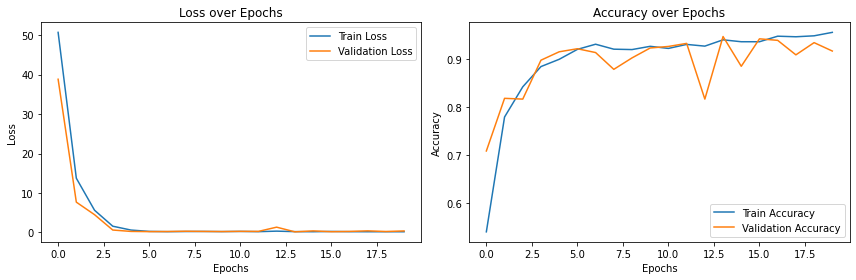

In [8]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (Input, Conv3D, MaxPooling3D, 
                                     Flatten, Dense, Dropout, 
                                     BatchNormalization)
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# GPU Bellek büyümesini açalım
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

# Frame ayarlama fonksiyonu
def adjust_frames(frames, target_frames=128):
    current_len = len(frames)
    if current_len > target_frames:
        indices = np.linspace(0, current_len - 1, target_frames).astype(int)
        return [frames[i] for i in indices]
    elif current_len < target_frames:
        frames += [frames[-1]] * (target_frames - current_len)
    return frames

# Veri yükleme fonksiyonu
def load_data(folder_path, class_map, target_size=(64, 64), num_frames=128):
    data, labels = [], []
    
    # Klasörleri dolaş ve etiketler ile eşleştir
    for label, idx in class_map.items():
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            for subfolder in os.listdir(label_path):
                subfolder_path = os.path.join(label_path, subfolder)
                if os.path.isdir(subfolder_path):
                    frames = []
                    for file_name in sorted(os.listdir(subfolder_path)):
                        file_path = os.path.join(subfolder_path, file_name)
                        try:
                            img = load_img(file_path, target_size=target_size)
                            img_array = img_to_array(img).astype('float32') / 255.0
                            frames.append(img_array)
                        except Exception as e:
                            print(f"Error loading image {file_path}: {e}")
                    
                    if len(frames) > 0:
                        frames = np.array(adjust_frames(frames, target_frames=num_frames))
                        data.append(frames)
                        labels.append(idx)

    return np.array(data, dtype='float32'), np.array(labels)

# Radar verilerindeki etiketler ve yollar
radar_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5,
    "su icme sol": 6,
    "yurume": 7
}

# Kamera verilerindeki etiketler ve yollar
camera_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5,
    "su icme sol": 6
}

# Model oluşturma fonksiyonu
def create_model(num_classes=8):
    radar_input = Input(shape=(128, 64, 64, 3))
    x = Conv3D(64, (3, 3, 3), activation='relu')(radar_input)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = Dropout(0.3)(x)

    x = Conv3D(32, (3, 3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)

    model = Model(inputs=radar_input, outputs=Dense(num_classes, activation='softmax')(x))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Ana kod akışı
if __name__ == "__main__":
    # Radar verisini yükle
    radar_data, radar_labels = load_data(
        r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik", 
        radar_class_map
    )
    
    # Kamera verisini yükle
    camera_data, camera_labels = load_data(
        r"C:\Users\Hp\Desktop\captured_frames", 
        camera_class_map, num_frames=128  # Kamera için 128 frame belirleniyor
    )

    # Radar verisini eğitim ve test setine ayır
    radar_train, radar_test, radar_train_labels, radar_test_labels = train_test_split(
        radar_data, radar_labels, test_size=0.2, stratify=radar_labels, random_state=42
    )

    # Etiketleri one-hot encode et
    radar_train_labels_encoded = to_categorical(radar_train_labels, num_classes=8)
    radar_test_labels_encoded = to_categorical(radar_test_labels, num_classes=8)

    # Modeli oluştur ve eğit
    model = create_model(num_classes=8)
    model.summary()

    history = model.fit(
        radar_train, radar_train_labels_encoded,
        epochs=20, batch_size=2,  # Batch boyutunu 2'ye düşürüyoruz
        validation_data=(radar_test, radar_test_labels_encoded)
    )

    # Test ve karışıklık matrisi
    with tf.device('/CPU:0'):
        test_loss, test_acc = model.evaluate(radar_test, radar_test_labels_encoded)
        print(f"Test accuracy: {test_acc}")

        # Validation seti için tahminlerin yapılması
        y_pred = model.predict(radar_test, batch_size=2)
        y_pred_classes = np.argmax(y_pred, axis=1)

        # Validation confusion matrix
        cm_test = confusion_matrix(np.argmax(radar_test_labels_encoded, axis=1), y_pred_classes)
        
        # Validation confusion matrix'in çizimi
        plt.figure(figsize=(10, 8))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=list(radar_class_map.keys()))
        disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
        plt.title("Validation Confusion Matrix")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Train seti için tahminlerin yapılması
        y_train_pred = model.predict(radar_train, batch_size=2)
        y_train_pred_classes = np.argmax(y_train_pred, axis=1)

        # Train confusion matrix
        cm_train = confusion_matrix(np.argmax(radar_train_labels_encoded, axis=1), y_train_pred_classes)
        
        # Train confusion matrix'in çizimi
        plt.figure(figsize=(10, 8))
        disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=list(radar_class_map.keys()))
        disp_train.plot(cmap=plt.cm.Blues, ax=plt.gca())
        plt.title("Train Confusion Matrix")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Kayıp ve doğruluk grafiklerini çiz
        plt.figure(figsize=(12, 4))
        
        # Kayıp grafiği
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Loss over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Doğruluk grafiği
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Accuracy over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 64, 64, 3)]  0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 126, 62, 62, 64)   5248      
_________________________________________________________________
batch_normalization_4 (Batch (None, 126, 62, 62, 64)   256       
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 63, 31, 31, 64)    0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 31, 31, 64)    0         
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 61, 29, 29, 32)    55328     
_________________________________________________________________
batch_normalization_5 (Batch (None, 61, 29, 29, 32)    128 

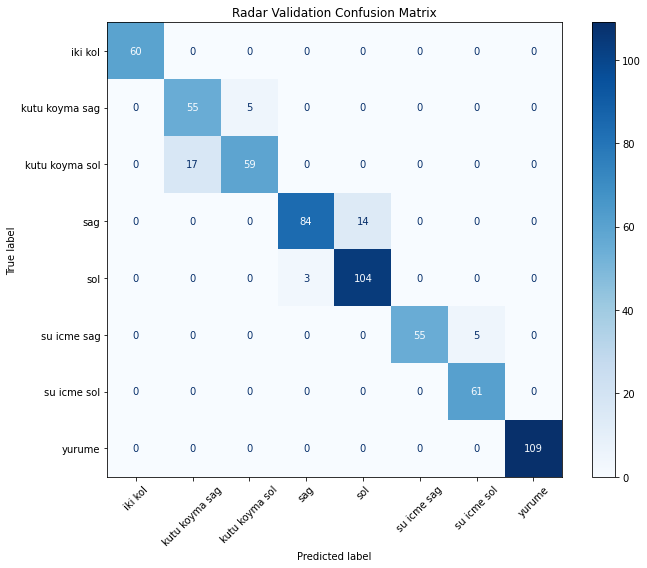

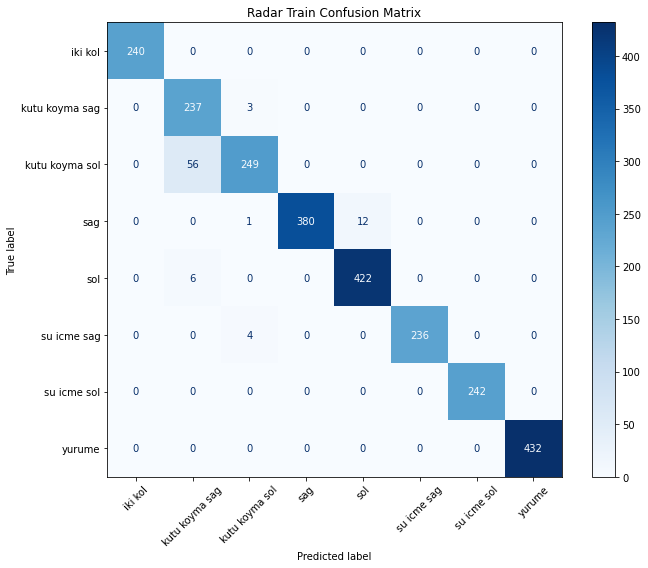

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 64, 64, 3)]  0         
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 126, 62, 62, 64)   5248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 126, 62, 62, 64)   256       
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 63, 31, 31, 64)    0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 63, 31, 31, 64)    0         
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 61, 29, 29, 32)    55328     
_________________________________________________________________
batch_normalization_7 (Batch (None, 61, 29, 29, 32)    128 

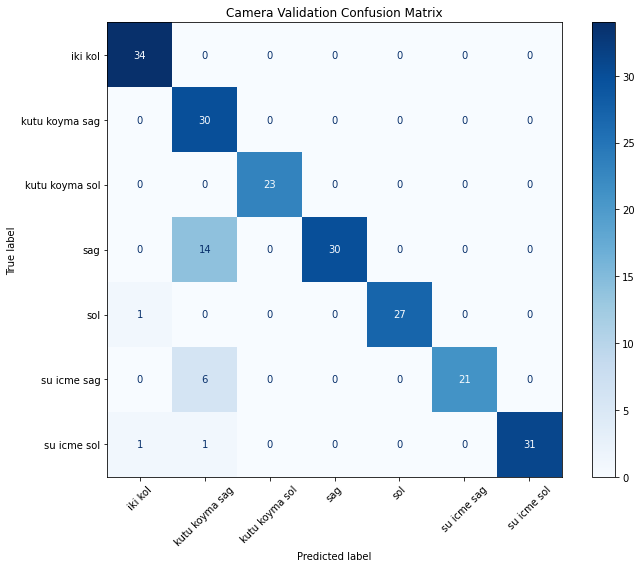

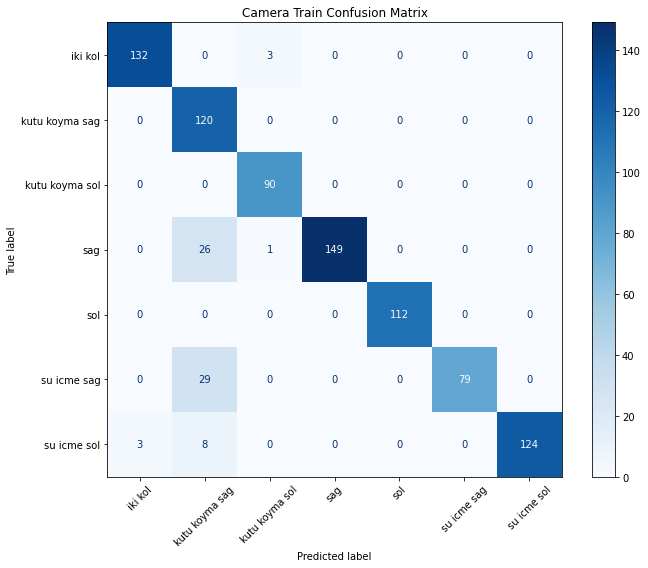

79/79 [==============================] - 322s 4s/step - loss: 0.0606 - accuracy: 0.9675
Radar Test Accuracy: 0.9302694201469421, Loss: 0.15599672496318817
Radar Train Accuracy: 0.9674603343009949, Loss: 0.06056996434926987
28/28 [==============================] - 112s 4s/step - loss: 7.2537 - accuracy: 0.9201
Camera Test Accuracy: 0.8949771523475647, Loss: 9.81493091583252
Camera Train Accuracy: 0.9200913310050964, Loss: 7.253655433654785
Radar F1 Score: 0.9302013035688897
Camera F1 Score: 0.8995941936866594


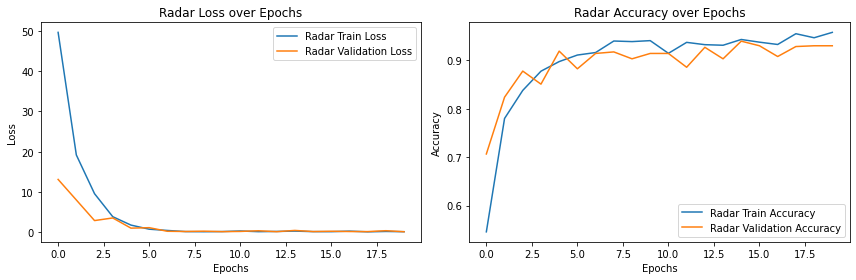

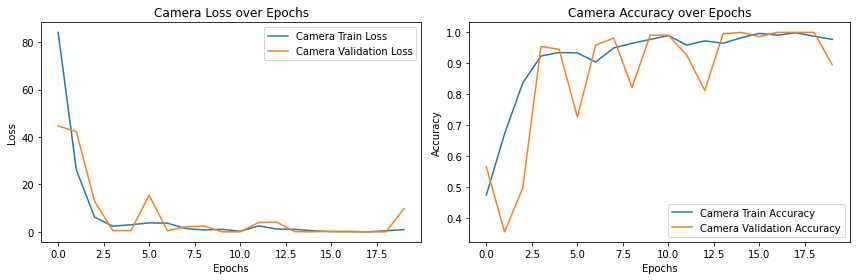

In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (Input, Conv3D, MaxPooling3D, 
                                     Flatten, Dense, Dropout, 
                                     BatchNormalization)
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, f1_score

# GPU Bellek büyümesini açalım
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

# Frame ayarlama fonksiyonu
def adjust_frames(frames, target_frames=128):
    current_len = len(frames)
    if current_len > target_frames:
        indices = np.linspace(0, current_len - 1, target_frames).astype(int)
        return [frames[i] for i in indices]
    elif current_len < target_frames:
        frames += [frames[-1]] * (target_frames - current_len)
    return frames

# Veri yükleme fonksiyonu
def load_data(folder_path, class_map, target_size=(64, 64), num_frames=128):
    data, labels = [], []
    
    # Klasörleri dolaş ve etiketler ile eşleştir
    for label, idx in class_map.items():
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            for subfolder in os.listdir(label_path):
                subfolder_path = os.path.join(label_path, subfolder)
                if os.path.isdir(subfolder_path):
                    frames = []
                    for file_name in sorted(os.listdir(subfolder_path)):
                        file_path = os.path.join(subfolder_path, file_name)
                        try:
                            img = load_img(file_path, target_size=target_size)
                            img_array = img_to_array(img).astype('float32') / 255.0
                            frames.append(img_array)
                        except Exception as e:
                            print(f"Error loading image {file_path}: {e}")
                    
                    if len(frames) > 0:
                        frames = np.array(adjust_frames(frames, target_frames=num_frames))
                        data.append(frames)
                        labels.append(idx)

    return np.array(data, dtype='float32'), np.array(labels)

# Radar verilerindeki etiketler ve yollar
radar_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5,
    "su icme sol": 6,
    "yurume": 7
}

# Kamera verilerindeki etiketler ve yollar
camera_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5,
    "su icme sol": 6
}

# Model oluşturma fonksiyonu
def create_model(num_classes=8):
    radar_input = Input(shape=(128, 64, 64, 3))
    x = Conv3D(64, (3, 3, 3), activation='relu')(radar_input)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = Dropout(0.3)(x)

    x = Conv3D(32, (3, 3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)

    model = Model(inputs=radar_input, outputs=Dense(num_classes, activation='softmax')(x))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Ana kod akışı
if __name__ == "__main__":
    # Radar verisini yükle
    radar_data, radar_labels = load_data(
        r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik", 
        radar_class_map
    )
    
    # Kamera verisini yükle
    camera_data, camera_labels = load_data(
        r"C:\Users\Hp\Desktop\captured_frames", 
        camera_class_map, num_frames=128  # Kamera için 128 frame belirleniyor
    )

    # Radar verisini eğitim ve test setine ayır
    radar_train, radar_test, radar_train_labels, radar_test_labels = train_test_split(
        radar_data, radar_labels, test_size=0.2, stratify=radar_labels, random_state=42
    )

    # Kamera verisini eğitim ve test setine ayır
    camera_train, camera_test, camera_train_labels, camera_test_labels = train_test_split(
        camera_data, camera_labels, test_size=0.2, stratify=camera_labels, random_state=42
    )

    # Etiketleri one-hot encode et
    radar_train_labels_encoded = to_categorical(radar_train_labels, num_classes=8)
    radar_test_labels_encoded = to_categorical(radar_test_labels, num_classes=8)
    
    camera_train_labels_encoded = to_categorical(camera_train_labels, num_classes=7)
    camera_test_labels_encoded = to_categorical(camera_test_labels, num_classes=7)

    # Modeli oluştur ve eğit
    model = create_model(num_classes=8)
    model.summary()

    history_radar = model.fit(
        radar_train, radar_train_labels_encoded,
        epochs=20, batch_size=2,  # Batch boyutunu 2'ye düşürüyoruz
        validation_data=(radar_test, radar_test_labels_encoded)
    )

    # Test ve karışıklık matrisi
    with tf.device('/CPU:0'):
        # Radar test seti için tahminlerin yapılması
        y_pred_radar = model.predict(radar_test, batch_size=2)
        y_pred_radar_classes = np.argmax(y_pred_radar, axis=1)

        # Radar confusion matrix
        cm_radar = confusion_matrix(np.argmax(radar_test_labels_encoded, axis=1), y_pred_radar_classes)
        
        # Radar confusion matrix'in çizimi
        plt.figure(figsize=(10, 8))
        disp_radar = ConfusionMatrixDisplay(confusion_matrix=cm_radar, display_labels=list(radar_class_map.keys()))
        disp_radar.plot(cmap=plt.cm.Blues, ax=plt.gca())
        plt.title("Radar Validation Confusion Matrix")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Radar Train seti için tahminlerin yapılması
        y_train_pred_radar = model.predict(radar_train, batch_size=2)
        y_train_pred_radar_classes = np.argmax(y_train_pred_radar, axis=1)

        # Radar Train confusion matrix
        cm_train_radar = confusion_matrix(np.argmax(radar_train_labels_encoded, axis=1), y_train_pred_radar_classes)
        
        # Radar Train confusion matrix'in çizimi
        plt.figure(figsize=(10, 8))
        disp_train_radar = ConfusionMatrixDisplay(confusion_matrix=cm_train_radar, display_labels=list(radar_class_map.keys()))
        disp_train_radar.plot(cmap=plt.cm.Blues, ax=plt.gca())
        plt.title("Radar Train Confusion Matrix")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Kamera Modeli
        camera_model = create_model(num_classes=7)
        camera_model.summary()

        history_camera = camera_model.fit(
            camera_train, camera_train_labels_encoded,
            epochs=20, batch_size=2,  # Batch boyutunu 2'ye düşürüyoruz
            validation_data=(camera_test, camera_test_labels_encoded)
        )

        # Kamera test seti için tahminlerin yapılması
        y_pred_camera = camera_model.predict(camera_test, batch_size=2)
        y_pred_camera_classes = np.argmax(y_pred_camera, axis=1)

        # Kamera confusion matrix
        cm_camera = confusion_matrix(np.argmax(camera_test_labels_encoded, axis=1), y_pred_camera_classes)
        
        # Kamera confusion matrix'in çizimi
        plt.figure(figsize=(10, 8))
        disp_camera = ConfusionMatrixDisplay(confusion_matrix=cm_camera, display_labels=list(camera_class_map.keys()))
        disp_camera.plot(cmap=plt.cm.Blues, ax=plt.gca())
        plt.title("Camera Validation Confusion Matrix")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Kamera Train seti için tahminlerin yapılması
        y_train_pred_camera = camera_model.predict(camera_train, batch_size=2)
        y_train_pred_camera_classes = np.argmax(y_train_pred_camera, axis=1)

        # Kamera Train confusion matrix
        cm_train_camera = confusion_matrix(np.argmax(camera_train_labels_encoded, axis=1), y_train_pred_camera_classes)
        
        # Kamera Train confusion matrix'in çizimi
        plt.figure(figsize=(10, 8))
        disp_train_camera = ConfusionMatrixDisplay(confusion_matrix=cm_train_camera, display_labels=list(camera_class_map.keys()))
        disp_train_camera.plot(cmap=plt.cm.Blues, ax=plt.gca())
        plt.title("Camera Train Confusion Matrix")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Model değerlendirmeleri
        radar_test_loss, radar_test_acc = model.evaluate(radar_test, radar_test_labels_encoded)
        radar_train_loss, radar_train_acc = model.evaluate(radar_train, radar_train_labels_encoded)

        print(f"Radar Test Accuracy: {radar_test_acc}, Loss: {radar_test_loss}")
        print(f"Radar Train Accuracy: {radar_train_acc}, Loss: {radar_train_loss}")

        camera_test_loss, camera_test_acc = camera_model.evaluate(camera_test, camera_test_labels_encoded)
        camera_train_loss, camera_train_acc = camera_model.evaluate(camera_train, camera_train_labels_encoded)

        print(f"Camera Test Accuracy: {camera_test_acc}, Loss: {camera_test_loss}")
        print(f"Camera Train Accuracy: {camera_train_acc}, Loss: {camera_train_loss}")

        # Metrikler
        radar_f1 = f1_score(np.argmax(radar_test_labels_encoded, axis=1), y_pred_radar_classes, average='weighted')
        camera_f1 = f1_score(np.argmax(camera_test_labels_encoded, axis=1), y_pred_camera_classes, average='weighted')

        print(f"Radar F1 Score: {radar_f1}")
        print(f"Camera F1 Score: {camera_f1}")

        # Kayıp ve doğruluk grafiklerini çiz
        plt.figure(figsize=(12, 4))
        
        # Radar kayıp grafiği
        plt.subplot(1, 2, 1)
        plt.plot(history_radar.history['loss'], label='Radar Train Loss')
        plt.plot(history_radar.history['val_loss'], label='Radar Validation Loss')
        plt.title('Radar Loss over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Radar doğruluk grafiği
        plt.subplot(1, 2, 2)
        plt.plot(history_radar.history['accuracy'], label='Radar Train Accuracy')
        plt.plot(history_radar.history['val_accuracy'], label='Radar Validation Accuracy')
        plt.title('Radar Accuracy over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

        # Kamera kayıp grafiği
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 2, 1)
        plt.plot(history_camera.history['loss'], label='Camera Train Loss')
        plt.plot(history_camera.history['val_loss'], label='Camera Validation Loss')
        plt.title('Camera Loss over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Kamera doğruluk grafiği
        plt.subplot(1, 2, 2)
        plt.plot(history_camera.history['accuracy'], label='Camera Train Accuracy')
        plt.plot(history_camera.history['val_accuracy'], label='Camera Validation Accuracy')
        plt.title('Camera Accuracy over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()


Epoch 1/20
110/110 [==============================] - 1831s 17s/step - loss: 79.9024 - accuracy: 0.5331 - val_loss: 114.6914 - val_accuracy: 0.2009
Epoch 2/20
110/110 [==============================] - 1831s 17s/step - loss: 43.8395 - accuracy: 0.6747 - val_loss: 141.9593 - val_accuracy: 0.1187
Epoch 3/20
110/110 [==============================] - 1832s 17s/step - loss: 15.2585 - accuracy: 0.8368 - val_loss: 65.5047 - val_accuracy: 0.4886
Epoch 4/20
110/110 [==============================] - 1818s 17s/step - loss: 10.3910 - accuracy: 0.9075 - val_loss: 179.2233 - val_accuracy: 0.4932
Epoch 5/20
110/110 [==============================] - 1806s 16s/step - loss: 2.9686 - accuracy: 0.9418 - val_loss: 97.4710 - val_accuracy: 0.4292
Epoch 6/20
110/110 [==============================] - 1769s 16s/step - loss: 4.2657 - accuracy: 0.9521 - val_loss: 9.6007 - val_accuracy: 0.8493
Epoch 7/20
110/110 [==============================] - 1777s 16s/step - loss: 6.1880 - accuracy: 0.9349 - val_loss: 235

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (8).

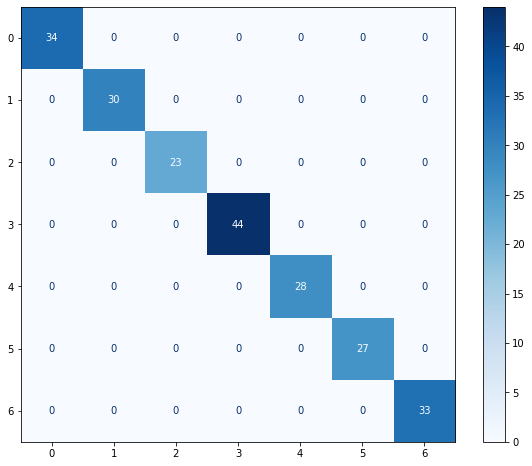

In [13]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (Input, Conv3D, MaxPooling3D, 
                                     Flatten, Dense, Dropout, 
                                     BatchNormalization, concatenate)
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, mean_squared_error
import matplotlib.pyplot as plt

# GPU bellek büyümesini aç
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

def adjust_frames(frames, target_frames=128):
    current_len = len(frames)
    if current_len > target_frames:
        indices = np.linspace(0, current_len - 1, target_frames).astype(int)
        return [frames[i] for i in indices]
    elif current_len < target_frames:
        frames += [frames[-1]] * (target_frames - current_len)
    return frames

def load_data_synchronized(radar_folder, camera_folder, radar_class_map, camera_class_map, target_size=(64, 64), num_frames=128):
    radar_data, camera_data, labels = [], [], []
    for label, radar_idx in radar_class_map.items():
        # Kamera sınıf haritasında mevcut olmayanları atla
        if label not in camera_class_map:
            continue

        camera_idx = camera_class_map[label]
        radar_label_path = os.path.join(radar_folder, label)
        camera_label_path = os.path.join(camera_folder, label)
        
        if os.path.isdir(radar_label_path) and os.path.isdir(camera_label_path):
            radar_subfolders = sorted(os.listdir(radar_label_path))
            camera_subfolders = sorted(os.listdir(camera_label_path))
            
            # Eşleşen alt klasörleri yükleyin
            for radar_subfolder, camera_subfolder in zip(radar_subfolders, camera_subfolders):
                radar_subfolder_path = os.path.join(radar_label_path, radar_subfolder)
                camera_subfolder_path = os.path.join(camera_label_path, camera_subfolder)
                
                if os.path.isdir(radar_subfolder_path) and os.path.isdir(camera_subfolder_path):
                    radar_frames, camera_frames = [], []
                    
                    for radar_file, camera_file in zip(sorted(os.listdir(radar_subfolder_path)),
                                                       sorted(os.listdir(camera_subfolder_path))):
                        radar_file_path = os.path.join(radar_subfolder_path, radar_file)
                        camera_file_path = os.path.join(camera_subfolder_path, camera_file)
                        try:
                            radar_img = load_img(radar_file_path, target_size=target_size)
                            camera_img = load_img(camera_file_path, target_size=target_size)
                            
                            radar_frames.append(img_to_array(radar_img).astype('float32') / 255.0)
                            camera_frames.append(img_to_array(camera_img).astype('float32') / 255.0)
                        except Exception as e:
                            print(f"Error loading images {radar_file_path} or {camera_file_path}: {e}")
                    
                    if radar_frames and camera_frames:
                        radar_data.append(np.array(adjust_frames(radar_frames, num_frames)))
                        camera_data.append(np.array(adjust_frames(camera_frames, num_frames)))
                        labels.append(radar_idx)
    
    radar_data = np.array(radar_data, dtype='float32')
    camera_data = np.array(camera_data, dtype='float32')
    labels = np.array(labels)
    return radar_data, camera_data, labels

# Veri etiketleri
radar_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5,
    "su icme sol": 6,
    "yurume": 7
}

camera_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5,
    "su icme sol": 6
}

# İki girişli model oluşturma fonksiyonu
def create_multi_input_model(num_classes=8):
    radar_input = Input(shape=(128, 64, 64, 3), name="radar_input")
    x_radar = Conv3D(64, (3, 3, 3), activation='relu')(radar_input)
    x_radar = BatchNormalization()(x_radar)
    x_radar = MaxPooling3D(pool_size=(2, 2, 2))(x_radar)
    x_radar = Dropout(0.3)(x_radar)
    x_radar = Conv3D(32, (3, 3, 3), activation='relu')(x_radar)
    x_radar = BatchNormalization()(x_radar)
    x_radar = MaxPooling3D(pool_size=(2, 2, 2))(x_radar)
    x_radar = Dropout(0.3)(x_radar)
    x_radar = Flatten()(x_radar)

    camera_input = Input(shape=(128, 64, 64, 3), name="camera_input")
    x_camera = Conv3D(64, (3, 3, 3), activation='relu')(camera_input)
    x_camera = BatchNormalization()(x_camera)
    x_camera = MaxPooling3D(pool_size=(2, 2, 2))(x_camera)
    x_camera = Dropout(0.3)(x_camera)
    x_camera = Conv3D(32, (3, 3, 3), activation='relu')(x_camera)
    x_camera = BatchNormalization()(x_camera)
    x_camera = MaxPooling3D(pool_size=(2, 2, 2))(x_camera)
    x_camera = Dropout(0.3)(x_camera)
    x_camera = Flatten()(x_camera)

    combined = concatenate([x_radar, x_camera])
    combined_output = Dense(num_classes, activation='softmax')(combined)

    model = Model(inputs=[radar_input, camera_input], outputs=combined_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Main code flow
if __name__ == "__main__":
    # Radar ve kamera verileri
    radar_data, camera_data, labels = load_data_synchronized(
        radar_folder=r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik", 
        camera_folder=r"C:\Users\Hp\Desktop\captured_frames",
        radar_class_map=radar_class_map, 
        camera_class_map=camera_class_map
    )

    radar_train, radar_test, camera_train, camera_test, train_labels, test_labels = train_test_split(
        radar_data, camera_data, labels, test_size=0.2, stratify=labels, random_state=42
    )

    # Etiketleri one-hot encode yapın
    train_labels_encoded = to_categorical(train_labels, num_classes=8)
    test_labels_encoded = to_categorical(test_labels, num_classes=8)

    model = create_multi_input_model(num_classes=8)

    # Modeli eğitme ve test etme 
    history = model.fit(
        [radar_train, camera_train],
        train_labels_encoded,
        epochs=20,
        batch_size=8,  # Küçük batch boyutu
        validation_data=([radar_test, camera_test], test_labels_encoded)
    )

    # Modeli test verileriyle değerlendirme
    test_loss, test_acc = model.evaluate([radar_test, camera_test], test_labels_encoded)
    print(f"Test accuracy: {test_acc}")

    # Tahminler ve performans metrikleri
    y_pred = model.predict([radar_test, camera_test], batch_size=2)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels_encoded, axis=1)

    # F1 skoru ve MSE
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    mse = mean_squared_error(y_true_classes, y_pred_classes)
    print(f"F1 Score: {f1}")
    print(f"MSE: {mse}")

    # Confusion Matrix
    cm_test = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=list(radar_class_map.keys()))
    disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
    plt.title("Confusion Matrix - Test Set")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Eğitim ve doğrulama kaybı ve doğruluğunu çizdirme
    plt.figure(figsize=(12, 4))
    
    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()



In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"



In [3]:
print("Radar test set shape:", radar_test.shape)
print("Camera test set shape:", camera_test.shape)
print("Radar test labels shape:", radar_test_labels_encoded.shape)


Radar test set shape: (631, 128, 64, 64, 3)
Camera test set shape: (219, 128, 64, 64, 3)
Radar test labels shape: (631, 8)


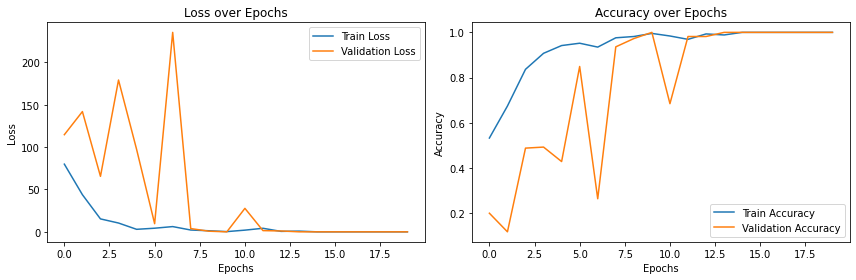

In [15]:
# Eğitim ve doğrulama kaybı ve doğruluğunu çizdirme
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10
110/110 [==============================] - 1828s 17s/step - loss: 66.7952 - accuracy: 0.5719 - val_loss: 350.2076 - val_accuracy: 0.0000e+00
Epoch 2/10
110/110 [==============================] - 1833s 17s/step - loss: 39.9323 - accuracy: 0.6963 - val_loss: 282.8278 - val_accuracy: 0.2283
Epoch 3/10
110/110 [==============================] - 1833s 17s/step - loss: 33.6035 - accuracy: 0.7751 - val_loss: 39.7784 - val_accuracy: 0.6027
Epoch 4/10
110/110 [==============================] - 1844s 17s/step - loss: 13.0022 - accuracy: 0.8870 - val_loss: 41.5383 - val_accuracy: 0.8219
Epoch 5/10
110/110 [==============================] - 1838s 17s/step - loss: 7.2836 - accuracy: 0.9384 - val_loss: 48.3370 - val_accuracy: 0.6393
Epoch 6/10
110/110 [==============================] - 1831s 17s/step - loss: 9.6135 - accuracy: 0.9326 - val_loss: 30.7451 - val_accuracy: 0.8858
Epoch 7/10
110/110 [==============================] - 1814s 16s/step - loss: 4.8376 - accuracy: 0.9635 - val_loss:

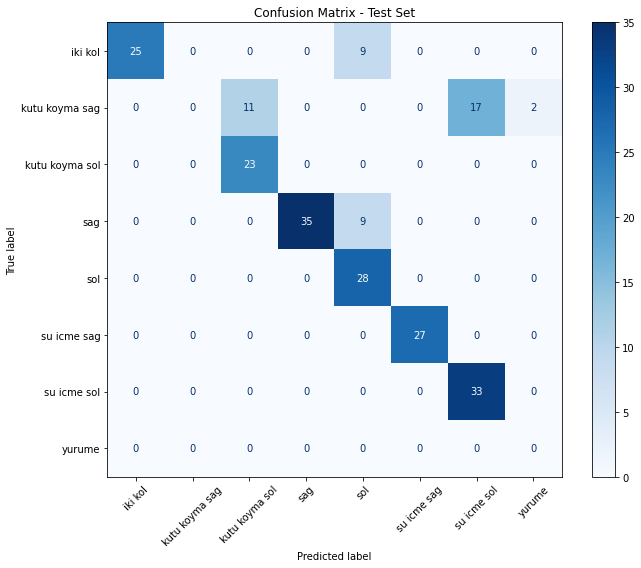

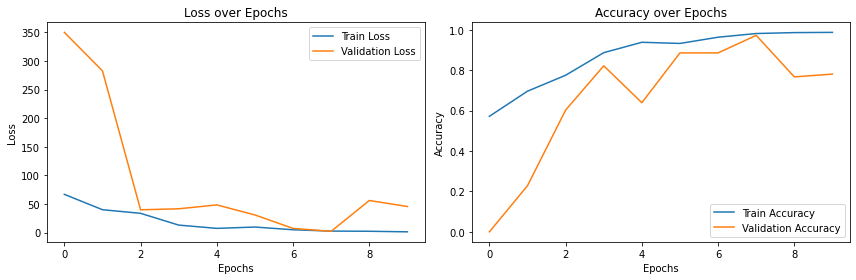

In [18]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (Input, Conv3D, MaxPooling3D, 
                                     Flatten, Dense, Dropout, 
                                     BatchNormalization, concatenate)
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, mean_squared_error
import matplotlib.pyplot as plt

# GPU bellek büyümesini aç
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

def adjust_frames(frames, target_frames=128):
    current_len = len(frames)
    if current_len > target_frames:
        indices = np.linspace(0, current_len - 1, target_frames).astype(int)
        return [frames[i] for i in indices]
    elif current_len < target_frames:
        frames += [frames[-1]] * (target_frames - current_len)
    return frames

def load_data_synchronized(radar_folder, camera_folder, radar_class_map, camera_class_map, target_size=(64, 64), num_frames=128):
    radar_data, camera_data, labels = [], [], []
    for label, radar_idx in radar_class_map.items():
        # Kamera sınıf haritasında mevcut olmayanları atla
        if label not in camera_class_map:
            continue

        camera_idx = camera_class_map[label]
        radar_label_path = os.path.join(radar_folder, label)
        camera_label_path = os.path.join(camera_folder, label)
        
        if os.path.isdir(radar_label_path) and os.path.isdir(camera_label_path):
            radar_subfolders = sorted(os.listdir(radar_label_path))
            camera_subfolders = sorted(os.listdir(camera_label_path))
            
            # Eşleşen alt klasörleri yükleyin
            for radar_subfolder, camera_subfolder in zip(radar_subfolders, camera_subfolders):
                radar_subfolder_path = os.path.join(radar_label_path, radar_subfolder)
                camera_subfolder_path = os.path.join(camera_label_path, camera_subfolder)
                
                if os.path.isdir(radar_subfolder_path) and os.path.isdir(camera_subfolder_path):
                    radar_frames, camera_frames = [], []
                    
                    for radar_file, camera_file in zip(sorted(os.listdir(radar_subfolder_path)),
                                                       sorted(os.listdir(camera_subfolder_path))):
                        radar_file_path = os.path.join(radar_subfolder_path, radar_file)
                        camera_file_path = os.path.join(camera_subfolder_path, camera_file)
                        try:
                            radar_img = load_img(radar_file_path, target_size=target_size)
                            camera_img = load_img(camera_file_path, target_size=target_size)
                            
                            radar_frames.append(img_to_array(radar_img).astype('float32') / 255.0)
                            camera_frames.append(img_to_array(camera_img).astype('float32') / 255.0)
                        except Exception as e:
                            print(f"Error loading images {radar_file_path} or {camera_file_path}: {e}")
                    
                    if radar_frames and camera_frames:
                        radar_data.append(np.array(adjust_frames(radar_frames, num_frames)))
                        camera_data.append(np.array(adjust_frames(camera_frames, num_frames)))
                        labels.append(radar_idx)
    
    radar_data = np.array(radar_data, dtype='float32')
    camera_data = np.array(camera_data, dtype='float32')
    labels = np.array(labels)
    return radar_data, camera_data, labels

# Veri etiketleri
radar_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5,
    "su icme sol": 6,
    "yurume": 7
}

camera_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5,
    "su icme sol": 6
}

# İki girişli model oluşturma fonksiyonu
def create_multi_input_model(num_classes=8):
    radar_input = Input(shape=(128, 64, 64, 3), name="radar_input")
    x_radar = Conv3D(64, (3, 3, 3), activation='relu')(radar_input)
    x_radar = BatchNormalization()(x_radar)
    x_radar = MaxPooling3D(pool_size=(2, 2, 2))(x_radar)
    x_radar = Dropout(0.3)(x_radar)
    x_radar = Conv3D(32, (3, 3, 3), activation='relu')(x_radar)
    x_radar = BatchNormalization()(x_radar)
    x_radar = MaxPooling3D(pool_size=(2, 2, 2))(x_radar)
    x_radar = Dropout(0.3)(x_radar)
    x_radar = Flatten()(x_radar)

    camera_input = Input(shape=(128, 64, 64, 3), name="camera_input")
    x_camera = Conv3D(64, (3, 3, 3), activation='relu')(camera_input)
    x_camera = BatchNormalization()(x_camera)
    x_camera = MaxPooling3D(pool_size=(2, 2, 2))(x_camera)
    x_camera = Dropout(0.3)(x_camera)
    x_camera = Conv3D(32, (3, 3, 3), activation='relu')(x_camera)
    x_camera = BatchNormalization()(x_camera)
    x_camera = MaxPooling3D(pool_size=(2, 2, 2))(x_camera)
    x_camera = Dropout(0.3)(x_camera)
    x_camera = Flatten()(x_camera)

    combined = concatenate([x_radar, x_camera])
    combined_output = Dense(num_classes, activation='softmax')(combined)

    model = Model(inputs=[radar_input, camera_input], outputs=combined_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Main code flow
if __name__ == "__main__":
    # Radar ve kamera verileri
    radar_data, camera_data, labels = load_data_synchronized(
        radar_folder=r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik", 
        camera_folder=r"C:\Users\Hp\Desktop\captured_frames",
        radar_class_map=radar_class_map, 
        camera_class_map=camera_class_map
    )

    radar_train, radar_test, camera_train, camera_test, train_labels, test_labels = train_test_split(
        radar_data, camera_data, labels, test_size=0.2, stratify=labels, random_state=42
    )

    # Etiketleri one-hot encode yapın
    train_labels_encoded = to_categorical(train_labels, num_classes=8)
    test_labels_encoded = to_categorical(test_labels, num_classes=8)

    model = create_multi_input_model(num_classes=8)

    # Modeli eğitme ve test etme 
    history = model.fit(
        [radar_train, camera_train],
        train_labels_encoded,
        epochs=10,
        batch_size=8,  # Küçük batch boyutu
        validation_data=([radar_test, camera_test], test_labels_encoded)
    )

    # Modeli test verileriyle değerlendirme
    test_loss, test_acc = model.evaluate([radar_test, camera_test], test_labels_encoded)
    print(f"Test accuracy: {test_acc}")

    # Tahminler ve performans metrikleri
    y_pred = model.predict([radar_test, camera_test], batch_size=2)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels_encoded, axis=1)

    # F1 skoru ve MSE
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    mse = mean_squared_error(y_true_classes, y_pred_classes)
    print(f"F1 Score: {f1}")
    print(f"MSE: {mse}")

    # Confusion Matrix
    cm_test = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=list(radar_class_map.keys()))
    disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
    plt.title("Confusion Matrix - Test Set")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Eğitim ve doğrulama kaybı ve doğruluğunu çizdirme
    plt.figure(figsize=(12, 4))
    
    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()



In [ ]:
#daha az veriyle, ayrı ayrı ve beraber modelle

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 64, 64, 3)]  0         
_________________________________________________________________
conv3d (Conv3D)              (None, 126, 62, 62, 64)   5248      
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 62, 62, 64)   256       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 63, 31, 31, 64)    0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 31, 31, 64)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 61, 29, 29, 32)    55328     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 29, 29, 32)    128   

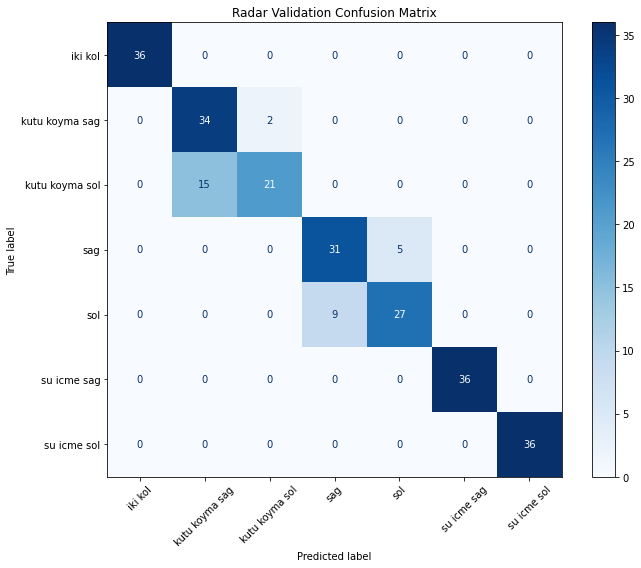

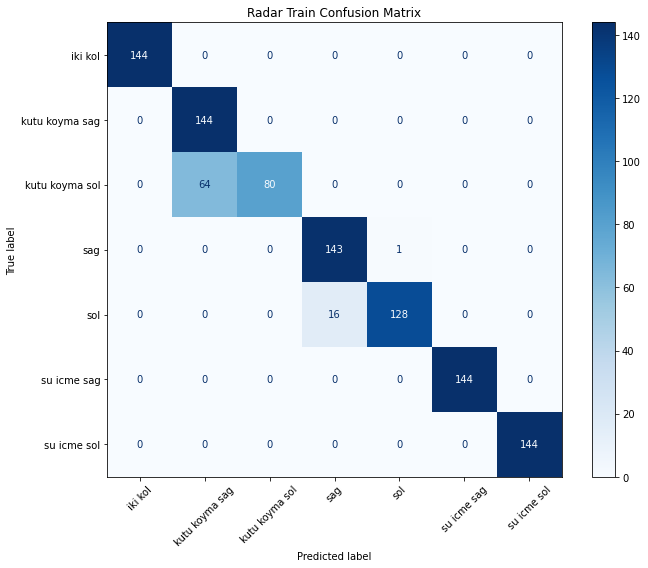

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 64, 64, 3)]  0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 126, 62, 62, 64)   5248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 126, 62, 62, 64)   256       
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 63, 31, 31, 64)    0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 63, 31, 31, 64)    0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 61, 29, 29, 32)    55328     
_________________________________________________________________
batch_normalization_3 (Batch (None, 61, 29, 29, 32)    128 

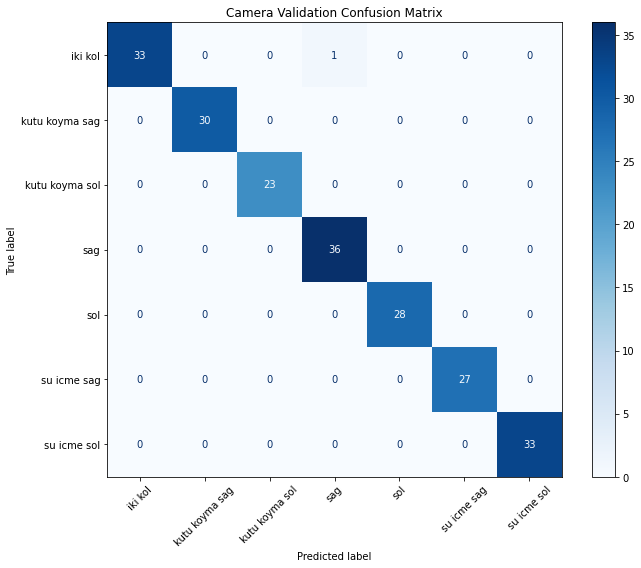

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (Input, Conv3D, MaxPooling3D, 
                                     Flatten, Dense, Dropout, 
                                     BatchNormalization)
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# GPU Bellek büyümesini açalım
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

# Frame ayarlama fonksiyonu
def adjust_frames(frames, target_frames=128):
    current_len = len(frames)
    if current_len > target_frames:
        indices = np.linspace(0, current_len - 1, target_frames).astype(int)
        return [frames[i] for i in indices]
    elif current_len < target_frames:
        frames += [frames[-1]] * (target_frames - current_len)
    return frames

# Veri yükleme fonksiyonu (sınıf başına 180 klasör ile sınırlı)
def load_data(folder_path, class_map, target_size=(64, 64), num_frames=128, max_folders_per_class=180):
    data, labels = [], []
    
    # Klasörleri dolaş ve etiketler ile eşleştir
    for label, idx in class_map.items():
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            subfolders = os.listdir(label_path)[:max_folders_per_class]  # Sınıf başına 180 klasör sınırı
            for subfolder in subfolders:
                subfolder_path = os.path.join(label_path, subfolder)
                if os.path.isdir(subfolder_path):
                    frames = []
                    for file_name in sorted(os.listdir(subfolder_path)):
                        file_path = os.path.join(subfolder_path, file_name)
                        try:
                            img = load_img(file_path, target_size=target_size)
                            img_array = img_to_array(img).astype('float32') / 255.0
                            frames.append(img_array)
                        except Exception as e:
                            print(f"Error loading image {file_path}: {e}")
                    
                    if len(frames) > 0:
                        frames = np.array(adjust_frames(frames, target_frames=num_frames))
                        data.append(frames)
                        labels.append(idx)

    return np.array(data, dtype='float32'), np.array(labels)

# Radar verilerindeki etiketler ve yollar (yurume etiketi çıkarıldı)
radar_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5,
    "su icme sol": 6
}

# Kamera verilerindeki etiketler ve yollar
camera_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5,
    "su icme sol": 6
}

# Model oluşturma fonksiyonu
def create_model(num_classes=7):
    radar_input = Input(shape=(128, 64, 64, 3))
    x = Conv3D(64, (3, 3, 3), activation='relu')(radar_input)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = Dropout(0.3)(x)

    x = Conv3D(32, (3, 3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2))(x)
    x = Dropout(0.3)(x)
    x = Flatten()(x)

    model = Model(inputs=radar_input, outputs=Dense(num_classes, activation='softmax')(x))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Ana kod akışı
if __name__ == "__main__":
    # Radar verisini yükle (sınıf başına 180 klasör ile sınırlı)
    radar_data, radar_labels = load_data(
        r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik", 
        radar_class_map
    )
    
    # Kamera verisini yükle (sınıf başına 180 klasör ile sınırlı)
    camera_data, camera_labels = load_data(
        r"C:\Users\Hp\Desktop\captured_frames", 
        camera_class_map, num_frames=128
    )

    # Radar verisini eğitim ve test setine ayır
    radar_train, radar_test, radar_train_labels, radar_test_labels = train_test_split(
        radar_data, radar_labels, test_size=0.2, stratify=radar_labels, random_state=42
    )

    # Kamera verisini eğitim ve test setine ayır
    camera_train, camera_test, camera_train_labels, camera_test_labels = train_test_split(
        camera_data, camera_labels, test_size=0.2, stratify=camera_labels, random_state=42
    )

    # Etiketleri one-hot encode et
    radar_train_labels_encoded = to_categorical(radar_train_labels, num_classes=7)
    radar_test_labels_encoded = to_categorical(radar_test_labels, num_classes=7)
    
    camera_train_labels_encoded = to_categorical(camera_train_labels, num_classes=7)
    camera_test_labels_encoded = to_categorical(camera_test_labels, num_classes=7)

    # Modeli oluştur ve eğit
    model = create_model(num_classes=7)
    model.summary()

    history_radar = model.fit(
        radar_train, radar_train_labels_encoded,
        epochs=20, batch_size=2,  # Batch boyutunu 2'ye düşürüyoruz
        validation_data=(radar_test, radar_test_labels_encoded)
    )

    # Radar test seti için tahminlerin yapılması
    y_pred_radar = model.predict(radar_test, batch_size=2)
    y_pred_radar_classes = np.argmax(y_pred_radar, axis=1)

    # Radar confusion matrix
    cm_radar = confusion_matrix(np.argmax(radar_test_labels_encoded, axis=1), y_pred_radar_classes)
    
    # Radar confusion matrix'in çizimi
    plt.figure(figsize=(10, 8))
    disp_radar = ConfusionMatrixDisplay(confusion_matrix=cm_radar, display_labels=list(radar_class_map.keys()))
    disp_radar.plot(cmap=plt.cm.Blues, ax=plt.gca())
    plt.title("Radar Validation Confusion Matrix")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Radar Train seti için tahminlerin yapılması
    y_train_pred_radar = model.predict(radar_train, batch_size=2)
    y_train_pred_radar_classes = np.argmax(y_train_pred_radar, axis=1)

    # Radar Train confusion matrix
    cm_train_radar = confusion_matrix(np.argmax(radar_train_labels_encoded, axis=1), y_train_pred_radar_classes)
    
    # Radar Train confusion matrix'in çizimi
    plt.figure(figsize=(10, 8))
    disp_train_radar = ConfusionMatrixDisplay(confusion_matrix=cm_train_radar, display_labels=list(radar_class_map.keys()))
    disp_train_radar.plot(cmap=plt.cm.Blues, ax=plt.gca())
    plt.title("Radar Train Confusion Matrix")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Kamera Modeli
    camera_model = create_model(num_classes=7)
    camera_model.summary()

    history_camera = camera_model.fit(
        camera_train, camera_train_labels_encoded,
        epochs=20, batch_size=2,
        validation_data=(camera_test, camera_test_labels_encoded)
    )

    # Kamera test seti için tahminlerin yapılması
    y_pred_camera = camera_model.predict(camera_test, batch_size=2)
    y_pred_camera_classes = np.argmax(y_pred_camera, axis=1)

    # Kamera confusion matrix
    cm_camera = confusion_matrix(np.argmax(camera_test_labels_encoded, axis=1), y_pred_camera_classes)
    
    # Kamera confusion matrix'in çizimi
    plt.figure(figsize=(10, 8))
    disp_camera = ConfusionMatrixDisplay(confusion_matrix=cm_camera, display_labels=list(camera_class_map.keys()))
    disp_camera.plot(cmap=plt.cm.Blues, ax=plt.gca())
    plt.title("Camera Validation Confusion Matrix")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Kamera Train seti için tahminlerin yapılması
    y_train_pred_camera = camera_model.predict(camera_train, batch_size=2)
    y_train_pred_camera_classes = np.argmax(y_train_pred_camera, axis=1)

    # Kamera Train confusion matrix
    cm_train_camera = confusion_matrix(np.argmax(camera_train_labels_encoded, axis=1), y_train_pred_camera_classes)
    
    # Kamera Train confusion matrix'in çizimi
    plt.figure(figsize=(10, 8))
    disp_train_camera = ConfusionMatrixDisplay(confusion_matrix=cm_train_camera, display_labels=list(camera_class_map.keys()))
    disp_train_camera.plot(cmap=plt.cm.Blues, ax=plt.gca())
    plt.title("Camera Train Confusion Matrix")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


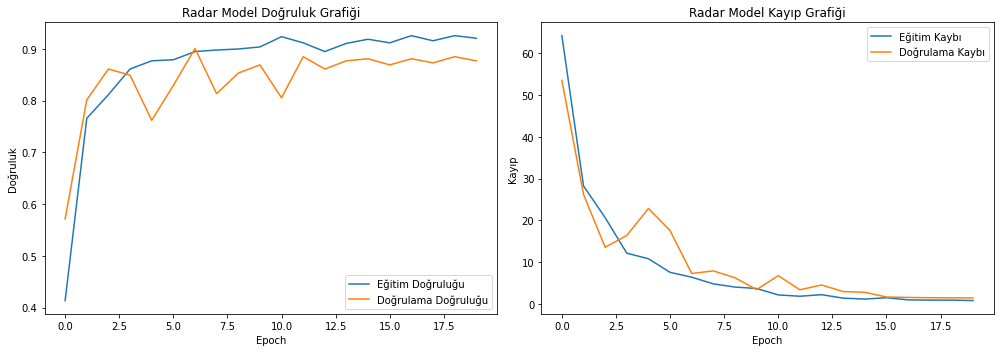

Eğitim Doğruluğu (Radar): 0.9196
Test Doğruluğu (Radar): 0.8770
Eğitim F1 Skoru (Radar): 0.9163
Test F1 Skoru (Radar): 0.8745


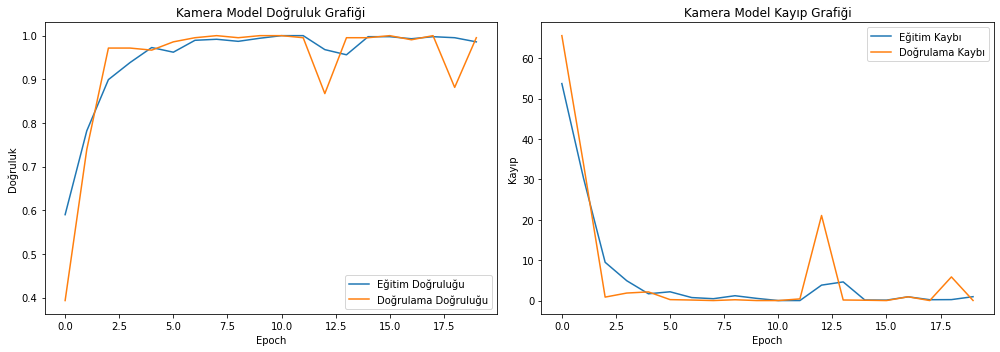

Eğitim Doğruluğu (Kamera): 0.9751
Test Doğruluğu (Kamera): 0.9479
Eğitim F1 Skoru (Kamera): 0.9752
Test F1 Skoru (Kamera): 0.9482


In [7]:

    # Grafik çizimi için doğruluk ve kayıp değerlerini al
    radar_acc = history_radar.history['accuracy']
    radar_val_acc = history_radar.history['val_accuracy']
    radar_loss = history_radar.history['loss']
    radar_val_loss = history_radar.history['val_loss']

    # Doğruluk grafiği
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(radar_acc, label='Eğitim Doğruluğu')
    plt.plot(radar_val_acc, label='Doğrulama Doğruluğu')
    plt.title('Radar Model Doğruluk Grafiği')
    plt.xlabel('Epoch')
    plt.ylabel('Doğruluk')
    plt.legend()
    
    # Kayıp grafiği
    plt.subplot(1, 2, 2)
    plt.plot(radar_loss, label='Eğitim Kaybı')
    plt.plot(radar_val_loss, label='Doğrulama Kaybı')
    plt.title('Radar Model Kayıp Grafiği')
    plt.xlabel('Epoch')
    plt.ylabel('Kayıp')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Eğitim seti için tahminlerin yapılması
    y_train_pred_radar = model.predict(radar_train, batch_size=2)
    y_train_pred_radar_classes = np.argmax(y_train_pred_radar, axis=1)

    # Test seti için tahminlerin yapılması
    y_pred_radar = model.predict(radar_test, batch_size=2)
    y_pred_radar_classes = np.argmax(y_pred_radar, axis=1)

    # F1 skoru hesaplama
    train_f1_score_radar = f1_score(np.argmax(radar_train_labels_encoded, axis=1), y_train_pred_radar_classes, average='weighted')
    test_f1_score_radar = f1_score(np.argmax(radar_test_labels_encoded, axis=1), y_pred_radar_classes, average='weighted')

    # Doğruluk değerlerini yazdır
    train_accuracy_radar = np.mean(y_train_pred_radar_classes == np.argmax(radar_train_labels_encoded, axis=1))
    test_accuracy_radar = np.mean(y_pred_radar_classes == np.argmax(radar_test_labels_encoded, axis=1))

    print(f"Eğitim Doğruluğu (Radar): {train_accuracy_radar:.4f}")
    print(f"Test Doğruluğu (Radar): {test_accuracy_radar:.4f}")
    print(f"Eğitim F1 Skoru (Radar): {train_f1_score_radar:.4f}")
    print(f"Test F1 Skoru (Radar): {test_f1_score_radar:.4f}")



    # Grafik çizimi için doğruluk ve kayıp değerlerini al
    camera_acc = history_camera.history['accuracy']
    camera_val_acc = history_camera.history['val_accuracy']
    camera_loss = history_camera.history['loss']
    camera_val_loss = history_camera.history['val_loss']

    # Doğruluk grafiği
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(camera_acc, label='Eğitim Doğruluğu')
    plt.plot(camera_val_acc, label='Doğrulama Doğruluğu')
    plt.title('Kamera Model Doğruluk Grafiği')
    plt.xlabel('Epoch')
    plt.ylabel('Doğruluk')
    plt.legend()
    
    # Kayıp grafiği
    plt.subplot(1, 2, 2)
    plt.plot(camera_loss, label='Eğitim Kaybı')
    plt.plot(camera_val_loss, label='Doğrulama Kaybı')
    plt.title('Kamera Model Kayıp Grafiği')
    plt.xlabel('Epoch')
    plt.ylabel('Kayıp')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Eğitim seti için tahminlerin yapılması
    y_train_pred_camera = camera_model.predict(camera_train, batch_size=2)
    y_train_pred_camera_classes = np.argmax(y_train_pred_camera, axis=1)

    # Test seti için tahminlerin yapılması
    y_pred_camera = camera_model.predict(camera_test, batch_size=2)
    y_pred_camera_classes = np.argmax(y_pred_camera, axis=1)

    # F1 skoru hesaplama
    train_f1_score_camera = f1_score(np.argmax(camera_train_labels_encoded, axis=1), y_train_pred_camera_classes, average='weighted')
    test_f1_score_camera = f1_score(np.argmax(camera_test_labels_encoded, axis=1), y_pred_camera_classes, average='weighted')

    # Doğruluk değerlerini yazdır
    train_accuracy_camera = np.mean(y_train_pred_camera_classes == np.argmax(camera_train_labels_encoded, axis=1))
    test_accuracy_camera = np.mean(y_pred_camera_classes == np.argmax(camera_test_labels_encoded, axis=1))

    print(f"Eğitim Doğruluğu (Kamera): {train_accuracy_camera:.4f}")
    print(f"Test Doğruluğu (Kamera): {test_accuracy_camera:.4f}")
    print(f"Eğitim F1 Skoru (Kamera): {train_f1_score_camera:.4f}")
    print(f"Test F1 Skoru (Kamera): {test_f1_score_camera:.4f}")




Epoch 1/10
438/438 [==============================] - 1965s 4s/step - loss: 92.9412 - accuracy: 0.5993 - val_loss: 114.9652 - val_accuracy: 0.4338
Epoch 2/10
438/438 [==============================] - 1947s 4s/step - loss: 39.5105 - accuracy: 0.8242 - val_loss: 46.3245 - val_accuracy: 0.8950
Epoch 3/10
438/438 [==============================] - 1937s 4s/step - loss: 5.9292 - accuracy: 0.9600 - val_loss: 38.8952 - val_accuracy: 0.7443
Epoch 4/10
438/438 [==============================] - 1942s 4s/step - loss: 10.8583 - accuracy: 0.9475 - val_loss: 0.5987 - val_accuracy: 0.9817
Epoch 5/10
438/438 [==============================] - 1931s 4s/step - loss: 8.9275 - accuracy: 0.9463 - val_loss: 13.4522 - val_accuracy: 0.8265
Epoch 6/10
438/438 [==============================] - 1978s 5s/step - loss: 3.1951 - accuracy: 0.9760 - val_loss: 34.1118 - val_accuracy: 0.8676
Epoch 7/10
438/438 [==============================] - 1955s 4s/step - loss: 1.4085 - accuracy: 0.9909 - val_loss: 0.6687 - val_

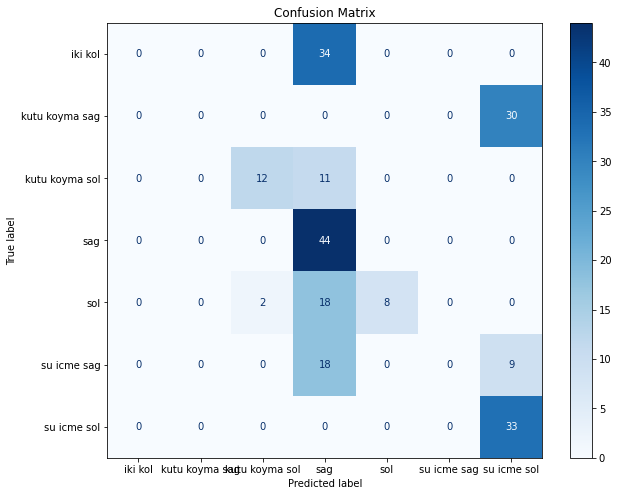

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (Input, Conv3D, MaxPooling3D, 
                                     Flatten, Dense, Dropout, 
                                     BatchNormalization, concatenate)
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, mean_squared_error
import matplotlib.pyplot as plt

# GPU bellek büyümesini aç
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:  # Düzeltme yapıldı, 'gps' yerine 'gpus' kullanılmalı
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

def adjust_frames(frames, target_frames=128):
    current_len = len(frames)
    if current_len > target_frames:
        indices = np.linspace(0, current_len - 1, target_frames).astype(int)
        return [frames[i] for i in indices]
    elif current_len < target_frames:
        frames += [frames[-1]] * (target_frames - current_len)
    return frames

def load_data_synchronized(radar_folder, camera_folder, radar_class_map, camera_class_map, target_size=(64, 64), num_frames=128):
    radar_data, camera_data, labels = [], [], []
    for label, radar_idx in radar_class_map.items():
        # Kamera sınıf haritasında mevcut olmayanları atla
        if label not in camera_class_map:
            continue

        camera_idx = camera_class_map[label]
        radar_label_path = os.path.join(radar_folder, label)
        camera_label_path = os.path.join(camera_folder, label)
        
        if os.path.isdir(radar_label_path) and os.path.isdir(camera_label_path):
            radar_subfolders = sorted(os.listdir(radar_label_path))
            camera_subfolders = sorted(os.listdir(camera_label_path))
            
            # Eşleşen alt klasörleri yükleyin
            for radar_subfolder, camera_subfolder in zip(radar_subfolders, camera_subfolders):
                radar_subfolder_path = os.path.join(radar_label_path, radar_subfolder)
                camera_subfolder_path = os.path.join(camera_label_path, camera_subfolder)
                
                if os.path.isdir(radar_subfolder_path) and os.path.isdir(camera_subfolder_path):
                    radar_frames, camera_frames = [], []
                    
                    for radar_file, camera_file in zip(sorted(os.listdir(radar_subfolder_path)),
                                                       sorted(os.listdir(camera_subfolder_path))):
                        radar_file_path = os.path.join(radar_subfolder_path, radar_file)
                        camera_file_path = os.path.join(camera_subfolder_path, camera_file)
                        try:
                            radar_img = load_img(radar_file_path, target_size=target_size)
                            camera_img = load_img(camera_file_path, target_size=target_size)
                            
                            radar_frames.append(img_to_array(radar_img).astype('float32') / 255.0)
                            camera_frames.append(img_to_array(camera_img).astype('float32') / 255.0)
                        except Exception as e:
                            print(f"Error loading images {radar_file_path} or {camera_file_path}: {e}")
                    
                    if radar_frames and camera_frames:
                        radar_data.append(np.array(adjust_frames(radar_frames, num_frames)))
                        camera_data.append(np.array(adjust_frames(camera_frames, num_frames)))
                        labels.append(radar_idx)
    
    radar_data = np.array(radar_data, dtype='float32')
    camera_data = np.array(camera_data, dtype='float32')
    labels = np.array(labels)
    return radar_data, camera_data, labels

# Veri etiketleri (yurume etiketi kaldırıldı)
radar_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5,
    "su icme sol": 6
}

camera_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5,
    "su icme sol": 6
}

# İki girişli model oluşturma fonksiyonu
def create_multi_input_model(num_classes=7):  # num_classes 7 olarak ayarlandı
    radar_input = Input(shape=(128, 64, 64, 3), name="radar_input")
    x_radar = Conv3D(64, (3, 3, 3), activation='relu')(radar_input)
    x_radar = BatchNormalization()(x_radar)
    x_radar = MaxPooling3D(pool_size=(2, 2, 2))(x_radar)
    x_radar = Dropout(0.3)(x_radar)
    x_radar = Conv3D(32, (3, 3, 3), activation='relu')(x_radar)
    x_radar = BatchNormalization()(x_radar)
    x_radar = MaxPooling3D(pool_size=(2, 2, 2))(x_radar)
    x_radar = Dropout(0.3)(x_radar)
    x_radar = Flatten()(x_radar)

    camera_input = Input(shape=(128, 64, 64, 3), name="camera_input")
    x_camera = Conv3D(64, (3, 3, 3), activation='relu')(camera_input)
    x_camera = BatchNormalization()(x_camera)
    x_camera = MaxPooling3D(pool_size=(2, 2, 2))(x_camera)
    x_camera = Dropout(0.3)(x_camera)
    x_camera = Conv3D(32, (3, 3, 3), activation='relu')(x_camera)
    x_camera = BatchNormalization()(x_camera)
    x_camera = MaxPooling3D(pool_size=(2, 2, 2))(x_camera)
    x_camera = Dropout(0.3)(x_camera)
    x_camera = Flatten()(x_camera)

    combined = concatenate([x_radar, x_camera])
    combined_output = Dense(num_classes, activation='softmax')(combined)

    model = Model(inputs=[radar_input, camera_input], outputs=combined_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Main code flow
if __name__ == "__main__":
    # Radar ve kamera verileri
    radar_data, camera_data, labels = load_data_synchronized(
        radar_folder=r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik", 
        camera_folder=r"C:\Users\Hp\Desktop\captured_frames",
        radar_class_map=radar_class_map, 
        camera_class_map=camera_class_map
    )

    radar_train, radar_test, camera_train, camera_test, train_labels, test_labels = train_test_split(
        radar_data, camera_data, labels, test_size=0.2, stratify=labels, random_state=42
    )

    # Etiketleri one-hot encode yapın
    train_labels_encoded = to_categorical(train_labels, num_classes=7)  # num_classes 7 olarak güncellendi
    test_labels_encoded = to_categorical(test_labels, num_classes=7)  # num_classes 7 olarak güncellendi

    model = create_multi_input_model(num_classes=7)  # num_classes 7 olarak güncellendi

    # Modeli eğitme ve test etme 
    history = model.fit(
        [radar_train, camera_train],
        train_labels_encoded,
        epochs=10,
        batch_size=2,  # Küçük batch boyutu
        validation_data=([radar_test, camera_test], test_labels_encoded)
    )

    # Modeli test verileriyle değerlendirme
    test_loss, test_acc = model.evaluate([radar_test, camera_test], test_labels_encoded)
    print(f"Test accuracy: {test_acc}")

    # Tahminler ve performans metrikleri
    y_pred = model.predict([radar_test, camera_test], batch_size=2)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels_encoded, axis=1)

    # F1 skoru ve MSE
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    mse = mean_squared_error(y_true_classes, y_pred_classes)
    print(f"F1 Score: {f1}")
    print(f"MSE: {mse}")

    # Confusion Matrix
    cm_test = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=list(radar_class_map.keys()))
    disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
    plt.title('Confusion Matrix')
    plt.show()


Epoch 1/10
316/316 [==============================] - 1392s 4s/step - loss: 187.9900 - accuracy: 0.2168 - val_loss: 173.5055 - val_accuracy: 0.1447
Epoch 2/10
316/316 [==============================] - 1391s 4s/step - loss: 81.1047 - accuracy: 0.3655 - val_loss: 416.1699 - val_accuracy: 0.2075
Epoch 3/10
316/316 [==============================] - 1340s 4s/step - loss: 33.5875 - accuracy: 0.6076 - val_loss: 4849.6147 - val_accuracy: 0.1384
Epoch 4/10
316/316 [==============================] - 1319s 4s/step - loss: 27.6154 - accuracy: 0.6899 - val_loss: 6102.1123 - val_accuracy: 0.1384
Epoch 5/10
316/316 [==============================] - 1314s 4s/step - loss: 16.9314 - accuracy: 0.7658 - val_loss: 3784.9670 - val_accuracy: 0.1384
Epoch 6/10
316/316 [==============================] - 1301s 4s/step - loss: 15.5219 - accuracy: 0.7785 - val_loss: 4759.2310 - val_accuracy: 0.1384
Epoch 7/10
316/316 [==============================] - 1319s 4s/step - loss: 10.8713 - accuracy: 0.8038 - val_loss

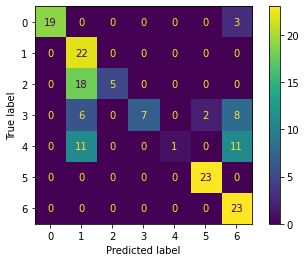

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization, concatenate)
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.utils import resample

# GPU bellek büyümesini aç
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

def adjust_frames(frames, target_frames=128):
    current_len = len(frames)
    if current_len > target_frames:
        indices = np.linspace(0, current_len - 1, target_frames).astype(int)
        return [frames[i] for i in indices]
    elif current_len < target_frames:
        frames += [frames[-1]] * (target_frames - current_len)
    return frames

def load_data_synchronized(radar_folder, camera_folder, radar_class_map, camera_class_map, target_size=(64, 64), num_frames=128):
    radar_data, camera_data, labels = [], [], []
    for label, radar_idx in radar_class_map.items():
        if label not in camera_class_map:
            continue

        camera_idx = camera_class_map[label]
        radar_label_path = os.path.join(radar_folder, label)
        camera_label_path = os.path.join(camera_folder, label)

        if os.path.isdir(radar_label_path) and os.path.isdir(camera_label_path):
            radar_subfolders = sorted(os.listdir(radar_label_path))[:180]  # Her sınıf için 180 klasör seçiliyor
            camera_subfolders = sorted(os.listdir(camera_label_path))
            
            for radar_subfolder, camera_subfolder in zip(radar_subfolders, camera_subfolders):
                radar_subfolder_path = os.path.join(radar_label_path, radar_subfolder)
                camera_subfolder_path = os.path.join(camera_label_path, camera_subfolder)
                
                if os.path.isdir(radar_subfolder_path) and os.path.isdir(camera_subfolder_path):
                    radar_frames, camera_frames = [], []
                    
                    for radar_file, camera_file in zip(sorted(os.listdir(radar_subfolder_path)),
                                                       sorted(os.listdir(camera_subfolder_path))):
                        radar_file_path = os.path.join(radar_subfolder_path, radar_file)
                        camera_file_path = os.path.join(camera_subfolder_path, camera_file)
                        try:
                            radar_img = load_img(radar_file_path, target_size=target_size)
                            camera_img = load_img(camera_file_path, target_size=target_size)
                            
                            radar_frames.append(img_to_array(radar_img).astype('float32') / 255.0)
                            camera_frames.append(img_to_array(camera_img).astype('float32') / 255.0)
                        except Exception as e:
                            print(f"Error loading images {radar_file_path} or {camera_file_path}: {e}")
                    
                    if radar_frames and camera_frames:
                        radar_data.append(np.array(adjust_frames(radar_frames, num_frames)))
                        camera_data.append(np.array(adjust_frames(camera_frames, num_frames)))
                        labels.append(radar_idx)
    
    radar_data = np.array(radar_data, dtype='float32')
    camera_data = np.array(camera_data, dtype='float32')
    labels = np.array(labels)
    return radar_data, camera_data, labels

# Sınıflar için etiket haritası
radar_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5,
    "su icme sol": 6
}

camera_class_map = radar_class_map

# Radar ve kamera verilerini yükleme
radar_data, camera_data, labels = load_data_synchronized(
    radar_folder=r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik", 
    camera_folder=r"C:\Users\Hp\Desktop\captured_frames",
    radar_class_map=radar_class_map, 
    camera_class_map=camera_class_map
)

# Sınıf dengesini sağlamak için verileri dengeleyin
def balance_classes(data, labels):
    unique_labels = np.unique(labels)
    balanced_data, balanced_labels = [], []

    min_class_count = min(np.sum(labels == l) for l in unique_labels)
    
    for label in unique_labels:
        class_indices = np.where(labels == label)[0]
        class_data = data[class_indices]
        
        if len(class_data) > min_class_count:
            class_data = resample(class_data, n_samples=min_class_count, random_state=42)
        balanced_data.extend(class_data)
        balanced_labels.extend([label] * min_class_count)
    
    balanced_data, balanced_labels = np.array(balanced_data), np.array(balanced_labels)
    shuffle_indices = np.random.permutation(len(balanced_labels))
    return balanced_data[shuffle_indices], balanced_labels[shuffle_indices]

balanced_radar_data, balanced_labels = balance_classes(radar_data, labels)
balanced_camera_data, _ = balance_classes(camera_data, labels)

# Eğitim ve test veri kümelerine bölme (Testte sadece radar verisi)
radar_train, radar_test, camera_train, _, train_labels, test_labels = train_test_split(
    balanced_radar_data, balanced_camera_data, balanced_labels, test_size=0.2, stratify=balanced_labels, random_state=42
)

train_labels_encoded = to_categorical(train_labels, num_classes=7)
test_labels_encoded = to_categorical(test_labels, num_classes=7)

# Model oluşturma fonksiyonu
def create_multi_input_model(num_classes=7):
    radar_input = Input(shape=(128, 64, 64, 3), name="radar_input")
    x_radar = Conv3D(64, (3, 3, 3), activation='relu')(radar_input)
    x_radar = BatchNormalization()(x_radar)
    x_radar = MaxPooling3D(pool_size=(2, 2, 2))(x_radar)
    x_radar = Dropout(0.3)(x_radar)
    x_radar = Conv3D(32, (3, 3, 3), activation='relu')(x_radar)
    x_radar = BatchNormalization()(x_radar)
    x_radar = MaxPooling3D(pool_size=(2, 2, 2))(x_radar)
    x_radar = Dropout(0.3)(x_radar)
    x_radar = Flatten()(x_radar)

    camera_input = Input(shape=(128, 64, 64, 3), name="camera_input")
    x_camera = Conv3D(64, (3, 3, 3), activation='relu')(camera_input)
    x_camera = BatchNormalization()(x_camera)
    x_camera = MaxPooling3D(pool_size=(2, 2, 2))(x_camera)
    x_camera = Dropout(0.3)(x_camera)
    x_camera = Conv3D(32, (3, 3, 3), activation='relu')(x_camera)
    x_camera = BatchNormalization()(x_camera)
    x_camera = MaxPooling3D(pool_size=(2, 2, 2))(x_camera)
    x_camera = Dropout(0.3)(x_camera)
    x_camera = Flatten()(x_camera)

    combined = concatenate([x_radar, x_camera])
    combined_output = Dense(num_classes, activation='softmax')(combined)

    model = Model(inputs=[radar_input, camera_input], outputs=combined_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model oluşturma ve eğitme
model = create_multi_input_model(num_classes=7)
history = model.fit(
    [radar_train, camera_train],
    train_labels_encoded,
    epochs=10,
    batch_size=2,
    validation_data=([radar_test, radar_test], test_labels_encoded)  # Testte sadece radar verisi
)

# Model değerlendirme
test_loss, test_acc = model.evaluate([radar_test, radar_test], test_labels_encoded)
print(f"Test accuracy: {test_acc}")

# Performans metrikleri
y_pred = model.predict([radar_test, radar_test], batch_size=2)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(test_labels_encoded, axis=1)

f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
mse = mean_squared_error(y_true_classes, y_pred_classes)
print(f"F1 Score: {f1}")
print(f"MSE: {mse}")

# Confusion Matrix
cm_test = confusion_matrix(y_true_classes, y_pred_classes)
ConfusionMatrixDisplay(cm_test).plot()
plt.show()


In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.config import list_physical_devices, set_logical_device_configuration, LogicalDeviceConfiguration

# GPU bellek kullanımını sınırla
gpus = list_physical_devices('GPU')
if gpus:
    try:
        set_logical_device_configuration(
            gpus[0],
            [LogicalDeviceConfiguration(memory_limit=4096)]
        )
    except RuntimeError as e:
        print(e)

# Çerçeve sayısını ayarlama
def adjust_frames(frames, target_frames=16):
    current_len = len(frames)
    if current_len > target_frames:
        indices = np.linspace(0, current_len - 1, target_frames).astype(int)
        return [frames[i] for i in indices]
    elif current_len < target_frames:
        frames += [frames[-1]] * (target_frames - current_len)
    return frames

# Veri yükleme fonksiyonu
def load_data_synchronized(radar_folder, camera_folder, radar_class_map, camera_class_map, target_size=(64, 64), num_frames=128):
    radar_data, camera_data, labels = [], [], []
    for label, radar_idx in radar_class_map.items():
        if label not in camera_class_map:
            continue

        radar_label_path = os.path.join(radar_folder, label)
        camera_label_path = os.path.join(camera_folder, label)

        if os.path.isdir(radar_label_path) and os.path.isdir(camera_label_path):
            radar_subfolders = sorted(os.listdir(radar_label_path))
            camera_subfolders = sorted(os.listdir(camera_label_path))
            
            for radar_subfolder, camera_subfolder in zip(radar_subfolders, camera_subfolders):
                radar_subfolder_path = os.path.join(radar_label_path, radar_subfolder)
                camera_subfolder_path = os.path.join(camera_label_path, camera_subfolder)
                
                if os.path.isdir(radar_subfolder_path) and os.path.isdir(camera_subfolder_path):
                    radar_frames, camera_frames = [], []
                    
                    for radar_file, camera_file in zip(
                        sorted(os.listdir(radar_subfolder_path)),
                        sorted(os.listdir(camera_subfolder_path))
                    ):
                        radar_file_path = os.path.join(radar_subfolder_path, radar_file)
                        camera_file_path = os.path.join(camera_subfolder_path, camera_file)
                        try:
                            radar_img = load_img(radar_file_path, target_size=target_size)
                            camera_img = load_img(camera_file_path, target_size=target_size)
                            
                            radar_frames.append(img_to_array(radar_img).astype('float32') / 255.0)
                            camera_frames.append(img_to_array(camera_img).astype('float32') / 255.0)
                        except Exception as e:
                            print(f"Error loading images {radar_file_path} or {camera_file_path}: {e}")
                    
                    if radar_frames and camera_frames:
                        radar_data.append(np.array(adjust_frames(radar_frames, num_frames)))
                        camera_data.append(np.array(adjust_frames(camera_frames, num_frames)))
                        labels.append(radar_idx)
    
    radar_data = np.array(radar_data, dtype='float32')
    camera_data = np.array(camera_data, dtype='float32')
    labels = np.array(labels)
    return radar_data, camera_data, labels

# Radar ve kamera verilerini yükleme
radar_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5,
    "su icme sol": 6
}
camera_class_map = radar_class_map

radar_data, camera_data, labels = load_data_synchronized(
    radar_folder="C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik", 
    camera_folder="C:/Users/Hp/Desktop/captured_frames",
    radar_class_map=radar_class_map, 
    camera_class_map=camera_class_map
)

# Veriyi yeniden boyutlandırma fonksiyonu
def resize_data(data, target_frames=16, target_size=(32, 32)):
    resized_data = []
    for video in data:
        frames = adjust_frames(video, target_frames=target_frames)
        resized_video = [tf.image.resize(frame, target_size).numpy() for frame in frames]
        resized_data.append(resized_video)
    return np.array(resized_data, dtype='float32')

# Verileri yeniden boyutlandır
radar_data_resized = resize_data(radar_data, target_frames=16, target_size=(32, 32))
camera_data_resized = resize_data(camera_data, target_frames=16, target_size=(32, 32))

# Verileri eğitim ve test olarak ayırma
radar_train, radar_test, camera_train, camera_test, train_labels, test_labels = train_test_split(
    radar_data_resized, camera_data_resized, labels, test_size=0.2, stratify=labels, random_state=42
)

# Etiketleri kategorik hale getirme
train_labels_encoded = to_categorical(train_labels, num_classes=7)
test_labels_encoded = to_categorical(test_labels, num_classes=7)

# Model Tanımlama
def create_model(input_shape_radar, input_shape_camera):
    # Radar Girişi
    radar_input = Input(shape=input_shape_radar, name='radar_input')
    radar_x = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(radar_input)
    radar_x = MaxPooling3D((2, 2, 2))(radar_x)
    radar_x = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(radar_x)
    radar_x = MaxPooling3D((2, 2, 2))(radar_x)
    radar_x = Flatten()(radar_x)
    
    # Kamera Girişi
    camera_input = Input(shape=input_shape_camera, name='camera_input')
    camera_x = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(camera_input)
    camera_x = MaxPooling3D((2, 2, 2))(camera_x)
    camera_x = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(camera_x)
    camera_x = MaxPooling3D((2, 2, 2))(camera_x)
    camera_x = Flatten()(camera_x)

    # Ortak Katman
    combined = concatenate([radar_x, camera_x])
    x = Dense(128, activation='relu')(combined)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    output = Dense(7, activation='softmax')(x)

    model = Model(inputs=[radar_input, camera_input], outputs=output)

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli oluştur
input_shape_radar = (16, 32, 32, 3)  # Radar veri boyutları (3 kanal)
input_shape_camera = (16, 32, 32, 3)  # Kamera veri boyutları (3 kanal)

model = create_model(input_shape_radar, input_shape_camera)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Modeli eğit
history = model.fit(
    [radar_train, camera_train], train_labels_encoded,
    batch_size=8,
    epochs=50,
    validation_data=([radar_test, camera_test], test_labels_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Modeli test et
test_loss, test_acc = model.evaluate([radar_test, camera_test], test_labels_encoded)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Epoch 1/50
110/110 [==============================] - 2s 11ms/step - loss: 1.7746 - accuracy: 0.2534 - val_loss: 1.2904 - val_accuracy: 0.3379
Epoch 2/50
110/110 [==============================] - 1s 8ms/step - loss: 1.1265 - accuracy: 0.4715 - val_loss: 0.8477 - val_accuracy: 0.6210
Epoch 3/50
110/110 [==============================] - 1s 8ms/step - loss: 0.8152 - accuracy: 0.6176 - val_loss: 0.6044 - val_accuracy: 0.7945
Epoch 4/50
110/110 [==============================] - 1s 8ms/step - loss: 0.6696 - accuracy: 0.6632 - val_loss: 0.5420 - val_accuracy: 0.7443
Epoch 5/50
110/110 [==============================] - 1s 8ms/step - loss: 0.5767 - accuracy: 0.7317 - val_loss: 0.4582 - val_accuracy: 0.8311
Epoch 6/50
110/110 [==============================] - 1s 8ms/step - loss: 0.4568 - accuracy: 0.8002 - val_loss: 0.2102 - val_accuracy: 0.9589
Epoch 7/50
110/110 [==============================] - 1s 7ms/step - loss: 0.3217 - accuracy: 0.8653 - val_loss: 0.1218 - val_accuracy: 0.9863
Epoch

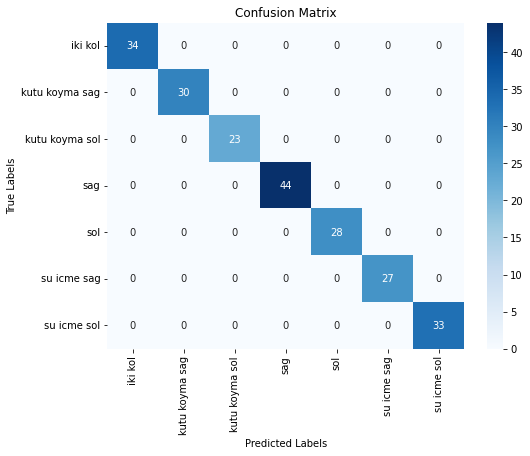

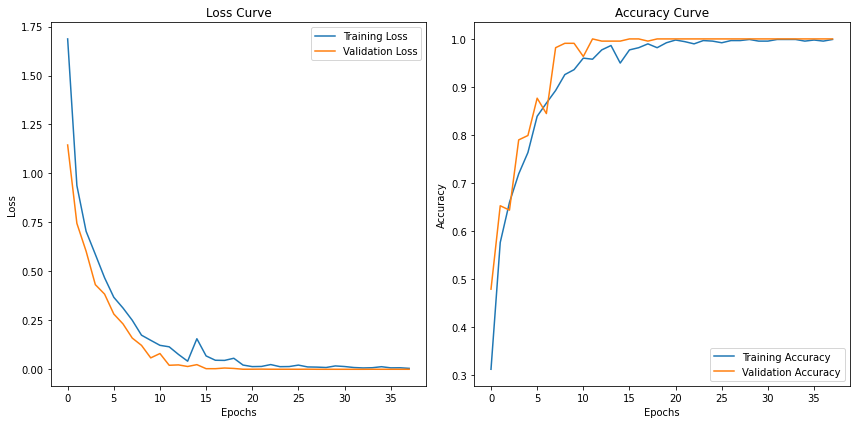

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf

# Test seti üzerinde tahminler yapma
test_predictions = model.predict([radar_test, camera_test])

# En yüksek olasılıkla tahmin edilen sınıfları al
predicted_labels = np.argmax(test_predictions, axis=1)
true_labels = np.argmax(test_labels_encoded, axis=1)

# Confusion Matrix'i hesapla
cm = confusion_matrix(true_labels, predicted_labels)

# Confusion Matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=radar_class_map.keys(), yticklabels=radar_class_map.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Eğitim geçmişinden kayıp ve doğruluk eğrisini çizdirme
history_dict = history.history

# Kayıp eğrisini çizdirme
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Doğruluk eğrisini çizdirme
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.config import list_physical_devices, set_logical_device_configuration, LogicalDeviceConfiguration

# GPU bellek kullanımını sınırla
gpus = list_physical_devices('GPU')
if gpus:
    try:
        set_logical_device_configuration(
            gpus[0],
            [LogicalDeviceConfiguration(memory_limit=4096)]
        )
    except RuntimeError as e:
        print(e)

# Çerçeve sayısını ayarlama
def adjust_frames(frames, target_frames=16):
    current_len = len(frames)
    if current_len > target_frames:
        indices = np.linspace(0, current_len - 1, target_frames).astype(int)
        return [frames[i] for i in indices]
    elif current_len < target_frames:
        frames += [frames[-1]] * (target_frames - current_len)
    return frames

# Veri yükleme fonksiyonu
def load_data_synchronized(radar_folder, camera_folder, radar_class_map, camera_class_map, target_size=(64, 64), num_frames=128):
    radar_data, camera_data, labels = [], [], []
    for label, radar_idx in radar_class_map.items():
        if label not in camera_class_map:
            continue

        radar_label_path = os.path.join(radar_folder, label)
        camera_label_path = os.path.join(camera_folder, label)

        if os.path.isdir(radar_label_path) and os.path.isdir(camera_label_path):
            radar_subfolders = sorted(os.listdir(radar_label_path))
            camera_subfolders = sorted(os.listdir(camera_label_path))
            
            for radar_subfolder, camera_subfolder in zip(radar_subfolders, camera_subfolders):
                radar_subfolder_path = os.path.join(radar_label_path, radar_subfolder)
                camera_subfolder_path = os.path.join(camera_label_path, camera_subfolder)
                
                if os.path.isdir(radar_subfolder_path) and os.path.isdir(camera_subfolder_path):
                    radar_frames, camera_frames = [], []
                    
                    for radar_file, camera_file in zip(
                        sorted(os.listdir(radar_subfolder_path)),
                        sorted(os.listdir(camera_subfolder_path))
                    ):
                        radar_file_path = os.path.join(radar_subfolder_path, radar_file)
                        camera_file_path = os.path.join(camera_subfolder_path, camera_file)
                        try:
                            radar_img = load_img(radar_file_path, target_size=target_size)
                            camera_img = load_img(camera_file_path, target_size=target_size)
                            
                            radar_frames.append(img_to_array(radar_img).astype('float32') / 255.0)
                            camera_frames.append(img_to_array(camera_img).astype('float32') / 255.0)
                        except Exception as e:
                            print(f"Error loading images {radar_file_path} or {camera_file_path}: {e}")
                    
                    if radar_frames and camera_frames:
                        radar_data.append(np.array(adjust_frames(radar_frames, num_frames)))
                        camera_data.append(np.array(adjust_frames(camera_frames, num_frames)))
                        labels.append(radar_idx)
    
    radar_data = np.array(radar_data, dtype='float32')
    camera_data = np.array(camera_data, dtype='float32')
    labels = np.array(labels)
    return radar_data, camera_data, labels

# Radar ve kamera verilerini yükleme
radar_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5,
    "su icme sol": 6
}
camera_class_map = radar_class_map

radar_data, camera_data, labels = load_data_synchronized(
    radar_folder="C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik", 
    camera_folder="C:/Users/Hp/Desktop/captured_frames",
    radar_class_map=radar_class_map, 
    camera_class_map=camera_class_map
)

# Veriyi yeniden boyutlandırma fonksiyonu
def resize_data(data, target_frames=16, target_size=(32, 32)):
    resized_data = []
    for video in data:
        frames = adjust_frames(video, target_frames=target_frames)
        resized_video = [tf.image.resize(frame, target_size).numpy() for frame in frames]
        resized_data.append(resized_video)
    return np.array(resized_data, dtype='float32')

# Verileri yeniden boyutlandır
radar_data_resized = resize_data(radar_data, target_frames=16, target_size=(32, 32))
camera_data_resized = resize_data(camera_data, target_frames=16, target_size=(32, 32))

# Verileri eğitim ve test olarak ayırma
radar_train, radar_test, camera_train, camera_test, train_labels, test_labels = train_test_split(
    radar_data_resized, camera_data_resized, labels, test_size=0.2, stratify=labels, random_state=42
)

# Etiketleri kategorik hale getirme
train_labels_encoded = to_categorical(train_labels, num_classes=7)
test_labels_encoded = to_categorical(test_labels, num_classes=7)

# Model oluşturma fonksiyonu
def create_multi_input_model(num_classes=7):
    radar_input = Input(shape=(128, 64, 64, 3), name="radar_input")
    x_radar = Conv3D(64, (3, 3, 3), activation='relu')(radar_input)
    x_radar = BatchNormalization()(x_radar)
    x_radar = MaxPooling3D(pool_size=(2, 2, 2))(x_radar)
    x_radar = Dropout(0.3)(x_radar)
    x_radar = Conv3D(32, (3, 3, 3), activation='relu')(x_radar)
    x_radar = BatchNormalization()(x_radar)
    x_radar = MaxPooling3D(pool_size=(2, 2, 2))(x_radar)
    x_radar = Dropout(0.3)(x_radar)
    x_radar = Flatten()(x_radar)

    camera_input = Input(shape=(128, 64, 64, 3), name="camera_input")
    x_camera = Conv3D(64, (3, 3, 3), activation='relu')(camera_input)
    x_camera = BatchNormalization()(x_camera)
    x_camera = MaxPooling3D(pool_size=(2, 2, 2))(x_camera)
    x_camera = Dropout(0.3)(x_camera)
    x_camera = Conv3D(32, (3, 3, 3), activation='relu')(x_camera)
    x_camera = BatchNormalization()(x_camera)
    x_camera = MaxPooling3D(pool_size=(2, 2, 2))(x_camera)
    x_camera = Dropout(0.3)(x_camera)
    x_camera = Flatten()(x_camera)

    combined = concatenate([x_radar, x_camera])
    combined_output = Dense(num_classes, activation='softmax')(combined)

    model = Model(inputs=[radar_input, camera_input], outputs=combined_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modeli oluştur
input_shape_radar = (16, 32, 32, 3)  # Radar veri boyutları (3 kanal)
input_shape_camera = (16, 32, 32, 3)  # Kamera veri boyutları (3 kanal)

model = create_model(input_shape_radar, input_shape_camera)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Modeli eğit
history = model.fit(
    [radar_train, camera_train], train_labels_encoded,
    batch_size=8,
    epochs=50,
    validation_data=([radar_test, camera_test], test_labels_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Modeli test et
test_loss, test_acc = model.evaluate([radar_test, camera_test], test_labels_encoded)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Epoch 1/50
110/110 [==============================] - 1s 10ms/step - loss: 1.7236 - accuracy: 0.2432 - val_loss: 1.0544 - val_accuracy: 0.4977
Epoch 2/50
110/110 [==============================] - 1s 8ms/step - loss: 1.1197 - accuracy: 0.4886 - val_loss: 0.8665 - val_accuracy: 0.5571
Epoch 3/50
110/110 [==============================] - 1s 8ms/step - loss: 0.8112 - accuracy: 0.6244 - val_loss: 0.6190 - val_accuracy: 0.6758
Epoch 4/50
110/110 [==============================] - 1s 8ms/step - loss: 0.6027 - accuracy: 0.7112 - val_loss: 0.4846 - val_accuracy: 0.8174
Epoch 5/50
110/110 [==============================] - 1s 8ms/step - loss: 0.4711 - accuracy: 0.7842 - val_loss: 0.3747 - val_accuracy: 0.8174
Epoch 6/50
110/110 [==============================] - 1s 8ms/step - loss: 0.3825 - accuracy: 0.8333 - val_loss: 0.2445 - val_accuracy: 0.8721
Epoch 7/50
110/110 [==============================] - 1s 7ms/step - loss: 0.2957 - accuracy: 0.8813 - val_loss: 0.1599 - val_accuracy: 0.9452
Epoch

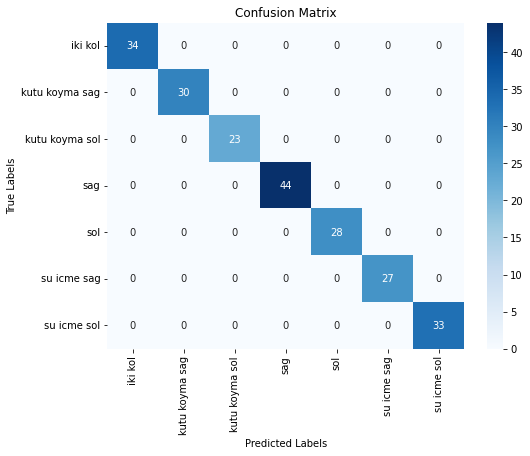

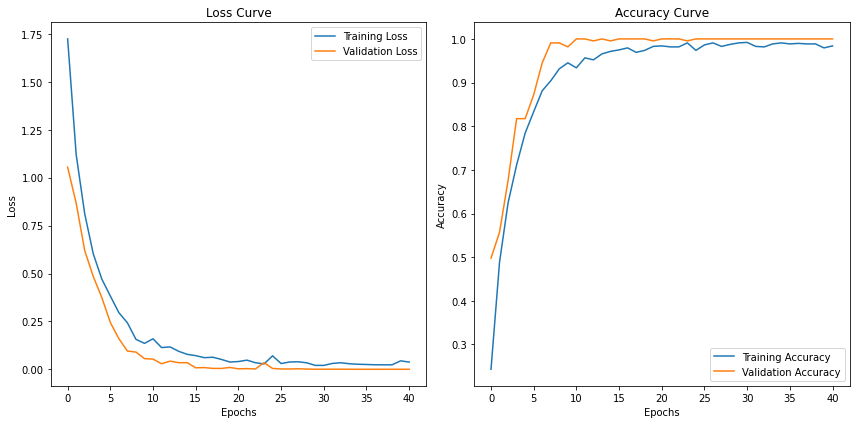

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf

# Test seti üzerinde tahminler yapma
test_predictions = model.predict([radar_test, camera_test])

# En yüksek olasılıkla tahmin edilen sınıfları al
predicted_labels = np.argmax(test_predictions, axis=1)
true_labels = np.argmax(test_labels_encoded, axis=1)

# Confusion Matrix'i hesapla
cm = confusion_matrix(true_labels, predicted_labels)

# Confusion Matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=radar_class_map.keys(), yticklabels=radar_class_map.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Eğitim geçmişinden kayıp ve doğruluk eğrisini çizdirme
history_dict = history.history

# Kayıp eğrisini çizdirme
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Doğruluk eğrisini çizdirme
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Disables all GPUs
import tensorflow as tf


Epoch 1/50
81/81 [==============================] - 1s 9ms/step - loss: 1.5602 - accuracy: 0.3889 - val_loss: 0.8102 - val_accuracy: 0.5870
Epoch 2/50
81/81 [==============================] - 1s 8ms/step - loss: 0.7885 - accuracy: 0.6343 - val_loss: 0.5487 - val_accuracy: 0.7391
Epoch 3/50
81/81 [==============================] - 1s 7ms/step - loss: 0.5077 - accuracy: 0.7685 - val_loss: 0.3921 - val_accuracy: 0.7935
Epoch 4/50
81/81 [==============================] - 1s 7ms/step - loss: 0.4041 - accuracy: 0.8349 - val_loss: 0.5084 - val_accuracy: 0.7935
Epoch 5/50
81/81 [==============================] - 1s 7ms/step - loss: 0.3119 - accuracy: 0.8781 - val_loss: 0.2226 - val_accuracy: 0.8587
Epoch 6/50
81/81 [==============================] - 1s 7ms/step - loss: 0.2392 - accuracy: 0.8966 - val_loss: 0.1183 - val_accuracy: 0.9674
Epoch 7/50
81/81 [==============================] - 1s 7ms/step - loss: 0.1676 - accuracy: 0.9383 - val_loss: 0.1336 - val_accuracy: 0.9022
Epoch 8/50
81/81 [==

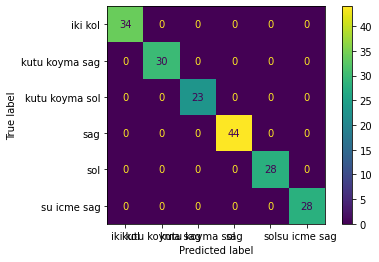

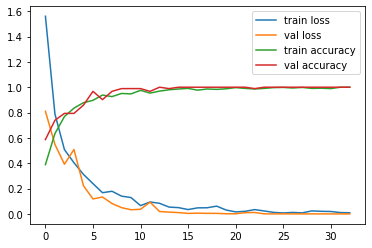

In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# GPU memory limitation
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Adjust frames to match target frames (16)
def adjust_frames(frames, target_frames=16):
    current_len = len(frames)
    if current_len > target_frames:
        indices = np.linspace(0, current_len - 1, target_frames).astype(int)
        return [frames[i] for i in indices]
    elif current_len < target_frames:
        frames += [frames[-1]] * (target_frames - current_len)
    return frames

# Load synchronized radar and camera data
def load_data_synchronized(radar_folder, camera_folder, radar_class_map, target_size=(64, 64), num_frames=16):
    radar_data, camera_data, labels = [], [], []
    for label, radar_idx in radar_class_map.items():
        radar_label_path = os.path.join(radar_folder, label)
        camera_label_path = os.path.join(camera_folder, label)

        if os.path.isdir(radar_label_path) and os.path.isdir(camera_label_path):
            radar_subfolders = sorted(os.listdir(radar_label_path))
            camera_subfolders = sorted(os.listdir(camera_label_path))
            
            for radar_subfolder, camera_subfolder in zip(radar_subfolders, camera_subfolders):
                radar_subfolder_path = os.path.join(radar_label_path, radar_subfolder)
                camera_subfolder_path = os.path.join(camera_label_path, camera_subfolder)
                
                radar_frames, camera_frames = [], []
                
                for radar_file, camera_file in zip(
                    sorted(os.listdir(radar_subfolder_path)),
                    sorted(os.listdir(camera_subfolder_path))
                ):
                    radar_file_path = os.path.join(radar_subfolder_path, radar_file)
                    camera_file_path = os.path.join(camera_subfolder_path, camera_file)
                    try:
                        radar_img = load_img(radar_file_path, target_size=target_size)
                        camera_img = load_img(camera_file_path, target_size=target_size)
                        
                        radar_frames.append(img_to_array(radar_img) / 255.0)
                        camera_frames.append(img_to_array(camera_img) / 255.0)
                    except Exception as e:
                        print(f"Error loading images {radar_file_path} or {camera_file_path}: {e}")
                
                if radar_frames and camera_frames:
                    radar_data.append(np.array(adjust_frames(radar_frames, num_frames)))
                    camera_data.append(np.array(adjust_frames(camera_frames, num_frames)))
                    labels.append(radar_idx)
    
    radar_data = np.array(radar_data, dtype='float32')
    camera_data = np.array(camera_data, dtype='float32')
    labels = np.array(labels)
    return radar_data, camera_data, labels

# Class map for labels
radar_class_map = {
    "iki kol": 0,
    "kutu koyma sag": 1,
    "kutu koyma sol": 2,
    "sag": 3,
    "sol": 4,
    "su icme sag": 5
}

# Load data
radar_data, camera_data, labels = load_data_synchronized(
    radar_folder="C:/Users/Hp/Desktop/08.07.2024 kol veriler/hepsi_grafik", 
    camera_folder="C:/Users/Hp/Desktop/captured_frames",
    radar_class_map=radar_class_map
)

# Resize to (32, 32)
def resize_data(data, target_frames=16, target_size=(32, 32)):
    resized_data = []
    for video in data:
        frames = adjust_frames(video, target_frames=target_frames)
        resized_video = [tf.image.resize(frame, target_size).numpy() for frame in frames]
        resized_data.append(resized_video)
    return np.array(resized_data, dtype='float32')

# Resize radar and camera data
radar_data_resized = resize_data(radar_data, target_frames=16, target_size=(32, 32))
camera_data_resized = resize_data(camera_data, target_frames=16, target_size=(32, 32))

# Split data
radar_train, radar_temp, camera_train, camera_temp, train_labels, temp_labels = train_test_split(
    radar_data_resized, camera_data_resized, labels, test_size=0.3, stratify=labels, random_state=42
)
radar_val, radar_test, camera_val, camera_test, val_labels, test_labels = train_test_split(
    radar_temp, camera_temp, temp_labels, test_size=0.6667, stratify=temp_labels, random_state=42
)

# Encode labels
train_labels_encoded = to_categorical(train_labels, num_classes=6)
val_labels_encoded = to_categorical(val_labels, num_classes=6)
test_labels_encoded = to_categorical(test_labels, num_classes=6)

# Model definition
def create_model(input_shape_radar, input_shape_camera):
    radar_input = Input(shape=input_shape_radar, name='radar_input')
    radar_x = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(radar_input)
    radar_x = MaxPooling3D((2, 2, 2))(radar_x)
    radar_x = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(radar_x)
    radar_x = MaxPooling3D((2, 2, 2))(radar_x)
    radar_x = Flatten()(radar_x)
    
    camera_input = Input(shape=input_shape_camera, name='camera_input')
    camera_x = Conv3D(32, (3, 3, 3), activation='relu', padding='same')(camera_input)
    camera_x = MaxPooling3D((2, 2, 2))(camera_x)
    camera_x = Conv3D(64, (3, 3, 3), activation='relu', padding='same')(camera_x)
    camera_x = MaxPooling3D((2, 2, 2))(camera_x)
    camera_x = Flatten()(camera_x)

    combined = concatenate([radar_x, camera_x])
    x = Dense(128, activation='relu')(combined)
    x = Dropout(0.5)(x)
    output = Dense(6, activation='softmax')(x)

    model = Model(inputs=[radar_input, camera_input], outputs=output)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize and train model
model = create_model((16, 32, 32, 3), (16, 32, 32, 3))
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

history = model.fit(
    [radar_train, camera_train], train_labels_encoded,
    batch_size=8, epochs=50,
    validation_data=([radar_val, camera_val], val_labels_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate model
test_loss, test_acc = model.evaluate([radar_test, camera_test], test_labels_encoded)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

# Confusion matrix
y_pred = np.argmax(model.predict([radar_test, camera_test]), axis=1)
y_true = np.argmax(test_labels_encoded, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix and loss/accuracy
ConfusionMatrixDisplay(conf_matrix, display_labels=radar_class_map.keys()).plot()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()


In [ ]:
#Veri Yükleme ve Etiketleme

In [25]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Verileri yükleme fonksiyonu
def load_sequential_data(base_dir, classes, color_mode="grayscale", target_size=(128, 128)):
    sequences = []
    labels = []
    for class_name in classes:
        class_dir = os.path.join(base_dir, class_name)
        
        # Ana klasör mevcutsa devam et
        if os.path.exists(class_dir):
            print(f"{class_name} klasörü işleniyor...")
            for subdir, _, files in os.walk(class_dir):  # Alt klasörleri dolaş
                if len(files) == 128:  # Her alt klasörde 128 görsel varsa
                    sequence = []
                    files = sorted(files)  # Görsellerin sırasını koru
                    for file_name in files:
                        file_path = os.path.join(subdir, file_name)
                        if file_name.endswith(".png") or file_name.endswith(".jpg"):
                            try:
                                if color_mode == "grayscale":
                                    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                                else:
                                    image = cv2.imread(file_path, cv2.IMREAD_COLOR)
                                
                                if image is None:
                                    print(f"Hata: {file_path} dosyası okunamadı.")
                                    continue
                                
                                # Görüntüyü yeniden boyutlandır
                                image = cv2.resize(image, target_size)
                                sequence.append(image)
                            except Exception as e:
                                print(f"Okuma hatası: {file_path}, Hata: {e}")
                    
                    if len(sequence) == 128:  # Tam bir sekans oluşturulduysa ekle
                        sequences.append(np.array(sequence))
                        labels.append(class_name)
                        print(f"{os.path.basename(subdir)} klasöründen 128 görsel içeren bir sekans yüklendi.")
        else:
            print(f"{class_name} için klasör bulunamadı: {class_dir}")
    
    return np.array(sequences), np.array(labels)

# Ana dizin yolları
radar_dir = r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik"
camera_dir = r"C:\Users\Hp\Desktop\captured_frames"

# Kullanılacak sınıf etiketleri
classes = ["iki kol", "kutu koyma sag", "kutu koyma sol", "sag", "sol", "su icme sag", "su icme sol"]

# Radar ve kamera verilerini yükleme
radar_sequences, radar_labels = load_sequential_data(radar_dir, classes, color_mode="grayscale", target_size=(128, 128))
camera_sequences, camera_labels = load_sequential_data(camera_dir, classes, color_mode="color", target_size=(128, 128))

# Eğer veriler yüklenmediyse hata ver ve dur
if radar_sequences.shape[0] == 0 or camera_sequences.shape[0] == 0:
    raise ValueError("Veriler yüklenmedi, kontrol edin.")

# Etiketleri sayısal hale getirme
label_encoder = LabelEncoder()
radar_labels_encoded = label_encoder.fit_transform(radar_labels)
camera_labels_encoded = label_encoder.transform(camera_labels)

# Verileri 5D tensör formatına dönüştürme (örneğin, (num_samples, 128, 128, 128, 1) ve (num_samples, 128, 128, 128, 3))
radar_sequences = radar_sequences.reshape(radar_sequences.shape[0], 128, 128, 128, 1).astype('float16') / 255.0
camera_sequences = camera_sequences.reshape(camera_sequences.shape[0], 128, 128, 128, 3).astype('float16') / 255.0

# Eğitim, doğrulama ve test setlerine ayırma
radar_train, radar_temp, camera_train, camera_temp, train_labels, temp_labels = train_test_split(
    radar_sequences, camera_sequences, radar_labels_encoded, test_size=0.3333, random_state=42, stratify=radar_labels_encoded
)
radar_val, radar_test, camera_val, camera_test, val_labels, test_labels = train_test_split(
    radar_temp, camera_temp, temp_labels, test_size=0.6667, random_state=42, stratify=temp_labels
)

# Eğitim seti boyutlarını yazdırma
print(f"Radar Train samples: {radar_train.shape[0]}, Camera Train samples: {camera_train.shape[0]}")
print(f"Radar Validation samples: {radar_val.shape[0]}, Camera Validation samples: {camera_val.shape[0]}")
print(f"Radar Test samples: {radar_test.shape[0]}, Camera Test samples: {camera_test.shape[0]}")

# Verilerin hazır olduğunu onayla
print("Radar ve kamera verileri başarıyla yüklendi ve bölümlere ayrıldı!")


iki kol klasörü işleniyor...
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\5.7.24. Zehra 2 kol kaldırma\RangeDoppler_0.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\5.7.24. Zehra 2 kol kaldırma\RangeDoppler_1.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\5.7.24. Zehra 2 kol kaldırma\RangeDoppler_10.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\5.7.24. Zehra 2 kol kaldırma\RangeDoppler_100.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\5.7.24. Zehra 2 kol kaldırma\RangeDoppler_101.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\5.7.24. Zehra 2 kol kaldırma\RangeDoppler_102.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\5.7.24. Zehra 2 kol kaldırma\RangeDoppler_103.png dosyası okunamadı.
Hat

Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132552\RangeDoppler_6.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132552\RangeDoppler_60.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132552\RangeDoppler_61.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132552\RangeDoppler_62.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132552\RangeDoppler_63.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132552\RangeDoppler_64.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132552\RangeDoppler_65.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08

Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132614\RangeDoppler_50.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132614\RangeDoppler_51.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132614\RangeDoppler_52.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132614\RangeDoppler_53.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132614\RangeDoppler_54.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132614\RangeDoppler_55.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132614\RangeDoppler_56.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\0

Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132641\RangeDoppler_24.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132641\RangeDoppler_25.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132641\RangeDoppler_26.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132641\RangeDoppler_27.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132641\RangeDoppler_28.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132641\RangeDoppler_29.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132641\RangeDoppler_3.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08

Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132801\RangeDoppler_103.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132801\RangeDoppler_104.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132801\RangeDoppler_105.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132801\RangeDoppler_106.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132801\RangeDoppler_107.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132801\RangeDoppler_108.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132801\RangeDoppler_109.png dosyası okunamadı.
Hata: C:\Users\Hp\De

Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132817\RangeDoppler_69.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132817\RangeDoppler_7.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132817\RangeDoppler_70.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132817\RangeDoppler_71.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132817\RangeDoppler_72.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132817\RangeDoppler_73.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132817\RangeDoppler_74.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08

Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133052\RangeDoppler_1.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133052\RangeDoppler_10.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133052\RangeDoppler_100.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133052\RangeDoppler_101.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133052\RangeDoppler_102.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133052\RangeDoppler_103.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133052\RangeDoppler_104.png dosyası okunamadı.
Hata: C:\Users\Hp\Deskt

Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133106\RangeDoppler_77.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133106\RangeDoppler_78.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133106\RangeDoppler_79.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133106\RangeDoppler_8.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133106\RangeDoppler_80.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133106\RangeDoppler_81.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133106\RangeDoppler_82.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08

Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133131\RangeDoppler_98.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133131\RangeDoppler_99.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133149\RangeDoppler_0.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133149\RangeDoppler_1.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133149\RangeDoppler_10.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133149\RangeDoppler_100.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133149\RangeDoppler_101.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\0

Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133205\RangeDoppler_93.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133205\RangeDoppler_94.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133205\RangeDoppler_95.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133205\RangeDoppler_96.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133205\RangeDoppler_97.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133205\RangeDoppler_98.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133205\RangeDoppler_99.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\0

Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133256\RangeDoppler_102.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133256\RangeDoppler_103.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133256\RangeDoppler_104.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133256\RangeDoppler_105.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133256\RangeDoppler_106.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133256\RangeDoppler_107.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133256\RangeDoppler_108.png dosyası okunamadı.
Hata: C:\Users\Hp\De

Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133306\RangeDoppler_85.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133306\RangeDoppler_86.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133306\RangeDoppler_87.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133306\RangeDoppler_88.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133306\RangeDoppler_89.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133306\RangeDoppler_9.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133306\RangeDoppler_90.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08

Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133346\RangeDoppler_22.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133346\RangeDoppler_23.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133346\RangeDoppler_24.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133346\RangeDoppler_25.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133346\RangeDoppler_26.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133346\RangeDoppler_27.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133346\RangeDoppler_28.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\0

ebrar_iki_kol20240709_143117 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_iki_kol20240709_143132 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_iki_kol20240709_143142 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_iki_kol20240709_143154 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_iki_kol20240709_143204 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_iki_kol20240709_143216 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_iki_kol20240709_143228 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_iki_kol20240709_143240 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_iki_kol20240709_143248 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_iki_kol20240709_143256 klasöründen 128 görsel içeren bir sekans yüklendi.
meliksah_iki_kol_20240708_113215 klasöründen 128 görsel içeren bir sekans yüklendi.
meliksah_iki_kol_20240708_113233 klasöründen 128 görsel içeren bir sekans yüklendi.
meliksah_iki_kol_20240708_113245

meliksah_iki_kol_20240708_122814 klasöründen 128 görsel içeren bir sekans yüklendi.
meliksah_iki_kol_20240708_122824 klasöründen 128 görsel içeren bir sekans yüklendi.
meliksah_iki_kol_20240708_122838 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra iki kol20240705_165255 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra iki kol20240705_165505 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra iki kol20240705_165807 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra iki kol20240705_165913 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_iki_kol_20240708_103716 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_iki_kol_20240708_104238 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_iki_kol_20240708_104341 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_iki_kol_20240708_104449 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_iki_kol_20240708_104611 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_iki_kol_20240708_

zehra_iki_kol_20240708_114839 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_iki_kol_20240708_114851 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_iki_kol_20240708_114903 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_iki_kol_20240708_114915 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_iki_kol_20240708_114927 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_iki_kol_20240708_114937 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_iki_kol_20240708_114948 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_iki_kol_20240708_114958 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_iki_kol_20240708_115010 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_iki_kol_20240708_122926 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_iki_kol_20240708_122937 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_iki_kol_20240708_122947 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_iki_kol_20240708_12295

ebrar_kutu_koyma_sag_kol20240709_114925 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_kutu_koyma_sag_kol20240709_114939 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_kutu_koyma_sag_kol20240709_114950 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_kutu_koyma_sag_kol20240709_115002 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_kutu_koyma_sag_kol20240709_115018 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_kutu_koyma_sag_kol20240709_115030 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_kutu_koyma_sag_kol20240709_115040 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_kutu_koyma_sag_kol20240709_115120 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_kutu_koyma_sag_kol20240709_115138 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_kutu_koyma_sag_kol20240709_115150 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_kutu_koyma_sag_kol20240709_115203 klasöründen 128 görsel içeren bir sekans yüklendi.

Sebahattin20240928_151217 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_151230 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_151241 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_151252 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_151329 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_151340 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_151355 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_151411 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_151420 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_151431 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_151442 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_151453 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_151504 klasöründen 128 görsel içeren bir sekans yüklendi.

zehra_kutu_koyma_sag_kol20240709_111643 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_kutu_koyma_sag_kol20240709_111655 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_kutu_koyma_sag_kol20240709_111705 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_kutu_koyma_sag_kol20240709_111715 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_kutu_koyma_sag_kol20240709_111725 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_kutu_koyma_sag_kol20240709_111738 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_kutu_koyma_sag_kol20240709_111750 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_kutu_koyma_sag_kol20240709_111802 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_kutu_koyma_sag_kol20240709_111812 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_kutu_koyma_sag_kol20240709_111822 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_kutu_koyma_sag_kol20240709_111832 klasöründen 128 görsel içeren bir sekans yüklendi.

ebrar_kutu_koyma_sol_kol20240709_124340 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_kutu_koyma_sol_kol20240709_124352 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_kutu_koyma_sol_kol20240709_124405 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_kutu_koyma_sol_kol20240709_124417 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_kutu_koyma_sol_kol20240709_124429 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_kutu_koyma_sol_kol20240709_124443 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_kutu_koyma_sol_kol20240709_124451 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_kutu_koyma_sol_kol20240709_124503 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_kutu_koyma_sol_kol20240709_124515 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_kutu_koyma_sol_kol20240709_124527 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_kutu_koyma_sol_kol20240709_124537 klasöründen 128 görsel içeren bir sekans yüklendi.

Sebahattin20240928_150556 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_150609 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_150634 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_150712 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_150903 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_150947 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_150956 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_151009 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_151022 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_151031 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_151054 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_151131 klasöründen 128 görsel içeren bir sekans yüklendi.
Sebahattin20240928_151151 klasöründen 128 görsel içeren bir sekans yüklendi.

sebahattin_sol_kol20241005_141956 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_sol_kol20241005_142005 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_sol_kol20241005_142015 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_sol_kol20241005_142025 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_sol_kol20241005_142035 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_sol_kol20241005_142045 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_sol_kol20241005_142055 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_sol_kol20241005_142103 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_sol_kol20241005_142114 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_sol_kol20241005_142132 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_sol_kol20241005_142142 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_sol_kol20241005_142150 klasöründen 128 görsel içeren b

sebahattin_su_icme_sag_kol20241005_171429 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_su_icme_sag_kol20241005_171439 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_su_icme_sag_kol20241005_171451 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_su_icme_sag_kol20241005_171459 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_su_icme_sag_kol20241005_171509 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_su_icme_sag_kol20241005_171518 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_su_icme_sag_kol20241005_171528 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_su_icme_sag_kol20241005_171538 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_su_icme_sag_kol20241005_171546 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_su_icme_sag_kol20241005_171556 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_kutu_koyma_sol_kol20240709_112930 klasöründen 128 görsel içeren 

Abdullah_GOKTURK_sag_3bin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Abdullah_GOKTURK_sag_4bin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Abdullah_GOKTURK_sag_5bin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Abdullah_Reveha_Sahinsag5bin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Abdullah_Reveha_Sahin_sag1bin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Abdullah_Reveha_Sahin_sag2bin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Abdullah_Reveha_Sahin_sag3bin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Abdullah_Reveha_Sahin_sag4bin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Abdullah_Reveha_Sahin_sag_1bin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Abdullah_Reveha_Sahin_sag_2bin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Abdullah_Reveha_Sahin_sag_3bin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Abdullah_Reveha_Sahin_sag_4bin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Abdullah_Reve

Berkehan_Burak_Sahin_sag_6_kinecklibin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Berkehan_Burak_Sahin_sag_7_kinecklibin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Berkehan_Burak_Sahin_sag_8_kinecklibin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Berkehan_Burak_Sahin_sag_9_kinecklibin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Berkehan_Burak_Sahin_sag_kol_kinecli_10bin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Berkehan_Burak_Sahin_sag_kol_kinecli_1bin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Berkehan_Burak_Sahin_sag_kol_kinecli_2bin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Berkehan_Burak_Sahin_sag_kol_kinecli_3bin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Berkehan_Burak_Sahin_sag_kol_kinecli_4bin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Berkehan_Burak_Sahin_sag_kol_kinecli_5bin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Berkehan_Burak_Sahin_sag_kol_kinecli_6bin_1 klasöründen 128 g

Emirkan_Utku_Demir_sag_2bin klasöründen 128 görsel içeren bir sekans yüklendi.
emirkan_utku_demir_sag_3bin klasöründen 128 görsel içeren bir sekans yüklendi.
Emirkan_Utku_Demir_sag_3bin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
emre_can_sag_128_3bin klasöründen 128 görsel içeren bir sekans yüklendi.
emre_can_sag_kol_128_1bin klasöründen 128 görsel içeren bir sekans yüklendi.
emre_can_sag_kol_128_2bin klasöründen 128 görsel içeren bir sekans yüklendi.
Emre_Can_Tuncer_sag_1bin klasöründen 128 görsel içeren bir sekans yüklendi.
Emre_Can_Tuncer_sag_2bin klasöründen 128 görsel içeren bir sekans yüklendi.
Emre_Can_Tuncer_sag_3bin klasöründen 128 görsel içeren bir sekans yüklendi.
Emre_Yavuz_sag_1bin klasöründen 128 görsel içeren bir sekans yüklendi.
Emre_Yavuz_sag_2bin klasöründen 128 görsel içeren bir sekans yüklendi.
Emre_Yavuz_sag_3bin klasöründen 128 görsel içeren bir sekans yüklendi.
enes_akar_sag_1bin klasöründen 128 görsel içeren bir sekans yüklendi.
enes_akar_sag_2bin klas

Kubilay_yazman_sag_kol_kinecli_9bin klasöründen 128 görsel içeren bir sekans yüklendi.
Mehmet_Mahir_Kayadelen_sag_10_kineckli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Mehmet_Mahir_Kayadelen_sag_1_kineckli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Mehmet_Mahir_Kayadelen_sag_2_kineckli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Mehmet_Mahir_Kayadelen_sag_3_kineckli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Mehmet_Mahir_Kayadelen_sag_4_kineckli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Mehmet_Mahir_Kayadelen_sag_5_kineckli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Mehmet_Mahir_Kayadelen_sag_6_kineckli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Mehmet_Mahir_Kayadelen_sag_7_kineckli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Mehmet_Mahir_Kayadelen_sag_8_kineckli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Mehmet_Mahir_Kayadelen_sag_9_kineckli_bin klasöründen 128 görsel içeren bir

Talha_Kaymak_sag_1bin klasöründen 128 görsel içeren bir sekans yüklendi.
Talha_Kaymak_sag_2bin klasöründen 128 görsel içeren bir sekans yüklendi.
Talha_Kaymak_sag_3bin klasöründen 128 görsel içeren bir sekans yüklendi.
Talha_Kaymak_sag_4bin klasöründen 128 görsel içeren bir sekans yüklendi.
Talha_Kaymak_sag_5bin klasöründen 128 görsel içeren bir sekans yüklendi.
Tayyip_Soner_Tekinsag_sag_2bin klasöründen 128 görsel içeren bir sekans yüklendi.
Tayyip_Soner_Tekinsag_sag_3bin klasöründen 128 görsel içeren bir sekans yüklendi.
Tayyip_Soner_Tekin_sag_1bin klasöründen 128 görsel içeren bir sekans yüklendi.
Tugce_Polat_sag_1bin klasöründen 128 görsel içeren bir sekans yüklendi.
Tugce_Polat_sag_2bin klasöründen 128 görsel içeren bir sekans yüklendi.
Tugce_Polat_sag_3bin klasöründen 128 görsel içeren bir sekans yüklendi.
Tugrul_yapici_sag_10_kineckli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Tugrul_Yapici_sag_1bin klasöründen 128 görsel içeren bir sekans yüklendi.
Tugrul_yapici_sag

Ahmet_Ozdemir_sol_10_kinectli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ahmet_Ozdemir_sol_1bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ahmet_Ozdemir_sol_1_kinectli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ahmet_Ozdemir_sol_2bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ahmet_Ozdemir_sol_2_kinectli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ahmet_Ozdemir_sol_3bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ahmet_Ozdemir_sol_3_kinectli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ahmet_Ozdemir_sol_4_kinectli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ahmet_Ozdemir_sol_5_kinectli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ahmet_Ozdemir_sol_6_kinectli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ahmet_Ozdemir_sol_7_kinectli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ahmet_Ozdemir_sol_8_kinectli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ahmet_Ozdemir_sol_9_k

Beyza_Acar_solkol_Kinecli_10bin klasöründen 128 görsel içeren bir sekans yüklendi.
Beyza_Acar_solkol_Kinecli_2bin klasöründen 128 görsel içeren bir sekans yüklendi.
Beyza_Acar_solkol_Kinecli_3bin klasöründen 128 görsel içeren bir sekans yüklendi.
Beyza_Acar_solkol_Kinecli_4bin klasöründen 128 görsel içeren bir sekans yüklendi.
Beyza_Acar_solkol_Kinecli_5bin klasöründen 128 görsel içeren bir sekans yüklendi.
Beyza_Acar_solkol_Kinecli_6bin klasöründen 128 görsel içeren bir sekans yüklendi.
Beyza_Acar_solkol_Kinecli_7bin klasöründen 128 görsel içeren bir sekans yüklendi.
Beyza_Acar_solkol_Kinecli_8bin klasöründen 128 görsel içeren bir sekans yüklendi.
Beyza_Acar_solkol_Kinecli_9bin klasöründen 128 görsel içeren bir sekans yüklendi.
Beyza_Acar_solkol_Kinecli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Beyza_Acar_sol_10_kineckli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Beyza_Acar_sol_1bin klasöründen 128 görsel içeren bir sekans yüklendi.
Beyza_Acar_sol_1_kineckli_b

Ethem_Mengaaslan_sol_2bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ethem_Mengaaslan_sol_3bin klasöründen 128 görsel içeren bir sekans yüklendi.
ethem_sol_1bin klasöründen 128 görsel içeren bir sekans yüklendi.
ethem_sol_2bin klasöründen 128 görsel içeren bir sekans yüklendi.
ethem_sol_3bin klasöründen 128 görsel içeren bir sekans yüklendi.
Husniddin_Ramazanov_sol_1bin klasöründen 128 görsel içeren bir sekans yüklendi.
Husniddin_Ramazanov_sol_2bin klasöründen 128 görsel içeren bir sekans yüklendi.
Husniddin_Ramazanov_sol_3_bin klasöründen 128 görsel içeren bir sekans yüklendi.
husnittin_sol_1bin klasöründen 128 görsel içeren bir sekans yüklendi.
husnittin_sol_2bin klasöründen 128 görsel içeren bir sekans yüklendi.
husnittin_sol_3_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ilkay_Bolat_sol_10_kinectli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ilkay_Bolat_sol_1_kinectli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ilkay_Bolat_sol_2_kinectli_bin 

Mehmet_Mahir_Kayadelen_sol_5_kineckli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Mehmet_Mahir_Kayadelen_sol_6_kineckli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Mehmet_Mahir_Kayadelen_sol_7_kineckli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Mehmet_Mahir_Kayadelen_sol_8_kineckli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Mehmet_Mahir_Kayadelen_sol_9_kineckli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Melike_SEYITOGLU_sol2bin klasöründen 128 görsel içeren bir sekans yüklendi.
Melike_SEYITOGLU_sol3bin klasöründen 128 görsel içeren bir sekans yüklendi.
Melike_Seyitoglu_sol_1bin klasöründen 128 görsel içeren bir sekans yüklendi.
Melike_Seyitoglu_sol_2bin klasöründen 128 görsel içeren bir sekans yüklendi.
Melike_SEYITOGLU_sol_2bin_1 klasöründen 128 görsel içeren bir sekans yüklendi.
Melike_Seyitoglu_sol_3bin klasöründen 128 görsel içeren bir sekans yüklendi.
Melike_Seyitoglu_sol_4bin klasöründen 128 görsel içeren bir sekans yüklen

Sumeyye_Zeynep_Gurbuz_sol5bin klasöründen 128 görsel içeren bir sekans yüklendi.
Sumeyye_Zeynep_Gurbuz_sol_1bin klasöründen 128 görsel içeren bir sekans yüklendi.
Sumeyye_Zeynep_Gurbuz_sol_2bin klasöründen 128 görsel içeren bir sekans yüklendi.
Sumeyye_Zeynep_Gurbuz_sol_3bin klasöründen 128 görsel içeren bir sekans yüklendi.
Sumeyye_Zeynep_Gurbuz_sol_4bin klasöründen 128 görsel içeren bir sekans yüklendi.
Sumeyye_Zeynep_Gurbuz_sol_5bin klasöründen 128 görsel içeren bir sekans yüklendi.
Talha_Kaymak_sol3bin klasöründen 128 görsel içeren bir sekans yüklendi.
Talha_Kaymak_sol_1bin klasöründen 128 görsel içeren bir sekans yüklendi.
Talha_Kaymak_sol_2bin klasöründen 128 görsel içeren bir sekans yüklendi.
Talha_Kaymak_sol_3bin klasöründen 128 görsel içeren bir sekans yüklendi.
Talha_Kaymak_sol_4bin klasöründen 128 görsel içeren bir sekans yüklendi.
Talha_Kaymak_sol_5bin klasöründen 128 görsel içeren bir sekans yüklendi.
tayyip_sol_3bin klasöründen 128 görsel içeren bir sekans yüklendi.
tayyi

Ziya_KAdir_Tokluoglu_sol_9_kineckli_bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ziya_KAdir_Tokluoglu_sol__kineckli10bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ziya_KAdir_Tokluoglu_sol__kineckli2bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ziya_KAdir_Tokluoglu_sol__kineckli3bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ziya_KAdir_Tokluoglu_sol__kineckli4bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ziya_KAdir_Tokluoglu_sol__kineckli5bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ziya_KAdir_Tokluoglu_sol__kineckli6bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ziya_KAdir_Tokluoglu_sol__kineckli7bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ziya_KAdir_Tokluoglu_sol__kineckli8bin klasöründen 128 görsel içeren bir sekans yüklendi.
Ziya_KAdir_Tokluoglu_sol__kineckli9bin klasöründen 128 görsel içeren bir sekans yüklendi.
su icme sag klasörü işleniyor...
ebrar_su_icme_sag_kol20240709_120459 klasöründen 128 görsel içere

ebrar_su_icme_sag_kol20241005_184451 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_su_icme_sag_kol20241005_184502 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_su_icme_sag_kol20241005_184510 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_su_icme_sag_kol20241005_184520 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_su_icme_sag_kol20241005_184528 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_su_icme_sag_kol20241005_184538 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_su_icme_sag_kol20241005_184548 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_su_icme_sag_kol20241005_184556 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_su_icme_sag_kol20241005_184609 klasöründen 128 görsel içeren bir sekans yüklendi.
ebrar_su_icme_sag_kol20241005_184617 klasöründen 128 görsel içeren bir sekans yüklendi.
meliksah_su_icme_sag_kol20240708_144948 klasöründen 128 görsel içeren bir sekans yüklendi.
meliksah_su_icme_sag_kol20240

sebahattin_su_icme_sag_kol20241005_165714 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_su_icme_sag_kol20241005_165723 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_su_icme_sag_kol20241005_165735 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_su_icme_sag_kol20241005_165745 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_su_icme_sag_kol20241005_165753 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_su_icme_sag_kol20241005_165803 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_su_icme_sag_kol20241005_165826 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_su_icme_sag_kol20241005_170614 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_su_icme_sag_kol20241005_170623 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_su_icme_sag_kol20241005_170633 klasöründen 128 görsel içeren bir sekans yüklendi.
sebahattin_su_icme_sag_kol20241005_170643 klasöründen 128 görsel içere

zehra_su_icme_sag_kol20240709_142132 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sag_kol20240709_142142 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sag_kol20240709_142152 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sag_kol20240709_142202 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sag_kol20240709_142212 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sag_kol20240709_142222 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sag_kol20240709_142232 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sag_kol20240709_142244 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sag_kol20240709_142257 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sag_kol20240709_142307 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sag_kol20240709_142317 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sag_kol20240709_14

meliksah_su_icme_sol_kol20240708_150059 klasöründen 128 görsel içeren bir sekans yüklendi.
meliksah_su_icme_sol_kol20240708_150125 klasöründen 128 görsel içeren bir sekans yüklendi.
meliksah_su_icme_sol_kol20240708_150139 klasöründen 128 görsel içeren bir sekans yüklendi.
meliksah_su_icme_sol_kol20240708_150151 klasöründen 128 görsel içeren bir sekans yüklendi.
meliksah_su_icme_sol_kol20240708_150203 klasöründen 128 görsel içeren bir sekans yüklendi.
meliksah_su_icme_sol_kol20240708_150213 klasöründen 128 görsel içeren bir sekans yüklendi.
meliksah_su_icme_sol_kol20240708_150226 klasöründen 128 görsel içeren bir sekans yüklendi.
meliksah_su_icme_sol_kol20240708_150238 klasöründen 128 görsel içeren bir sekans yüklendi.
meliksah_su_icme_sol_kol20240708_150250 klasöründen 128 görsel içeren bir sekans yüklendi.
meliksah_su_icme_sol_kol20240708_150302 klasöründen 128 görsel içeren bir sekans yüklendi.
meliksah_su_icme_sol_kol20240708_150314 klasöründen 128 görsel içeren bir sekans yüklendi.

sebahattin_su_icme_sag_kol20241005_173030 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol20240708_151049 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol20240708_151104 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol20240708_151118 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol20240708_151132 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol20240708_151144 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol20240708_151156 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol20240708_151207 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol20240708_151219 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol20240708_151231 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol20240708_151245 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol202407

zehra_su_icme_sol_kol20240709_141443 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol20240709_141453 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol20240709_141503 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol20240709_141513 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol20240709_141523 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol20240709_141535 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol20240709_141545 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol20240709_141553 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol20240709_141611 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol20241005_184943 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol20241005_184951 klasöründen 128 görsel içeren bir sekans yüklendi.
zehra_su_icme_sol_kol20241005_18

2024-10-05_17-37-53 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_17-38-02 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_17-38-11 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_17-38-20 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_17-38-33 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_17-38-42 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_17-38-51 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_17-39-01 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_17-39-10 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_17-39-20 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_17-39-29 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_17-40-27 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_17-40-37 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_17-40-46 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-1

2024-10-09_20-57-36 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-57-45 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-57-53 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-58-02 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-58-11 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-58-20 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-58-28 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-58-37 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-58-46 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-58-55 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-59-04 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-59-12 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-59-21 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-59-30 klasöründen 128 görsel içeren bir sekans yüklendi.
kutu k

2024-10-10_17-54-04 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-54-11 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-54-19 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-54-26 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-54-33 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-54-41 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-54-48 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-54-55 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-55-03 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-55-10 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-55-17 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-55-25 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-55-32 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-55-39 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-1

2024-10-05_14-28-54 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_14-29-03 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_14-31-02 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_14-31-12 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_14-31-22 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_14-31-31 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_14-31-40 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_14-31-50 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_14-31-59 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_14-32-09 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_14-32-18 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_14-32-27 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_14-32-36 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_14-32-46 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-1

2024-10-05_16-58-57 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_16-59-06 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_16-59-16 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_16-59-25 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_16-59-35 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_16-59-44 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_16-59-54 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_17-00-03 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_17-00-13 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_17-00-22 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_17-00-31 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_17-00-40 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_17-00-50 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_17-00-59 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-1

2024-10-09_20-31-14 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-31-23 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-31-32 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-31-41 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-31-50 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-31-59 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-32-08 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-32-17 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-32-26 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-32-35 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-32-44 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-32-52 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-33-01 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-33-10 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-1

2024-10-09_20-44-00 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-44-10 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-44-19 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-44-28 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-44-36 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-44-45 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-44-54 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-45-03 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-45-12 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-45-21 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-45-30 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-45-39 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-45-48 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-09_20-45-56 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-1

2024-10-10_17-17-23 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-17-29 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-17-35 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-17-42 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-17-48 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-17-55 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-18-01 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-18-08 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-18-14 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-18-21 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-18-27 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-18-34 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-18-41 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-18-47 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-1

2024-10-05_18-56-46 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_18-56-55 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_18-57-05 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_18-57-14 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_18-57-24 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_18-59-12 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_18-59-22 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_18-59-31 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_18-59-41 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_18-59-50 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-05_19-00-00 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-26-11 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-26-18 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-26-25 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-1

2024-10-10_17-37-47 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-37-53 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-38-00 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-38-07 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-38-13 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-38-20 klasöründen 128 görsel içeren bir sekans yüklendi.
2024-10-10_17-38-27 klasöründen 128 görsel içeren bir sekans yüklendi.


ValueError: Found input variables with inconsistent numbers of samples: [2586, 1086, 2586]

In [26]:
# Radar ve kamera verilerini kaydetme
np.savez_compressed("data_labels.npz", 
                    radar_train=radar_train, camera_train=camera_train, train_labels=train_labels,
                    radar_val=radar_val, camera_val=camera_val, val_labels=val_labels,
                    radar_test=radar_test, camera_test=camera_test, test_labels=test_labels)

print("Veriler 'data_labels.npz' dosyasına kaydedildi.")


Veriler 'data_labels.npz' dosyasına kaydedildi.


In [27]:
# Kaydedilmiş verileri yükleme
data = np.load("data_labels.npz")
radar_train = data["radar_train"]
camera_train = data["camera_train"]
train_labels = data["train_labels"]

radar_val = data["radar_val"]
camera_val = data["camera_val"]
val_labels = data["val_labels"]

radar_test = data["radar_test"]
camera_test = data["camera_test"]
test_labels = data["test_labels"]

print("Kaydedilmiş veriler başarıyla yüklendi.")


Kaydedilmiş veriler başarıyla yüklendi.


In [ ]:
#Model Oluşturma

In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Concatenate
)
from tensorflow.keras.optimizers import Adam

# Radar ve Kamera girişleri
radar_input = Input(shape=(128, 128, 1), name='radar_input')
camera_input = Input(shape=(128, 128, 3), name='camera_input')

# Radar için model - Derinleştirilmiş konvolüsyonel katmanlar
x_radar = Conv2D(32, (3, 3), activation='relu', padding='same')(radar_input)
x_radar = BatchNormalization()(x_radar)
x_radar = MaxPooling2D((2, 2))(x_radar)

x_radar = Conv2D(64, (3, 3), activation='relu', padding='same')(x_radar)
x_radar = BatchNormalization()(x_radar)
x_radar = MaxPooling2D((2, 2))(x_radar)

x_radar = Conv2D(128, (3, 3), activation='relu', padding='same')(x_radar)
x_radar = BatchNormalization()(x_radar)
x_radar = MaxPooling2D((2, 2))(x_radar)

x_radar = Flatten()(x_radar)

# Kamera için model - Derinleştirilmiş konvolüsyonel katmanlar
x_camera = Conv2D(32, (3, 3), activation='relu', padding='same')(camera_input)
x_camera = BatchNormalization()(x_camera)
x_camera = MaxPooling2D((2, 2))(x_camera)

x_camera = Conv2D(64, (3, 3), activation='relu', padding='same')(x_camera)
x_camera = BatchNormalization()(x_camera)
x_camera = MaxPooling2D((2, 2))(x_camera)

x_camera = Conv2D(128, (3, 3), activation='relu', padding='same')(x_camera)
x_camera = BatchNormalization()(x_camera)
x_camera = MaxPooling2D((2, 2))(x_camera)

x_camera = Flatten()(x_camera)

# İki modelin çıktısını birleştirme
x = Concatenate()([x_radar, x_camera])

# Tam bağlantılı katmanlar
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(len(classes), activation='softmax')(x)

# Modeli oluşturma
model = Model(inputs=[radar_input, camera_input], outputs=output)

# Modeli derleme
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modelin özetini yazdırma
model.summary()


Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
radar_input (InputLayer)        [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
camera_input (InputLayer)       [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 320         radar_input[0][0]                
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 128, 128, 32) 896         camera_input[0][0]               
____________________________________________________________________________________________

In [30]:
# Modeli HDF5 formatında kaydetme
model.save("radar_camera_model.h5")
print("Model ve ağırlıklar başarıyla kaydedildi.")


Model ve ağırlıklar başarıyla kaydedildi.


In [31]:
np.savez_compressed("dataset_labels.npz", 
                    radar_sequences=radar_sequences, 
                    camera_sequences=camera_sequences,
                    radar_labels_encoded=radar_labels_encoded,
                    camera_labels_encoded=camera_labels_encoded)
print("Etiketlenmiş radar ve kamera verileri başarıyla kaydedildi.")


Etiketlenmiş radar ve kamera verileri başarıyla kaydedildi.


In [7]:
!nvcc --version

!nvidia-smi


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Wed_Nov_22_10:30:42_Pacific_Standard_Time_2023
Cuda compilation tools, release 12.3, V12.3.107
Build cuda_12.3.r12.3/compiler.33567101_0
Sun Nov 17 21:10:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.12                 Driver Version: 546.12       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090      WDDM  | 00000000:47:00.0  On |                  Off |
|  0%   43C    P8    

In [14]:
import tensorflow as tf
print(tf.__version__)


2.6.2


In [15]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.6.2
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [16]:
import tensorflow as tf
import time

# GPU'da matris çarpımı testi
with tf.device('/GPU:0'):
    start = time.time()
    a = tf.random.normal([10000, 10000])
    b = tf.random.normal([10000, 10000])
    c = tf.matmul(a, b)
    print("GPU computation time:", time.time() - start)

# CPU'da matris çarpımı testi
with tf.device('/CPU:0'):
    start = time.time()
    a = tf.random.normal([10000, 10000])
    b = tf.random.normal([10000, 10000])
    c = tf.matmul(a, b)
    print("CPU computation time:", time.time() - start)


GPU computation time: 0.2504401206970215
CPU computation time: 5.306159496307373


In [2]:
import tensorflow as tf
import numpy as np


In [3]:
# Veri kümesini yükle
data = np.load('dataset_labels.npz')

# Veri kümeleri ve etiketleri kontrol edin
print(data.files)  # İçerik isimlerini kontrol et


['radar_sequences', 'camera_sequences', 'radar_labels_encoded', 'camera_labels_encoded']


In [5]:
# Veri yükleme
data = np.load('dataset_labels.npz')

# Veri kümelerini al
radar_X = data['radar_sequences']
camera_X = data['camera_sequences']
radar_Y = data['radar_labels_encoded']
camera_Y = data['camera_labels_encoded']

# Radar ve kamera verilerinin boyutlarını kontrol et
print(f"Radar data shape: {radar_X.shape}, Radar labels shape: {radar_Y.shape}")
print(f"Camera data shape: {camera_X.shape}, Camera labels shape: {camera_Y.shape}")


Radar data shape: (1086, 128, 128, 128, 1), Radar labels shape: (1086,)
Camera data shape: (1086, 128, 128, 128, 3), Camera labels shape: (1086,)


In [8]:
import tensorflow as tf

# TensorFlow GPU ayarlarını başlatmadan önce GPU bellek yönetimini ayarlayın
physical_devices = tf.config.list_physical_devices('GPU')

# GPU varsa, belleği dinamik olarak ayarlayın
if physical_devices:
    # Eğer birden fazla GPU varsa, ilkini seçin
    tf.config.set_visible_devices(physical_devices[0], 'GPU')
    
    # GPU belleği için dinamik ayarı yapın (bu, sadece ilk başta yapılabilir)
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("GPU bellek yönetimi başarıyla ayarlandı.")
    except RuntimeError as e:
        print("Bellek büyümesi ayarını yaparken bir hata oluştu:", e)

# GPU kullanılabilirliğini kontrol edin
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


GPU bellek yönetimi başarıyla ayarlandı.
Num GPUs Available:  1


In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

# Veri yükleme
data = np.load('dataset_labels.npz')

# Radar ve kamera verilerini yükle
radar_X = data['radar_sequences']
camera_X = data['camera_sequences']
radar_Y = data['radar_labels_encoded']
camera_Y = data['camera_labels_encoded']

# Radar ve kamera verilerinin boyutlarını kontrol et
print(f"Radar data shape: {radar_X.shape}, Radar labels shape: {radar_Y.shape}")
print(f"Camera data shape: {camera_X.shape}, Camera labels shape: {camera_Y.shape}")

# Eğitim (%70), geçerli (%15) ve test (%15) kümelerine ayırma
radar_X_train, radar_X_temp, camera_X_train, camera_X_temp, radar_Y_train, radar_Y_temp = train_test_split(
    radar_X, camera_X, radar_Y, test_size=0.3, random_state=42
)

radar_X_val, radar_X_test, camera_X_val, camera_X_test, radar_Y_val, radar_Y_test = train_test_split(
    radar_X_temp, camera_X_temp, radar_Y_temp, test_size=0.5, random_state=42
)

# Ayrılan verilerin boyutlarını kontrol et
print(f"Eğitim verisi: radar_X_train {radar_X_train.shape}, camera_X_train {camera_X_train.shape}")
print(f"Doğrulama verisi: radar_X_val {radar_X_val.shape}, camera_X_val {camera_X_val.shape}")
print(f"Test verisi: radar_X_test {radar_X_test.shape}, camera_X_test {camera_X_test.shape}")


Radar data shape: (1086, 128, 128, 128, 1), Radar labels shape: (1086,)
Camera data shape: (1086, 128, 128, 128, 3), Camera labels shape: (1086,)
Eğitim verisi: radar_X_train (760, 128, 128, 128, 1), camera_X_train (760, 128, 128, 128, 3)
Doğrulama verisi: radar_X_val (163, 128, 128, 128, 1), camera_X_val (163, 128, 128, 128, 3)
Test verisi: radar_X_test (163, 128, 128, 128, 1), camera_X_test (163, 128, 128, 128, 3)


In [10]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU bellek büyümesi etkinleştirildi.")
    except RuntimeError as e:
        print("Bellek büyümesi ayarlanamadı:", e)


GPU bellek büyümesi etkinleştirildi.


In [4]:
# Benzersiz radar etiketlerini alalım
unique_radar_labels = np.unique(data['radar_labels_encoded'])
print("Radar Etiketleri:", unique_radar_labels)

# Benzersiz kamera etiketlerini alalım
unique_camera_labels = np.unique(data['camera_labels_encoded'])
print("Kamera Etiketleri:", unique_camera_labels)


Radar Etiketleri: [0 1 2 3]
Kamera Etiketleri: [0 1 2 3 4 5 6]


In [17]:
!pip install --upgrade tensorflow
!pip install --upgrade keras


  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.10.0
    Uninstalling keras-2.10.0:
      Successfully uninstalled keras-2.10.0
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.2 requires keras<2.7,>=2.6.0, but you have keras 2.10.0 which is incompatible.


In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, Flatten, Dense, Concatenate

# Radar ve kamera için ayrı giriş katmanları
radar_input = Input(shape=(128, 128, 128, 1))  # Radar verisi 1 kanallı
camera_input = Input(shape=(128, 128, 128, 3))  # Kamera verisi 3 kanallı

# Radar verisi üzerinde işlem
radar_layer = Conv3D(32, (3, 3, 3), activation='relu')(radar_input)
radar_layer = Flatten()(radar_layer)

# Kamera verisi üzerinde işlem
camera_layer = Conv3D(32, (3, 3, 3), activation='relu')(camera_input)
camera_layer = Flatten()(camera_layer)

# Radar ve kamera katmanlarını birleştirme
merged = Concatenate()([radar_layer, camera_layer])

# Birleştirilmiş katmandan sonra yoğun katmanlar
dense_layer = Dense(64, activation='relu')(merged)
output = Dense(1, activation='sigmoid')(dense_layer)  # Binary classification (örneğin, 1 veya 0)

# Modeli oluşturma
model = Model(inputs=[radar_input, camera_input], outputs=output)

# Modeli derleme
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model özeti
model.summary()


ImportError: cannot import name 'dtensor'

In [19]:
history = model.fit(
    x=[radar_X_train, camera_X_train],
    y=radar_Y_train,
    validation_data=([radar_X_val, camera_X_val], radar_Y_val),
    epochs=10,
    batch_size=1  
)


NameError: name 'model' is not defined

In [19]:
!pip install --upgrade tensorflow
!pip install --upgrade keras


  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.2 requires keras<2.7,>=2.6.0, but you have keras 2.10.0 which is incompatible.


  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0


In [2]:
radar_X_train = radar_X_train.astype('float32')
camera_X_train = camera_X_train.astype('float32')
radar_X_val = radar_X_val.astype('float32')
camera_X_val = camera_X_val.astype('float32')


NameError: name 'radar_X_train' is not defined

In [ ]:
#  Yanlış etiketleme olmuş 

In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Verileri yükleme fonksiyonu
def load_sequential_data(base_dir, target_label, color_mode="grayscale", target_size=(128, 128)):
    """
    Alt klasörlerden 128 görsel içeren sekansları yükler.
    """
    sequences = []
    labels = []
    class_dir = os.path.join(base_dir, target_label)
    
    if os.path.exists(class_dir):
        print(f"{target_label} etiketi için veriler işleniyor...")
        for subdir, _, files in os.walk(class_dir):
            if len(files) == 128:  # Alt klasörde tam 128 görsel varsa
                sequence = []
                files = sorted(files)  # Görsellerin sırasını koru
                for file_name in files:
                    file_path = os.path.join(subdir, file_name)
                    if file_name.endswith(".png") or file_name.endswith(".jpg"):
                        try:
                            if color_mode == "grayscale":
                                image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                            else:
                                image = cv2.imread(file_path, cv2.IMREAD_COLOR)
                            
                            if image is None:
                                print(f"Hata: {file_path} dosyası okunamadı.")
                                continue
                            
                            # Görüntüyü yeniden boyutlandır
                            image = cv2.resize(image, target_size)
                            sequence.append(image)
                        except Exception as e:
                            print(f"Okuma hatası: {file_path}, Hata: {e}")
                
                if len(sequence) == 128:  # Tam bir sekans oluşturulduysa ekle
                    sequences.append(np.array(sequence))
                    labels.append(target_label)
                    print(f"{os.path.basename(subdir)} alt klasöründen 128 görsel yüklendi.")
    else:
        print(f"{target_label} etiketi için klasör bulunamadı: {class_dir}")
    
    return sequences, labels

# Ana dizin yolları
radar_dir = r"C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik"
camera_dir = r"C:\Users\Hp\Desktop\captured_frames"

# Kullanılacak sınıf etiketleri
classes = ["iki kol", "kutu koyma sag", "kutu koyma sol", "sag", "sol", "su icme sag", "su icme sol"]

# Radar ve kamera verilerini yükleme
radar_sequences, radar_labels = [], []
camera_sequences, camera_labels = [], []

for class_name in classes:
    radar_seq, radar_lbls = load_sequential_data(radar_dir, class_name, color_mode="grayscale", target_size=(128, 128))
    camera_seq, camera_lbls = load_sequential_data(camera_dir, class_name, color_mode="color", target_size=(128, 128))
    
    radar_sequences.extend(radar_seq)
    radar_labels.extend(radar_lbls)
    camera_sequences.extend(camera_seq)
    camera_labels.extend(camera_lbls)

# Radar ve kamera verilerini numpy array formatına dönüştürme
radar_sequences = np.array(radar_sequences)
camera_sequences = np.array(camera_sequences)

# Eğer veriler yüklenmediyse hata ver ve dur
if radar_sequences.shape[0] == 0 or camera_sequences.shape[0] == 0:
    raise ValueError("Veriler yüklenmedi, kontrol edin.")

# Etiketleri sayısal hale getirme
label_encoder = LabelEncoder()
radar_labels_encoded = label_encoder.fit_transform(radar_labels)
camera_labels_encoded = label_encoder.transform(camera_labels)

# Verileri 5D tensör formatına dönüştürme (örneğin, (num_samples, 128, 128, 128, 1) ve (num_samples, 128, 128, 128, 3))
radar_sequences = radar_sequences.reshape(radar_sequences.shape[0], 128, 128, 128, 1).astype('float16') / 255.0
camera_sequences = camera_sequences.reshape(camera_sequences.shape[0], 128, 128, 128, 3).astype('float16') / 255.0

# Eğitim, doğrulama ve test setlerine ayırma
radar_train, radar_temp, camera_train, camera_temp, train_labels, temp_labels = train_test_split(
    radar_sequences, camera_sequences, radar_labels_encoded, test_size=0.3333, random_state=42, stratify=radar_labels_encoded
)
radar_val, radar_test, camera_val, camera_test, val_labels, test_labels = train_test_split(
    radar_temp, camera_temp, temp_labels, test_size=0.6667, random_state=42, stratify=temp_labels
)

# Eğitim seti boyutlarını yazdırma
print(f"Radar Train samples: {radar_train.shape[0]}, Camera Train samples: {camera_train.shape[0]}")
print(f"Radar Validation samples: {radar_val.shape[0]}, Camera Validation samples: {camera_val.shape[0]}")
print(f"Radar Test samples: {radar_test.shape[0]}, Camera Test samples: {camera_test.shape[0]}")

# Verilerin hazır olduğunu onayla
print("Radar ve kamera verileri başarıyla yüklendi ve bölümlere ayrıldı!")


iki kol etiketi için veriler işleniyor...
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\5.7.24. Zehra 2 kol kaldırma\RangeDoppler_0.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\5.7.24. Zehra 2 kol kaldırma\RangeDoppler_1.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\5.7.24. Zehra 2 kol kaldırma\RangeDoppler_10.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\5.7.24. Zehra 2 kol kaldırma\RangeDoppler_100.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\5.7.24. Zehra 2 kol kaldırma\RangeDoppler_101.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\5.7.24. Zehra 2 kol kaldırma\RangeDoppler_102.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\5.7.24. Zehra 2 kol kaldırma\RangeDoppler_103.png dosyası o

Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132614\RangeDoppler_103.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132614\RangeDoppler_104.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132614\RangeDoppler_105.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132614\RangeDoppler_106.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132614\RangeDoppler_107.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132614\RangeDoppler_108.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132614\RangeDoppler_109.png dosyası okunamadı.
Hata: C:\Users\Hp\De

Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132817\RangeDoppler_1.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132817\RangeDoppler_10.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132817\RangeDoppler_100.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132817\RangeDoppler_101.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132817\RangeDoppler_102.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132817\RangeDoppler_103.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_132817\RangeDoppler_104.png dosyası okunamadı.
Hata: C:\Users\Hp\Deskt

Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133106\RangeDoppler_88.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133106\RangeDoppler_89.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133106\RangeDoppler_9.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133106\RangeDoppler_90.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133106\RangeDoppler_91.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133106\RangeDoppler_92.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133106\RangeDoppler_93.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08

Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133217\RangeDoppler_107.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133217\RangeDoppler_108.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133217\RangeDoppler_109.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133217\RangeDoppler_11.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133217\RangeDoppler_110.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133217\RangeDoppler_111.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133217\RangeDoppler_112.png dosyası okunamadı.
Hata: C:\Users\Hp\Des

Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133306\RangeDoppler_30.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133306\RangeDoppler_31.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133306\RangeDoppler_32.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133306\RangeDoppler_33.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133306\RangeDoppler_34.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133306\RangeDoppler_35.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133306\RangeDoppler_36.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\0

Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133346\RangeDoppler_91.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133346\RangeDoppler_92.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133346\RangeDoppler_93.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133346\RangeDoppler_94.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133346\RangeDoppler_95.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133346\RangeDoppler_96.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\08.07.2024 kol veriler\hepsi_grafik\iki kol\barıs_iki_kol_20240708_133346\RangeDoppler_97.png dosyası okunamadı.
Hata: C:\Users\Hp\Desktop\0

meliksah_iki_kol_20240708_122824 alt klasöründen 128 görsel yüklendi.
meliksah_iki_kol_20240708_122838 alt klasöründen 128 görsel yüklendi.
zehra iki kol20240705_165255 alt klasöründen 128 görsel yüklendi.
zehra iki kol20240705_165505 alt klasöründen 128 görsel yüklendi.
zehra iki kol20240705_165807 alt klasöründen 128 görsel yüklendi.
zehra iki kol20240705_165913 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_103716 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_104238 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_104341 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_104449 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_104611 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_104655 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_104727 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_104742 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_104848 alt klasöründen 128 görsel yük

zehra_iki_kol_20240708_123157 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_123209 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_123221 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_123233 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_123243 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_123253 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_123306 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_123318 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_123328 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_123340 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_123352 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_123405 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_123417 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_123429 alt klasöründen 128 görsel yüklendi.
zehra_iki_kol_20240708_123441 alt klasöründen 128 görsel yükle

2024-10-05_18-00-12 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-00-21 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-00-30 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-00-40 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-00-50 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-00-59 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-01-09 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-01-18 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-01-27 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-01-37 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-01-46 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-01-55 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-02-04 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-02-14 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-02-23 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-02-33 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-02-42 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-02-51 alt klasörü

ebrar_kutu_koyma_sag_kol20240709_115427 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sag_kol20240709_115439 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sag_kol20240709_115450 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sag_kol20240709_115502 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sag_kol20240709_115514 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sag_kol20240709_115524 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sag_kol20240709_115536 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sag_kol20240709_115548 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sag_kol20240709_115600 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sag_kol20240709_115612 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sag_kol20240709_115624 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sag_kol20240709_115636 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sag_kol20240709_115649 alt klasöründen 128 görsel yüklendi.

Sebahattin20240928_152448 alt klasöründen 128 görsel yüklendi.
Sebahattin20240928_152526 alt klasöründen 128 görsel yüklendi.
Sebahattin20240928_152534 alt klasöründen 128 görsel yüklendi.
Sebahattin20240928_152543 alt klasöründen 128 görsel yüklendi.
Sebahattin20240928_152741 alt klasöründen 128 görsel yüklendi.
Sebahattin20240928_152751 alt klasöründen 128 görsel yüklendi.
Sebahattin20240928_152802 alt klasöründen 128 görsel yüklendi.
Sebahattin20240928_152813 alt klasöründen 128 görsel yüklendi.
Sebahattin20240928_152824 alt klasöründen 128 görsel yüklendi.
Sebahattin20240928_152835 alt klasöründen 128 görsel yüklendi.
Sebahattin20240928_152848 alt klasöründen 128 görsel yüklendi.
Sebahattin20240928_152903 alt klasöründen 128 görsel yüklendi.
Sebahattin20240928_152916 alt klasöründen 128 görsel yüklendi.
Sebahattin20240928_152929 alt klasöründen 128 görsel yüklendi.
Sebahattin20240928_152938 alt klasöründen 128 görsel yüklendi.
Sebahattin20240928_152957 alt klasöründen 128 görsel yü

zehra_kutu_koyma_sag_kol20241005_174717 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sag_kol20241005_174726 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sag_kol20241005_174734 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sag_kol20241005_174750 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sag_kol20241005_174758 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sag_kol20241005_174825 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sag_kol20241005_174833 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sag_kol20241005_174851 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sag_kol20241005_174859 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sag_kol20241005_174918 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sag_kol20241005_174928 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sag_kol20241005_174946 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sag_kol20241005_174954 alt klasöründen 128 görsel yüklendi.

2024-10-10_17-53-49 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-53-56 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-54-04 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-54-11 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-54-19 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-54-26 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-54-33 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-54-41 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-54-48 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-54-55 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-55-03 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-55-10 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-55-17 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-55-25 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-55-32 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-55-39 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-55-47 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-55-54 alt klasörü

ebrar_kutu_koyma_sol_kol20241005_181814 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sol_kol20241005_181825 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sol_kol20241005_181835 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sol_kol20241005_181843 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sol_kol20241005_181855 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sol_kol20241005_181905 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sol_kol20241005_181913 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sol_kol20241005_181931 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sol_kol20241005_181941 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sol_kol20241005_181950 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sol_kol20241005_182000 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sol_kol20241005_182040 alt klasöründen 128 görsel yüklendi.
ebrar_kutu_koyma_sol_kol20241005_182048 alt klasöründen 128 görsel yüklendi.

sebahattin_sol_kol20241005_141837 alt klasöründen 128 görsel yüklendi.
sebahattin_sol_kol20241005_141856 alt klasöründen 128 görsel yüklendi.
sebahattin_sol_kol20241005_141908 alt klasöründen 128 görsel yüklendi.
sebahattin_sol_kol20241005_141918 alt klasöründen 128 görsel yüklendi.
sebahattin_sol_kol20241005_141928 alt klasöründen 128 görsel yüklendi.
sebahattin_sol_kol20241005_141938 alt klasöründen 128 görsel yüklendi.
sebahattin_sol_kol20241005_141946 alt klasöründen 128 görsel yüklendi.
sebahattin_sol_kol20241005_141956 alt klasöründen 128 görsel yüklendi.
sebahattin_sol_kol20241005_142005 alt klasöründen 128 görsel yüklendi.
sebahattin_sol_kol20241005_142015 alt klasöründen 128 görsel yüklendi.
sebahattin_sol_kol20241005_142025 alt klasöründen 128 görsel yüklendi.
sebahattin_sol_kol20241005_142035 alt klasöründen 128 görsel yüklendi.
sebahattin_sol_kol20241005_142045 alt klasöründen 128 görsel yüklendi.
sebahattin_sol_kol20241005_142055 alt klasöründen 128 görsel yüklendi.
sebaha

zehra_kutu_koyma_sol_kol20240709_112942 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sol_kol20240709_113012 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sol_kol20240709_113024 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sol_kol20240709_113034 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sol_kol20240709_113045 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sol_kol20240709_113055 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sol_kol20240709_113105 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sol_kol20240709_113115 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sol_kol20240709_113125 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sol_kol20240709_113135 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sol_kol20240709_113145 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sol_kol20240709_113155 alt klasöründen 128 görsel yüklendi.
zehra_kutu_koyma_sol_kol20240709_113207 alt klasöründen 128 görsel yüklendi.

2024-10-05_14-21-46 alt klasöründen 128 görsel yüklendi.
2024-10-05_14-21-56 alt klasöründen 128 görsel yüklendi.
2024-10-05_14-22-05 alt klasöründen 128 görsel yüklendi.
2024-10-05_14-22-15 alt klasöründen 128 görsel yüklendi.
2024-10-05_14-22-25 alt klasöründen 128 görsel yüklendi.
2024-10-05_14-22-35 alt klasöründen 128 görsel yüklendi.
2024-10-05_14-22-44 alt klasöründen 128 görsel yüklendi.
2024-10-05_14-26-00 alt klasöründen 128 görsel yüklendi.
2024-10-05_14-26-10 alt klasöründen 128 görsel yüklendi.
2024-10-05_14-26-20 alt klasöründen 128 görsel yüklendi.
2024-10-05_14-26-29 alt klasöründen 128 görsel yüklendi.
2024-10-05_14-26-39 alt klasöründen 128 görsel yüklendi.
2024-10-05_14-26-48 alt klasöründen 128 görsel yüklendi.
2024-10-05_14-26-58 alt klasöründen 128 görsel yüklendi.
2024-10-05_14-27-07 alt klasöründen 128 görsel yüklendi.
2024-10-05_14-27-16 alt klasöründen 128 görsel yüklendi.
2024-10-05_14-27-25 alt klasöründen 128 görsel yüklendi.
2024-10-05_14-27-33 alt klasörü

Ali_Asim_Coskun_sag_kol_Kinecli_2bin_1 alt klasöründen 128 görsel yüklendi.
Ali_Asim_Coskun_sag_kol_Kinecli_3bin_1 alt klasöründen 128 görsel yüklendi.
Ali_Asim_Coskun_sag_kol_Kinecli_4bin_1 alt klasöründen 128 görsel yüklendi.
Ali_Asim_Coskun_sag_kol_Kinecli_5bin_1 alt klasöründen 128 görsel yüklendi.
Ali_Asim_Coskun_sag_kol_Kinecli_6bin_1 alt klasöründen 128 görsel yüklendi.
Ali_Asim_Coskun_sag_kol_Kinecli_7bin_1 alt klasöründen 128 görsel yüklendi.
Ali_Asim_Coskun_sag_kol_Kinecli_8bin_1 alt klasöründen 128 görsel yüklendi.
Ali_Asim_Coskun_sag_kol_Kinecli_9bin_1 alt klasöründen 128 görsel yüklendi.
Ali_Asim_Coskun_sag_kol_Kinecli_bin_1 alt klasöründen 128 görsel yüklendi.
Ali_calik_sag_kol_kinecli_10bin_1 alt klasöründen 128 görsel yüklendi.
Ali_calik_sag_kol_kinecli_1_bin_1 alt klasöründen 128 görsel yüklendi.
Ali_calik_sag_kol_kinecli_2bin_1 alt klasöründen 128 görsel yüklendi.
Ali_calik_sag_kol_kinecli_3bin_1 alt klasöründen 128 görsel yüklendi.
Ali_calik_sag_kol_kinecli_4bin_1 al

Cagla_Nur_Yuva_sag_5bin alt klasöründen 128 görsel yüklendi.
CAgla_sag_1bin alt klasöründen 128 görsel yüklendi.
cagla_sag_3bin alt klasöründen 128 görsel yüklendi.
cagla_sag_4bin alt klasöründen 128 görsel yüklendi.
cagla_sag_5bin alt klasöründen 128 görsel yüklendi.
ebrar_sag_kol20240709_143322bin alt klasöründen 128 görsel yüklendi.
ebrar_sag_kol20240709_143334bin alt klasöründen 128 görsel yüklendi.
ebrar_sag_kol20240709_143346bin alt klasöründen 128 görsel yüklendi.
ebrar_sag_kol20240709_143358bin alt klasöründen 128 görsel yüklendi.
ebrar_sag_kol20240709_143411bin alt klasöründen 128 görsel yüklendi.
ebrar_sag_kol20240709_143423bin alt klasöründen 128 görsel yüklendi.
ebrar_sag_kol20240709_143433bin alt klasöründen 128 görsel yüklendi.
ebrar_sag_kol20240709_143529bin alt klasöründen 128 görsel yüklendi.
ebrar_sag_kol20240709_143545bin alt klasöründen 128 görsel yüklendi.
ebrar_sag_kol20240709_143557bin alt klasöründen 128 görsel yüklendi.
Elif_Deniz_sag_1bin alt klasöründen 128 g

Kubilay_yazman_sag_kol_kinecli_8bin alt klasöründen 128 görsel yüklendi.
Kubilay_yazman_sag_kol_kinecli_9bin alt klasöründen 128 görsel yüklendi.
Mehmet_Mahir_Kayadelen_sag_10_kineckli_bin alt klasöründen 128 görsel yüklendi.
Mehmet_Mahir_Kayadelen_sag_1_kineckli_bin alt klasöründen 128 görsel yüklendi.
Mehmet_Mahir_Kayadelen_sag_2_kineckli_bin alt klasöründen 128 görsel yüklendi.
Mehmet_Mahir_Kayadelen_sag_3_kineckli_bin alt klasöründen 128 görsel yüklendi.
Mehmet_Mahir_Kayadelen_sag_4_kineckli_bin alt klasöründen 128 görsel yüklendi.
Mehmet_Mahir_Kayadelen_sag_5_kineckli_bin alt klasöründen 128 görsel yüklendi.
Mehmet_Mahir_Kayadelen_sag_6_kineckli_bin alt klasöründen 128 görsel yüklendi.
Mehmet_Mahir_Kayadelen_sag_7_kineckli_bin alt klasöründen 128 görsel yüklendi.
Mehmet_Mahir_Kayadelen_sag_8_kineckli_bin alt klasöründen 128 görsel yüklendi.
Mehmet_Mahir_Kayadelen_sag_9_kineckli_bin alt klasöründen 128 görsel yüklendi.
Mehmet_Mahir_Kayadelen_sag_kol_kinecli_10bin alt klasöründen 12

Tugrul_yapici_sag_5_kineckli_bin alt klasöründen 128 görsel yüklendi.
Tugrul_yapici_sag_6_kineckli_bin alt klasöründen 128 görsel yüklendi.
Tugrul_yapici_sag_7_kineckli_bin alt klasöründen 128 görsel yüklendi.
Tugrul_yapici_sag_8_kineckli_bin alt klasöründen 128 görsel yüklendi.
Tugrul_yapici_sag_9_kineckli_bin alt klasöründen 128 görsel yüklendi.
Tugrul_yapici_sag_kol_kineclli_10bin alt klasöründen 128 görsel yüklendi.
Tugrul_yapici_sag_kol_kineclli_1bin alt klasöründen 128 görsel yüklendi.
Tugrul_yapici_sag_kol_kineclli_2bin alt klasöründen 128 görsel yüklendi.
Tugrul_yapici_sag_kol_kineclli_3bin alt klasöründen 128 görsel yüklendi.
Tugrul_yapici_sag_kol_kineclli_4bin alt klasöründen 128 görsel yüklendi.
Tugrul_yapici_sag_kol_kineclli_5bin alt klasöründen 128 görsel yüklendi.
Tugrul_yapici_sag_kol_kineclli_6bin alt klasöründen 128 görsel yüklendi.
Tugrul_yapici_sag_kol_kineclli_7bin alt klasöründen 128 görsel yüklendi.
Tugrul_yapici_sag_kol_kineclli_8bin alt klasöründen 128 görsel yü

2024-10-05_16-57-51 alt klasöründen 128 görsel yüklendi.
2024-10-05_16-58-00 alt klasöründen 128 görsel yüklendi.
2024-10-05_16-58-10 alt klasöründen 128 görsel yüklendi.
2024-10-05_16-58-19 alt klasöründen 128 görsel yüklendi.
2024-10-05_16-58-29 alt klasöründen 128 görsel yüklendi.
2024-10-05_16-58-38 alt klasöründen 128 görsel yüklendi.
2024-10-05_16-58-48 alt klasöründen 128 görsel yüklendi.
2024-10-05_16-58-57 alt klasöründen 128 görsel yüklendi.
2024-10-05_16-59-06 alt klasöründen 128 görsel yüklendi.
2024-10-05_16-59-16 alt klasöründen 128 görsel yüklendi.
2024-10-05_16-59-25 alt klasöründen 128 görsel yüklendi.
2024-10-05_16-59-35 alt klasöründen 128 görsel yüklendi.
2024-10-05_16-59-44 alt klasöründen 128 görsel yüklendi.
2024-10-05_16-59-54 alt klasöründen 128 görsel yüklendi.
2024-10-05_17-00-03 alt klasöründen 128 görsel yüklendi.
2024-10-05_17-00-13 alt klasöründen 128 görsel yüklendi.
2024-10-05_17-00-22 alt klasöründen 128 görsel yüklendi.
2024-10-05_17-00-31 alt klasörü

2024-10-09_20-34-22 alt klasöründen 128 görsel yüklendi.
2024-10-09_20-34-31 alt klasöründen 128 görsel yüklendi.
2024-10-09_20-34-40 alt klasöründen 128 görsel yüklendi.
2024-10-09_20-34-49 alt klasöründen 128 görsel yüklendi.
2024-10-09_20-34-58 alt klasöründen 128 görsel yüklendi.
sol etiketi için veriler işleniyor...
Abdullah_GOKTURK_sol_1bin alt klasöründen 128 görsel yüklendi.
Abdullah_GOKTURK_sol_2bin alt klasöründen 128 görsel yüklendi.
Abdullah_GOKTURK_sol_3bin alt klasöründen 128 görsel yüklendi.
Abdullah_GOKTURK_sol_4bin alt klasöründen 128 görsel yüklendi.
Abdullah_GOKTURK_sol_5bin alt klasöründen 128 görsel yüklendi.
Abdullah_Reveha_Sahinsol_1bin alt klasöründen 128 görsel yüklendi.
Abdullah_Reveha_Sahin_sol_1bin alt klasöründen 128 görsel yüklendi.
Abdullah_Reveha_Sahin_sol_2bin alt klasöründen 128 görsel yüklendi.
Abdullah_Reveha_Sahin_sol_3bin alt klasöründen 128 görsel yüklendi.
Abdullah_Reveha_Sahin_sol_4bin alt klasöründen 128 görsel yüklendi.
Abdullah_Reveha_Sahin_s

Beyza_Acar_solkol_Kinecli_3bin alt klasöründen 128 görsel yüklendi.
Beyza_Acar_solkol_Kinecli_4bin alt klasöründen 128 görsel yüklendi.
Beyza_Acar_solkol_Kinecli_5bin alt klasöründen 128 görsel yüklendi.
Beyza_Acar_solkol_Kinecli_6bin alt klasöründen 128 görsel yüklendi.
Beyza_Acar_solkol_Kinecli_7bin alt klasöründen 128 görsel yüklendi.
Beyza_Acar_solkol_Kinecli_8bin alt klasöründen 128 görsel yüklendi.
Beyza_Acar_solkol_Kinecli_9bin alt klasöründen 128 görsel yüklendi.
Beyza_Acar_solkol_Kinecli_bin alt klasöründen 128 görsel yüklendi.
Beyza_Acar_sol_10_kineckli_bin alt klasöründen 128 görsel yüklendi.
Beyza_Acar_sol_1bin alt klasöründen 128 görsel yüklendi.
Beyza_Acar_sol_1_kineckli_bin alt klasöründen 128 görsel yüklendi.
Beyza_Acar_sol_2bin alt klasöründen 128 görsel yüklendi.
Beyza_Acar_sol_2_kineckli_bin alt klasöründen 128 görsel yüklendi.
Beyza_Acar_sol_3bin alt klasöründen 128 görsel yüklendi.
Beyza_Acar_sol_3_kineckli_bin alt klasöründen 128 görsel yüklendi.
Beyza_Acar_sol_4_

Ilkay_Bolat_sol_kol_kinectli_4bin alt klasöründen 128 görsel yüklendi.
Ilkay_Bolat_sol_kol_kinectli_5bin alt klasöründen 128 görsel yüklendi.
Ilkay_Bolat_sol_kol_kinectli_6bin alt klasöründen 128 görsel yüklendi.
Ilkay_Bolat_sol_kol_kinectli_7bin alt klasöründen 128 görsel yüklendi.
Ilkay_Bolat_sol_kol_kinectli_8bin alt klasöründen 128 görsel yüklendi.
Ilkay_Bolat_sol_kol_kinectli_9bin alt klasöründen 128 görsel yüklendi.
kerem_gobekcioglu_sol_1bin alt klasöründen 128 görsel yüklendi.
kerem_gobekcioglu_sol_2bin alt klasöründen 128 görsel yüklendi.
kerem_gobekcioglu_sol_3bin alt klasöründen 128 görsel yüklendi.
Kerem_Gobekcioglu_sol_3bin_1 alt klasöründen 128 görsel yüklendi.
kerem_gobekcioglu_sol_4bin alt klasöründen 128 görsel yüklendi.
Kerem_Gobekcioglu_sol_4bin_1 alt klasöründen 128 görsel yüklendi.
kerem_gobekcioglu_sol_5bin alt klasöründen 128 görsel yüklendi.
Kerem_Gobekcioglu_sol_5bin_1 alt klasöründen 128 görsel yüklendi.
Kerimcan_Mersin_sol_10_kinecli_bin alt klasöründen 128 g

Onur_Atasever_sol_kol_kinecli_9bin alt klasöründen 128 görsel yüklendi.
Onur_sol_1bin alt klasöründen 128 görsel yüklendi.
Onur_sol_2bin alt klasöründen 128 görsel yüklendi.
Onur_sol_3bin alt klasöründen 128 görsel yüklendi.
Onur_sol_4bin alt klasöründen 128 görsel yüklendi.
Onur_sol_5bin alt klasöründen 128 görsel yüklendi.
Recep_Furkan_Akin_sol_1bin alt klasöründen 128 görsel yüklendi.
Recep_Furkan_Akin_sol_2bin alt klasöründen 128 görsel yüklendi.
Recep_Furkan_Akin_sol_3bin alt klasöründen 128 görsel yüklendi.
recep_sol_1bin alt klasöründen 128 görsel yüklendi.
recep_sol_2bin alt klasöründen 128 görsel yüklendi.
recep_sol_3bin alt klasöründen 128 görsel yüklendi.
Resit_Aydin_sol_10_kineckli_bin alt klasöründen 128 görsel yüklendi.
Resit_Aydin_sol_1_kineckli_bin alt klasöründen 128 görsel yüklendi.
Resit_Aydin_sol_2_kineckli_bin alt klasöründen 128 görsel yüklendi.
Resit_Aydin_sol_3_kineckli_bin alt klasöründen 128 görsel yüklendi.
Resit_Aydin_sol_4_kineckli_bin alt klasöründen 128 g

Yunus_Kara_sol_3bin alt klasöründen 128 görsel yüklendi.
Yunus_Kara_sol_3_kinectli_bin alt klasöründen 128 görsel yüklendi.
Yunus_Kara_sol_4bin alt klasöründen 128 görsel yüklendi.
Yunus_Kara_sol_4_kinectli_bin alt klasöründen 128 görsel yüklendi.
Yunus_Kara_sol_5bin alt klasöründen 128 görsel yüklendi.
Yunus_Kara_sol_5_kinectli_bin alt klasöründen 128 görsel yüklendi.
Yunus_Kara_sol_6_kinectli_bin alt klasöründen 128 görsel yüklendi.
Yunus_Kara_sol_7_kinectli_bin alt klasöründen 128 görsel yüklendi.
Yunus_Kara_sol_8_kinectli_bin alt klasöründen 128 görsel yüklendi.
Yunus_Kara_sol_9_kinectli_bin alt klasöründen 128 görsel yüklendi.
Yunus_KAra_sol_kol_Kinectli_10bin alt klasöründen 128 görsel yüklendi.
Yunus_KAra_sol_kol_Kinectli_2bin alt klasöründen 128 görsel yüklendi.
Yunus_KAra_sol_kol_Kinectli_3bin alt klasöründen 128 görsel yüklendi.
Yunus_KAra_sol_kol_Kinectli_4bin alt klasöründen 128 görsel yüklendi.
Yunus_KAra_sol_kol_Kinectli_5bin alt klasöründen 128 görsel yüklendi.
Yunus_KAr

2024-10-05_18-15-25 alt klasöründen 128 görsel yüklendi.
2024-10-09_20-44-00 alt klasöründen 128 görsel yüklendi.
2024-10-09_20-44-10 alt klasöründen 128 görsel yüklendi.
2024-10-09_20-44-19 alt klasöründen 128 görsel yüklendi.
2024-10-09_20-44-28 alt klasöründen 128 görsel yüklendi.
2024-10-09_20-44-36 alt klasöründen 128 görsel yüklendi.
2024-10-09_20-44-45 alt klasöründen 128 görsel yüklendi.
2024-10-09_20-44-54 alt klasöründen 128 görsel yüklendi.
2024-10-09_20-45-03 alt klasöründen 128 görsel yüklendi.
2024-10-09_20-45-12 alt klasöründen 128 görsel yüklendi.
2024-10-09_20-45-21 alt klasöründen 128 görsel yüklendi.
2024-10-09_20-45-30 alt klasöründen 128 görsel yüklendi.
2024-10-09_20-45-39 alt klasöründen 128 görsel yüklendi.
2024-10-09_20-45-48 alt klasöründen 128 görsel yüklendi.
2024-10-09_20-45-56 alt klasöründen 128 görsel yüklendi.
2024-10-09_20-46-05 alt klasöründen 128 görsel yüklendi.
2024-10-09_20-46-14 alt klasöründen 128 görsel yüklendi.
2024-10-09_20-46-23 alt klasörü

ebrar_su_icme_sag_kol20241005_184253 alt klasöründen 128 görsel yüklendi.
ebrar_su_icme_sag_kol20241005_184304 alt klasöründen 128 görsel yüklendi.
ebrar_su_icme_sag_kol20241005_184312 alt klasöründen 128 görsel yüklendi.
ebrar_su_icme_sag_kol20241005_184324 alt klasöründen 128 görsel yüklendi.
ebrar_su_icme_sag_kol20241005_184332 alt klasöründen 128 görsel yüklendi.
ebrar_su_icme_sag_kol20241005_184342 alt klasöründen 128 görsel yüklendi.
ebrar_su_icme_sag_kol20241005_184352 alt klasöründen 128 görsel yüklendi.
ebrar_su_icme_sag_kol20241005_184400 alt klasöründen 128 görsel yüklendi.
ebrar_su_icme_sag_kol20241005_184411 alt klasöründen 128 görsel yüklendi.
ebrar_su_icme_sag_kol20241005_184421 alt klasöründen 128 görsel yüklendi.
ebrar_su_icme_sag_kol20241005_184431 alt klasöründen 128 görsel yüklendi.
ebrar_su_icme_sag_kol20241005_184441 alt klasöründen 128 görsel yüklendi.
ebrar_su_icme_sag_kol20241005_184451 alt klasöründen 128 görsel yüklendi.
ebrar_su_icme_sag_kol20241005_184502 a

sebahattin_su_icme_sag_kol20241005_165803 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_165826 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_170614 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_170623 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_170633 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_170643 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_170651 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_170701 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_170711 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_170720 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_170730 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_170740 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_170748 alt klasör

zehra_su_icme_sag_kol20240709_142550 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sag_kol20240709_142600 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sag_kol20240709_142610 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sag_kol20240709_142620 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sag_kol20240709_142632 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sag_kol20240709_142643 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sag_kol20240709_142655 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sag_kol20240709_142705 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sag_kol20240709_142717 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sag_kol20240709_142727 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sag_kol20240709_142739 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sag_kol20240709_142751 alt klasöründen 128 görsel yüklendi.
su icme sag etiketi için veriler işleniyor...
2024-10-05_18-40-41 alt klasöründen 128 görsel yüklendi.
2024-10-0

2024-10-10_17-24-21 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-24-27 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-24-34 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-24-41 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-24-47 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-24-54 alt klasöründen 128 görsel yüklendi.
2024-10-10_17-25-01 alt klasöründen 128 görsel yüklendi.
su icme sol etiketi için veriler işleniyor...
ebrar_su_icme_sol_kol20240709_122606 alt klasöründen 128 görsel yüklendi.
ebrar_su_icme_sol_kol20240709_122622 alt klasöründen 128 görsel yüklendi.
ebrar_su_icme_sol_kol20240709_122632 alt klasöründen 128 görsel yüklendi.
ebrar_su_icme_sol_kol20240709_122644 alt klasöründen 128 görsel yüklendi.
ebrar_su_icme_sol_kol20240709_122656 alt klasöründen 128 görsel yüklendi.
ebrar_su_icme_sol_kol20240709_122714 alt klasöründen 128 görsel yüklendi.
ebrar_su_icme_sol_kol20240709_122732 alt klasöründen 128 görsel yüklendi.
ebrar_su_icme_sol_kol20240709_122744 

sebahattin_su_icme_sag_kol20241005_172226 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_172236 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_172244 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_172254 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_172310 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_172320 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_172329 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_172339 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_172349 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_172357 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_172407 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_172418 alt klasöründen 128 görsel yüklendi.
sebahattin_su_icme_sag_kol20241005_172428 alt klasör

zehra_su_icme_sol_kol20240709_140932 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sol_kol20240709_140942 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sol_kol20240709_140954 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sol_kol20240709_141004 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sol_kol20240709_141014 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sol_kol20240709_141026 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sol_kol20240709_141036 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sol_kol20240709_141046 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sol_kol20240709_141058 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sol_kol20240709_141109 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sol_kol20240709_141121 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sol_kol20240709_141131 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sol_kol20240709_141143 alt klasöründen 128 görsel yüklendi.
zehra_su_icme_sol_kol20240709_141153 a

2024-10-05_18-53-06 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-53-35 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-53-46 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-53-55 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-54-04 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-54-14 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-54-24 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-54-33 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-54-42 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-54-52 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-55-01 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-55-11 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-55-20 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-55-30 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-55-40 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-55-49 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-55-58 alt klasöründen 128 görsel yüklendi.
2024-10-05_18-56-08 alt klasörü

ValueError: Found input variables with inconsistent numbers of samples: [2586, 1086, 2586]

In [7]:
print(f"Radar Sequences: {radar_sequences.shape[0]}")
print(f"Camera Sequences: {camera_sequences.shape[0]}")
print(f"Radar Labels: {radar_labels_encoded.shape[0]}")
print(f"Camera Labels: {camera_labels_encoded.shape[0]}")


Radar Sequences: 2586
Camera Sequences: 1086
Radar Labels: 2586
Camera Labels: 1086


In [8]:
# Radar ve Kamera verilerini ortak sayıya göre kesmek
min_samples = min(len(radar_sequences), len(camera_sequences), len(radar_labels_encoded))
radar_sequences = radar_sequences[:min_samples]
camera_sequences = camera_sequences[:min_samples]
radar_labels_encoded = radar_labels_encoded[:min_samples]


In [9]:
print(radar_sequences.shape)  # (örneğin: (1086, 128, 128, 128, 1))
print(camera_sequences.shape)  # (örneğin: (1086, 128, 128, 128, 3))


(1086, 128, 128, 128, 1)
(1086, 128, 128, 128, 3)


In [10]:
print(radar_labels_encoded.shape)  # 1086
print(camera_labels_encoded.shape)  # 1086


(1086,)
(1086,)


In [11]:
from sklearn.model_selection import train_test_split

# Eğitim, doğrulama ve test setlerine ayırma
radar_train, radar_temp, camera_train, camera_temp, train_labels, temp_labels = train_test_split(
    radar_sequences, camera_sequences, radar_labels_encoded, test_size=0.3333, random_state=42, stratify=radar_labels_encoded
)
radar_val, radar_test, camera_val, camera_test, val_labels, test_labels = train_test_split(
    radar_temp, camera_temp, temp_labels, test_size=0.6667, random_state=42, stratify=temp_labels
)

print(f"Radar Train samples: {radar_train.shape[0]}, Camera Train samples: {camera_train.shape[0]}")
print(f"Radar Validation samples: {radar_val.shape[0]}, Camera Validation samples: {camera_val.shape[0]}")
print(f"Radar Test samples: {radar_test.shape[0]}, Camera Test samples: {camera_test.shape[0]}")


Radar Train samples: 724, Camera Train samples: 724
Radar Validation samples: 120, Camera Validation samples: 120
Radar Test samples: 242, Camera Test samples: 242


In [12]:
import os
import numpy as np

# Çıktı dizinini oluşturma
output_path = r"C:\Users\Hp\Desktop\dataset_labels_new"
os.makedirs(output_path, exist_ok=True)

# Verileri sıkıştırılmış formatta kaydetme
np.savez_compressed(
    os.path.join(output_path, "dataset_labels_new.npz"),
    radar_sequences=radar_sequences,
    camera_sequences=camera_sequences,
    radar_labels_encoded=radar_labels_encoded,
    camera_labels_encoded=camera_labels_encoded,
    radar_train=radar_train,
    camera_train=camera_train,
    radar_val=radar_val,
    camera_val=camera_val,
    radar_test=radar_test,
    camera_test=camera_test,
    train_labels=train_labels,
    val_labels=val_labels,
    test_labels=test_labels
)

print(f"Radar ve kamera verileri başarıyla kaydedildi: {os.path.join(output_path, 'dataset_labels_new.npz')}")


Radar ve kamera verileri başarıyla kaydedildi: C:\Users\Hp\Desktop\dataset_labels_new\dataset_labels_new.npz


In [13]:
import numpy as np

# Veriyi yükleme
dataset_path = r"C:\Users\Hp\Desktop\dataset_labels_new\dataset_labels_new.npz"
data = np.load(dataset_path)

# İçerikleri yazdırma
print("Veri Anahtarları:", data.files)


Veri Anahtarları: ['radar_sequences', 'camera_sequences', 'radar_labels_encoded', 'camera_labels_encoded', 'radar_train', 'camera_train', 'radar_val', 'camera_val', 'radar_test', 'camera_test', 'train_labels', 'val_labels', 'test_labels']


In [14]:
# Veri kümesindeki her bir öğenin boyutlarını kontrol etme
for key in data.files:
    print(f"{key} Shape: {data[key].shape}")


radar_sequences Shape: (1086, 128, 128, 128, 1)
camera_sequences Shape: (1086, 128, 128, 128, 3)
radar_labels_encoded Shape: (1086,)
camera_labels_encoded Shape: (1086,)
radar_train Shape: (724, 128, 128, 128, 1)
camera_train Shape: (724, 128, 128, 128, 3)
radar_val Shape: (120, 128, 128, 128, 1)
camera_val Shape: (120, 128, 128, 128, 3)
radar_test Shape: (242, 128, 128, 128, 1)
camera_test Shape: (242, 128, 128, 128, 3)
train_labels Shape: (724,)
val_labels Shape: (120,)
test_labels Shape: (242,)


In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Radar ve Kamera verilerini kullanacak modelin oluşturulması
def create_model(input_shape_radar, input_shape_camera, num_classes=7):
    # Radar girişi
    radar_input = layers.Input(shape=input_shape_radar, name="radar_input")
    radar_x = layers.Conv3D(32, (3, 3, 3), activation="relu", padding="same")(radar_input)
    radar_x = layers.MaxPooling3D((2, 2, 2))(radar_x)
    radar_x = layers.Conv3D(64, (3, 3, 3), activation="relu", padding="same")(radar_x)
    radar_x = layers.MaxPooling3D((2, 2, 2))(radar_x)

    # Kamera girişi
    camera_input = layers.Input(shape=input_shape_camera, name="camera_input")
    camera_x = layers.Conv3D(32, (3, 3, 3), activation="relu", padding="same")(camera_input)
    camera_x = layers.MaxPooling3D((2, 2, 2))(camera_x)
    camera_x = layers.Conv3D(64, (3, 3, 3), activation="relu", padding="same")(camera_x)
    camera_x = layers.MaxPooling3D((2, 2, 2))(camera_x)

    # Radar ve Kamera çıktılarını birleştir
    combined = layers.concatenate([radar_x, camera_x])

    # Fully connected katmanları
    x = layers.Flatten()(combined)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.5)(x)  # Dropout ekleyebiliriz
    output = layers.Dense(num_classes, activation="softmax")(x)

    # Modeli oluştur
    model = models.Model(inputs=[radar_input, camera_input], outputs=output)

    return model

# Modeli oluştur
input_shape_radar = (128, 128, 128, 1)  # Radar verisinin şekli
input_shape_camera = (128, 128, 128, 3)  # Kamera verisinin şekli
model = create_model(input_shape_radar, input_shape_camera)

# Model özeti
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
radar_input (InputLayer)        [(None, 128, 128, 12 0                                            
__________________________________________________________________________________________________
camera_input (InputLayer)       [(None, 128, 128, 12 0                                            
__________________________________________________________________________________________________
conv3d (Conv3D)                 (None, 128, 128, 128 896         radar_input[0][0]                
__________________________________________________________________________________________________
conv3d_2 (Conv3D)               (None, 128, 128, 128 2624        camera_input[0][0]               
______________________________________________________________________________________________

In [22]:
import tensorflow as tf

# TensorFlow'un başlatılmasından önce GPU bellek ayarlarını yapın
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:
    try:
        # İlk GPU'nun belleğinin büyümesini etkinleştir
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("GPU bellek büyümesi etkinleştirildi.")
    except RuntimeError as e:
        print(f"Bir hata oluştu: {e}")
else:
    print("GPU bulunamadı.")


Bir hata oluştu: Physical devices cannot be modified after being initialized


In [18]:
# Modeli derleme
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Eğitimde radar ve kamera verilerini kullanıyoruz, ancak testte sadece radar kullanılacak
history = model.fit(
    [radar_train, camera_train],  # Radar ve Kamera verilerini eğitimde kullanıyoruz
    train_labels,
    epochs=10,
    batch_size=2,
    validation_data=([radar_val, camera_val], val_labels),
)

# Test sırasında yalnızca radar verisi kullanılacak
test_loss, test_acc = model.evaluate([radar_test, radar_test], test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.